In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import json
import multiprocessing
from scipy.stats import lognorm, norm
import warnings
warnings.filterwarnings("ignore")

### For the final version of the plots go down. 

In [2]:
#chunksize = 10 ** 2
#for chunk in pd.read_csv("part-00000", chunksize=chunksize):
#    process(chunk)

df = pd.read_csv("part-00000", header=None)
df.columns = header = ["label", "total_pixels", "x_pixels", "y_pixels",
              "integrated_intensity", "brightest_pixel", "brightest_pixel_x", "brightest_pixel_y",
              "brightest_pixel_RA", "brightest_pixel_DEC", "center_of_mass_x", "center_of_mass_y",
              "center_of_mass_RA", "center_of_mass_DEC", "center_of_gaus_fit_x", "center_of_gaus_fit_y",
              "center_of_gaus_fit_RA", "center_of_gaus_fit_DEC", "fit_x_axis", "fit_y_axis", "fit_theta",
              "deconv_x", "deconv_y", "integrated_intensity_fit", "ratio_residual"
             ]

Removing NaN's from the data.

In [3]:
df.dropna(inplace=True)

## First lets just check what changes (if any) need to be made for each plot.

In [4]:
df.head()

label  total_pixels  x_pixels  y_pixels  integrated_intensity  \
0  P191+55_0            43         7         7              0.961113   
1  P191+55_1            20         5         7              0.326739   
2  P191+55_2            45         7         8              0.745168   
3  P191+55_3            43         7        10              0.702810   
4  P191+55_4            74         9        14              1.104583   

   brightest_pixel  brightest_pixel_x  brightest_pixel_y  brightest_pixel_RA  \
0         0.001262                 13               4195          194.549648   
1         0.000757                 27               4605          194.552204   
2         0.000793                 32               3745          194.522178   
3         0.000809                 33               3775          194.522370   
4         0.000829                 35               4346          194.538393   

   brightest_pixel_DEC  ...  center_of_gaus_fit_y  center_of_gaus_fit_RA  \
0            54.808582  ...           4195.168076             194.549824   
1            54.979509  ...           4603.736197             194.550798   
2            54.621587  ...           3745.225610             194.522008   
3            54.634094  ...           3775.203413             194.522306   
4            54.871832  ...           4346.681491             194.539006   

   center_of_gaus_fit_DEC  fit_x_axis  fit_y_axis  fit_theta  deconv_x  \
0               54.808648    1.719762    1.896624  -0.532125  0.632697   
1               54.979016    1.519696    1.080088   0.057949  0.000000   
2               54.621685    2.200384    1.810055  -0.030495  3.293634   
3               54.634180    2.116900    1.720535  -1.515302  2.974798   
4               54.872101    3.113855    2.061816  -0.772094  6.145450   

   deconv_y  integrated_intensity_fit  ratio_residual  
0  1.986707                  0.971715        0.020838  
1  0.000000                  0.330021        0.193748  
2  1.472301                  0.761027        0.051990  
3  0.644257                  0.705155        0.082425  
4  2.751914                  1.080356        0.161090  

[5 rows x 25 columns]

In [5]:
Filenames = df["label"].str.split("_", n = 1, expand = True) 
df['filename'] =Filenames[0] 

In [6]:
df.describe()

total_pixels      x_pixels      y_pixels  integrated_intensity  \
count  2.287874e+06  2.287874e+06  2.287874e+06          2.287874e+06   
mean   6.662194e+01  8.440399e+00  9.569445e+00          5.787283e+00   
std    2.794864e+02  7.398642e+00  8.275848e+00          1.076078e+02   
min    1.300000e+01  1.000000e+00  2.000000e+00          1.072606e-01   
25%    2.200000e+01  5.000000e+00  6.000000e+00          2.838943e-01   
50%    3.200000e+01  7.000000e+00  7.000000e+00          4.806128e-01   
75%    5.500000e+01  9.000000e+00  1.000000e+01          1.073006e+00   
max    1.961310e+05  1.179000e+03  1.000000e+03          6.458131e+04   

       brightest_pixel  brightest_pixel_x  brightest_pixel_y  \
count     2.287874e+06       2.287874e+06       2.287874e+06   
mean      3.542623e-03       4.636001e+03       4.616236e+03   
std       6.333594e-02       2.368920e+03       2.339457e+03   
min       1.792818e-04       2.000000e+00       2.000000e+00   
25%       4.333719e-04       2.752000e+03       2.746000e+03   
50%       5.940528e-04       4.600000e+03       4.592000e+03   
75%       1.006328e-03       6.475000e+03       6.432000e+03   
max       4.572484e+01       1.080700e+04       1.078300e+04   

       brightest_pixel_RA  brightest_pixel_DEC  center_of_mass_x  ...  \
count        2.287874e+06         2.287874e+06      2.287874e+06  ...   
mean         1.836161e+02         4.961067e+01      4.636592e+03  ...   
std          5.005415e+01         6.969742e+00      2.368919e+03  ...   
min          8.101492e-04         2.373915e+01      3.347199e+00  ...   
25%          1.609117e+02         4.475974e+01      2.752309e+03  ...   
50%          1.885279e+02         4.981472e+01      4.600841e+03  ...   
75%          2.168031e+02         5.529746e+01      6.476029e+03  ...   
max          3.599989e+02         6.200953e+01      1.080586e+04  ...   

       center_of_gaus_fit_y  center_of_gaus_fit_RA  center_of_gaus_fit_DEC  \
count          2.287874e+06           2.287874e+06            2.287874e+06   
mean           4.615605e+03           1.836158e+02            4.961041e+01   
std            2.339462e+03           5.005414e+01            6.969743e+00   
min            2.000000e+00           5.978147e-04            2.373875e+01   
25%            2.745185e+03           1.609113e+02            4.475943e+01   
50%            4.590937e+03           1.885276e+02            4.981445e+01   
75%            6.431296e+03           2.168028e+02            5.529728e+01   
max            1.078279e+04           3.599991e+02            6.200928e+01   

         fit_x_axis    fit_y_axis     fit_theta      deconv_x      deconv_y  \
count  2.287874e+06  2.287874e+06  2.287874e+06  2.287874e+06  2.287874e+06   
mean   2.673939e+00  2.415200e+00  1.886812e+05  4.058770e+00  3.212661e+00   
std    2.981459e+00  3.002048e+00  2.854108e+08  7.592843e+00  7.629333e+00   
min    5.885240e-06  1.034698e-05 -2.546275e+07  0.000000e+00  0.000000e+00   
25%    1.698401e+00  1.470001e+00 -3.786844e-01  0.000000e+00  0.000000e+00   
50%    1.952855e+00  1.797563e+00  5.792941e-03  2.268773e+00  1.384835e+00   
75%    2.536851e+00  2.186678e+00  3.861821e-01  4.436959e+00  3.242622e+00   
max    1.179000e+03  6.078393e+02  4.317043e+11  2.776330e+03  1.431347e+03   

       integrated_intensity_fit  ratio_residual  
count              2.287874e+06    2.287874e+06  
mean               5.629903e+00    1.338380e-01  
std                1.183866e+02    1.139827e-01  
min               -2.242559e+02    0.000000e+00  
25%                2.882057e-01    6.305293e-02  
50%                4.867923e-01    9.710809e-02  
75%                1.079813e+00    1.628680e-01  
max                6.168559e+04    1.821283e+00  

[8 rows x 24 columns]

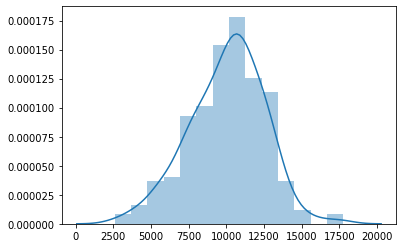

In [7]:
#df['label'].groupby(['filename']).agg(['count'])
sns.distplot(df.groupby(['filename']).size())

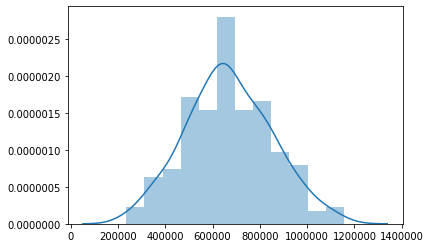

In [8]:
sns.distplot(df.groupby(['filename'])[['total_pixels']].sum())

In [9]:
data_for_hist = ['filename','total_pixels', 'integrated_intensity', 'brightest_pixel', 'fit_x_axis', 'fit_y_axis', 'deconv_x', 'deconv_y', 'integrated_intensity_fit', 'ratio_residual']
data = df[data_for_hist]
#sns.pairplot(data)

Text(0, 0.5, 'Counts')

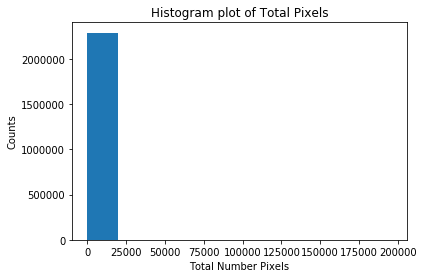

In [10]:
plt.hist(df.total_pixels)
plt.title('Histogram plot of Total Pixels')

plt.xlabel('Total Number Pixels')
plt.ylabel('Counts')

In [11]:
max(df.total_pixels), min(df.total_pixels)

(196131, 13)

In [12]:
np.quantile(df.total_pixels, 0.9999)

6339.425400000066

Text(0, 0.5, 'Counts')

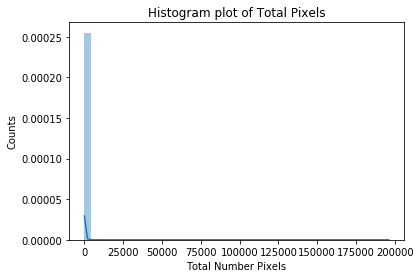

In [13]:
sns.distplot(df.total_pixels)
plt.title('Histogram plot of Total Pixels')

plt.xlabel('Total Number Pixels')
plt.ylabel('Counts')

6339


Text(0, 0.5, 'Counts')

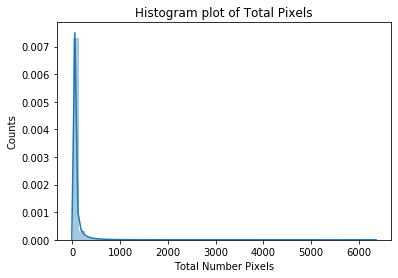

In [14]:
## Discarding the last .01% of the largest total pixels value
sns.distplot(df[df.total_pixels<np.quantile(df.total_pixels, 0.9999)].total_pixels)

print(max(df[df.total_pixels<np.quantile(df.total_pixels, 0.9999)].total_pixels))
plt.title('Histogram plot of Total Pixels')

plt.xlabel('Total Number Pixels')
plt.ylabel('Counts')

The cutoff of 99.99% seems quite reasonable. However we can do without this cutoff.

Text(0, 0.5, 'Counts')

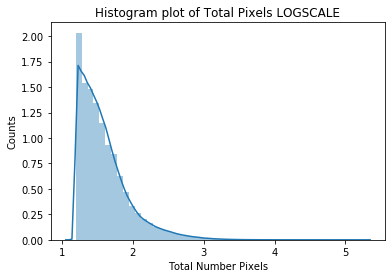

In [15]:
#df.loc[df.total_pixels == 0, 'total_pixels'] = min(df.loc[df.total_pixels > 0].total_pixels)/1000
sns.distplot(np.log10(df.total_pixels))
plt.title('Histogram plot of Total Pixels LOGSCALE')

plt.xlabel('Total Number Pixels')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

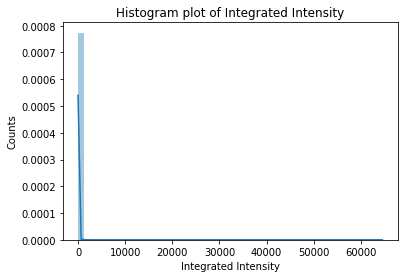

In [16]:
sns.distplot(df.integrated_intensity)
plt.title('Histogram plot of Integrated Intensity')

plt.xlabel('Integrated Intensity')
plt.ylabel('Counts')


In [17]:
max(df.integrated_intensity), min(df.integrated_intensity), np.quantile(df.integrated_intensity, 0.99995)

(64581.30993274113, 0.1072605765460542, 5058.911472101763)

Text(0, 0.5, 'Counts')

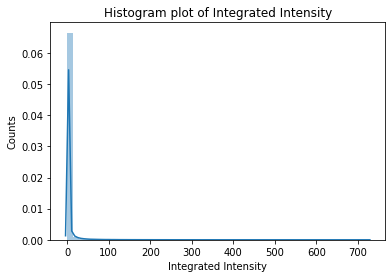

In [18]:
sns.distplot(df[df.integrated_intensity<np.quantile(df.integrated_intensity, 0.999)].integrated_intensity)
plt.title('Histogram plot of Integrated Intensity')

plt.xlabel('Integrated Intensity')
plt.ylabel('Counts')
## However, a cutoff for this may not be required

Text(0, 0.5, 'Counts')

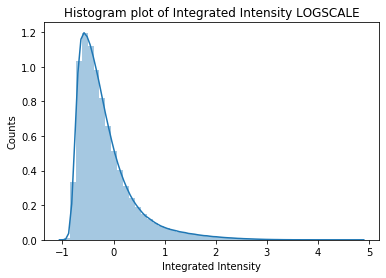

In [19]:
sns.distplot(np.log10(df.integrated_intensity))
plt.title('Histogram plot of Integrated Intensity LOGSCALE')

plt.xlabel('Integrated Intensity')
plt.ylabel('Counts')


Text(0, 0.5, 'Counts')

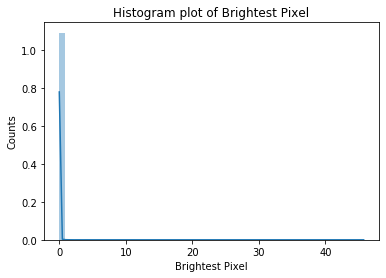

In [20]:
sns.distplot(df.brightest_pixel)
plt.title('Histogram plot of Brightest Pixel')

plt.xlabel('Brightest Pixel')
plt.ylabel('Counts')


Text(0, 0.5, 'Counts')

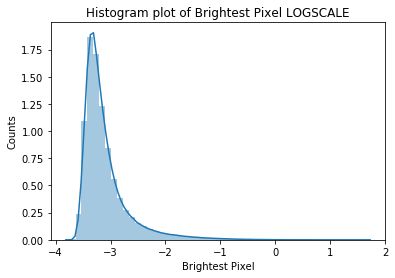

In [21]:
sns.distplot(np.log10(df.brightest_pixel))
plt.title('Histogram plot of Brightest Pixel LOGSCALE')

plt.xlabel('Brightest Pixel')
plt.ylabel('Counts')


For the brightest pixel also, nothing needs to be done.

Text(0, 0.5, 'Counts')

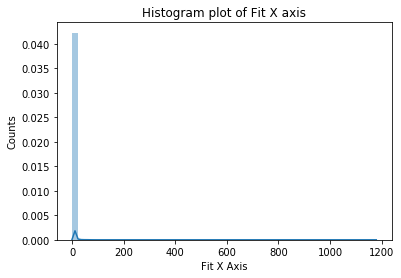

In [22]:
sns.distplot(df.fit_x_axis)
plt.title('Histogram plot of Fit X axis')

plt.xlabel('Fit X Axis')
plt.ylabel('Counts')

In [23]:
#df.loc[df.fit_x_axis==0.0, 'fit_x_axis'] =1.0e-8  ## Some values are 0 implying log (0) = inf. So it replaced by a finite value 1000 times less than the minimum value

Text(0, 0.5, 'Counts')

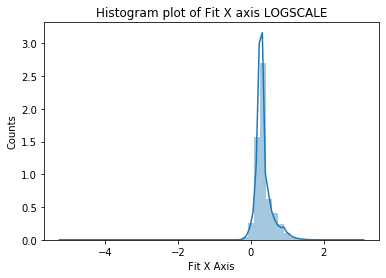

In [24]:
sns.distplot(np.log10(df.fit_x_axis))
plt.title('Histogram plot of Fit X axis LOGSCALE')

plt.xlabel('Fit X Axis')
plt.ylabel('Counts')

For the fit_x_axis also, nothing needs to be done.

Text(0, 0.5, 'Counts')

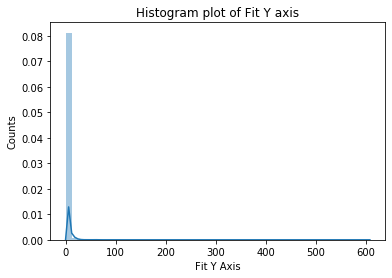

In [25]:
sns.distplot(df.fit_y_axis)
plt.title('Histogram plot of Fit Y axis')

plt.xlabel('Fit Y Axis')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

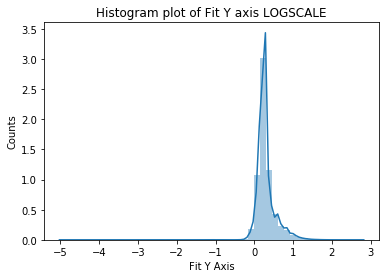

In [26]:
#df.loc[df.fit_y_axis==0.0, 'fit_y_axis'] =1.0e-8 
sns.distplot(np.log10(df.fit_y_axis))
plt.title('Histogram plot of Fit Y axis LOGSCALE')

plt.xlabel('Fit Y Axis')
plt.ylabel('Counts')

For the fit_y_axis also, nothing needs to be done.

Text(0, 0.5, 'Counts')

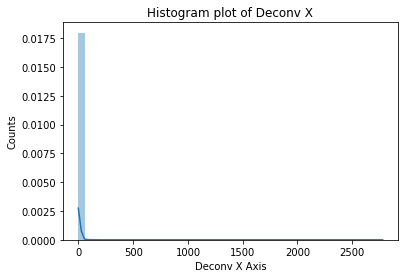

In [27]:
sns.distplot(df.deconv_x)
plt.title('Histogram plot of Deconv X')

plt.xlabel('Deconv X Axis')
plt.ylabel('Counts')

In [28]:
df.loc[df.deconv_x == 0, 'deconv_x'] = min(df[df.deconv_x > 0].deconv_x)* 1e-5


Text(0, 0.5, 'Counts')

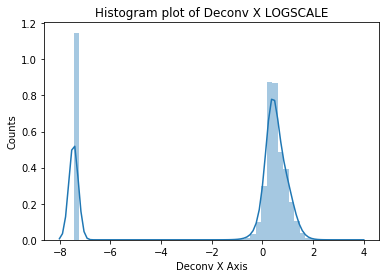

In [29]:
sns.distplot(np.log10(df.deconv_x))
plt.title('Histogram plot of Deconv X LOGSCALE')

plt.xlabel('Deconv X Axis')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

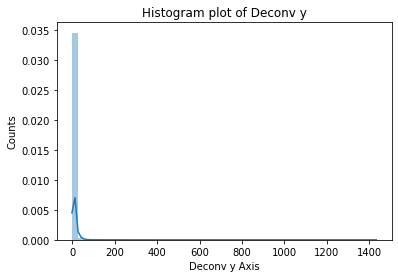

In [30]:
sns.distplot(df.deconv_y)
plt.title('Histogram plot of Deconv y')

plt.xlabel('Deconv y Axis')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

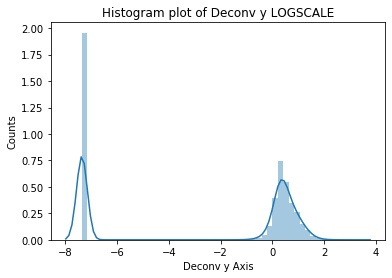

In [31]:
df.loc[df.deconv_y == 0, 'deconv_y'] = min(df[df.deconv_y > 0].deconv_y)* 1e-5
sns.distplot(np.log10(df.deconv_y))
plt.title('Histogram plot of Deconv y LOGSCALE')

plt.xlabel('Deconv y Axis')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

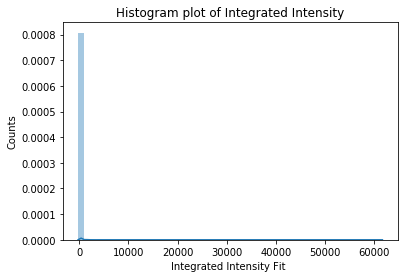

In [32]:
sns.distplot(df.integrated_intensity_fit)
plt.title('Histogram plot of Integrated Intensity')
plt.xlabel('Integrated Intensity Fit ')
plt.ylabel('Counts')

In [33]:
max(df.integrated_intensity_fit),min(df.integrated_intensity_fit),np.quantile(df.integrated_intensity_fit,0.99)

(61685.58995679304, -224.25593916161156, 77.91591633809777)

The minimum is negetive which will cause problems. So we may try shifting it by the minimum amount. However this will render the value which is minimum to zero. So lets shift is by the minimum amount + the difference between the smallest and the second smallest values.

In [34]:
smallest, second_smallest = min(df.integrated_intensity_fit), min(df[df.integrated_intensity_fit> min(df.integrated_intensity_fit)].integrated_intensity_fit)
smallest, second_smallest

(-224.25593916161156, -196.50513416346504)

In [35]:
shift = abs(smallest)+abs(smallest - second_smallest)
shift

252.00674415975809

Text(0, 0.5, 'Counts')

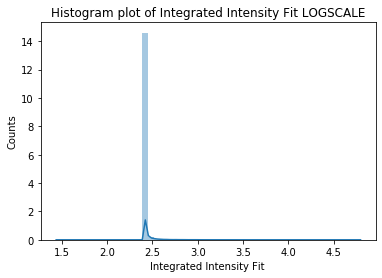

In [36]:
#df.loc[df.integrated_intensity_fit == 0, 'integrated_intensity_fit'] = min(df.loc[df.integrated_intensity_fit > 0].integrated_intensity_fit)/1000
sns.distplot(np.log10(df.integrated_intensity_fit+ shift))
plt.title('Histogram plot of Integrated Intensity Fit LOGSCALE')
plt.xlabel('Integrated Intensity Fit ')
plt.ylabel('Counts')

Also, another way to deal with this is to simply remove the ones with negetive intensity fit

Text(0, 0.5, 'Counts')

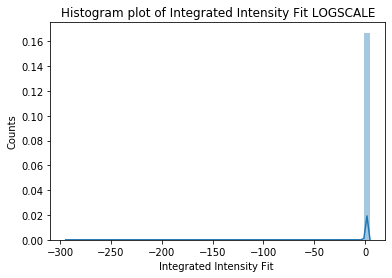

In [37]:
sns.distplot(np.log10(df[df.integrated_intensity_fit>0].integrated_intensity_fit))
plt.title('Histogram plot of Integrated Intensity Fit LOGSCALE')
plt.xlabel('Integrated Intensity Fit ')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

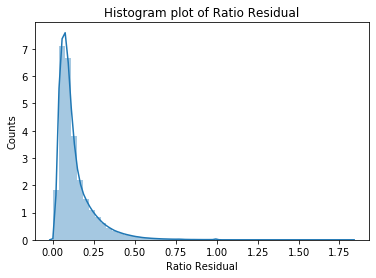

In [38]:
sns.distplot(df.ratio_residual)
plt.title('Histogram plot of Ratio Residual')

plt.xlabel('Ratio Residual')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

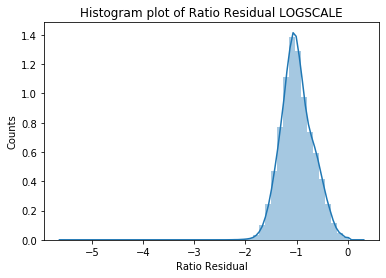

In [64]:
df.loc[df.ratio_residual == 0, 'ratio_residual'] = min(df.loc[df.ratio_residual > 0].ratio_residual)*1e-5

sns.distplot(np.log10(df.ratio_residual))
plt.title('Histogram plot of Ratio Residual LOGSCALE')

plt.xlabel('Ratio Residual')
plt.ylabel('Counts')

For the Ratio Residual nothing needs to be done.

In [40]:
data.head()

filename  total_pixels  integrated_intensity  brightest_pixel  fit_x_axis  \
0  P191+55            43              0.961113         0.001262    1.719762   
1  P191+55            20              0.326739         0.000757    1.519696   
2  P191+55            45              0.745168         0.000793    2.200384   
3  P191+55            43              0.702810         0.000809    2.116900   
4  P191+55            74              1.104583         0.000829    3.113855   

   fit_y_axis  deconv_x  deconv_y  integrated_intensity_fit  ratio_residual  
0    1.896624  0.632697  1.986707                  0.971715        0.020838  
1    1.080088  0.000000  0.000000                  0.330021        0.193748  
2    1.810055  3.293634  1.472301                  0.761027        0.051990  
3    1.720535  2.974798  0.644257                  0.705155        0.082425  
4    2.061816  6.145450  2.751914                  1.080356        0.161090

## Final Plots:

<a id='Final Plots'></a>

Cleaning the data according to what we just saw:
1. Remove total pixels which have values greater than 99.99% of the data ie. cutoff = 6339 - $\textit{this is ommited for now}$
2. Shift the integrated Intensity fit values by the minimum+difference between 
3. For the deconv_x and deconv_y we replace the 0 values with the minimum multiplied by 1e-5
4. Also for the Ratio Residuals, the minimum value 0 is to be replaced by the minimum(non -zero) multiplied by 1e-5

In [65]:
#data = data[data.total_pixels<np.quantile(data.total_pixels, 0.9999)]
data.integrated_intensity_fit += shift
data.loc[data.deconv_x == 0, 'deconv_x'] = min(data[data.deconv_x > 0].deconv_x)* 1e-5
data.loc[data.deconv_y == 0, 'deconv_y'] = min(data[data.deconv_y > 0].deconv_y)* 1e-5
data.loc[data.ratio_residual == 0, 'ratio_residual'] = min(data.loc[data.ratio_residual > 0].ratio_residual)*1e-5

In [42]:
def fairplot(x, xlab="x", ylab="y", main= "Histogram", bins1=None, bins2=None, hist=[True,True], kde=[False,False], 
             fit1=None, fit2 = None, rug=[False,False], color1=None, color2 =None, vertical=[False,False], 
             label1=None, label2=None, norm_hist=[False,False], dpi= 100, figsize = (7, 3.5), 
             xlim1=None, xlim2=None, ylim1=None, ylim2=None, yscale = ['linear', 'linear'], scale_base=None):
    
    f, (ax1,ax2) = plt.subplots(1, 2, figsize=figsize, sharex=False, dpi =dpi)
    sns.distplot(x, bins=bins1, hist=hist[0], kde=kde[0], fit=fit1, rug=rug[0], color=color1, vertical=vertical[0], 
                 label=label1,norm_hist=norm_hist[0], ax=ax1)
    sns.distplot(np.log10(x), bins=bins2,  hist=hist[1], kde=kde[1], fit=fit2, rug=rug[1], color=color2, vertical=vertical[1], 
                 label=label2, norm_hist=norm_hist[1], ax=ax2)
    ax1.set_xlabel(xlab)
    ax1.set_ylabel(ylab)
    ax1.set_title('Histogram', pad=7)
    if xlim1 != None:
        ax1.set(xlim=xlim1)
    if ylim1 !=None:
        ax1.set(ylim=ylim1)
    ax2.set_xlabel('Log $_{10}$'+xlab)
    ax2.set_ylabel(ylab)
    ax2.set_title('Histogram in LogScale', pad=7)
    if xlim2 != None:
        ax2.set(xlim=xlim2)
    if ylim1 !=None:
        ax2.set(ylim=ylim2)
    if yscale[0]=='log':
        ax1.set_yscale(yscale[0], basey=scale_base)
    else:
        ax1.set_yscale(yscale[0])
    if yscale[1]=='log':
        ax2.set_yscale(yscale[1], basey=scale_base)
    else:
        ax2.set_yscale(yscale[1])
    f.suptitle(main, fontsize=12, y=1.05)
    f.tight_layout() 
    
    return(f)

In [43]:
dpi_set =600


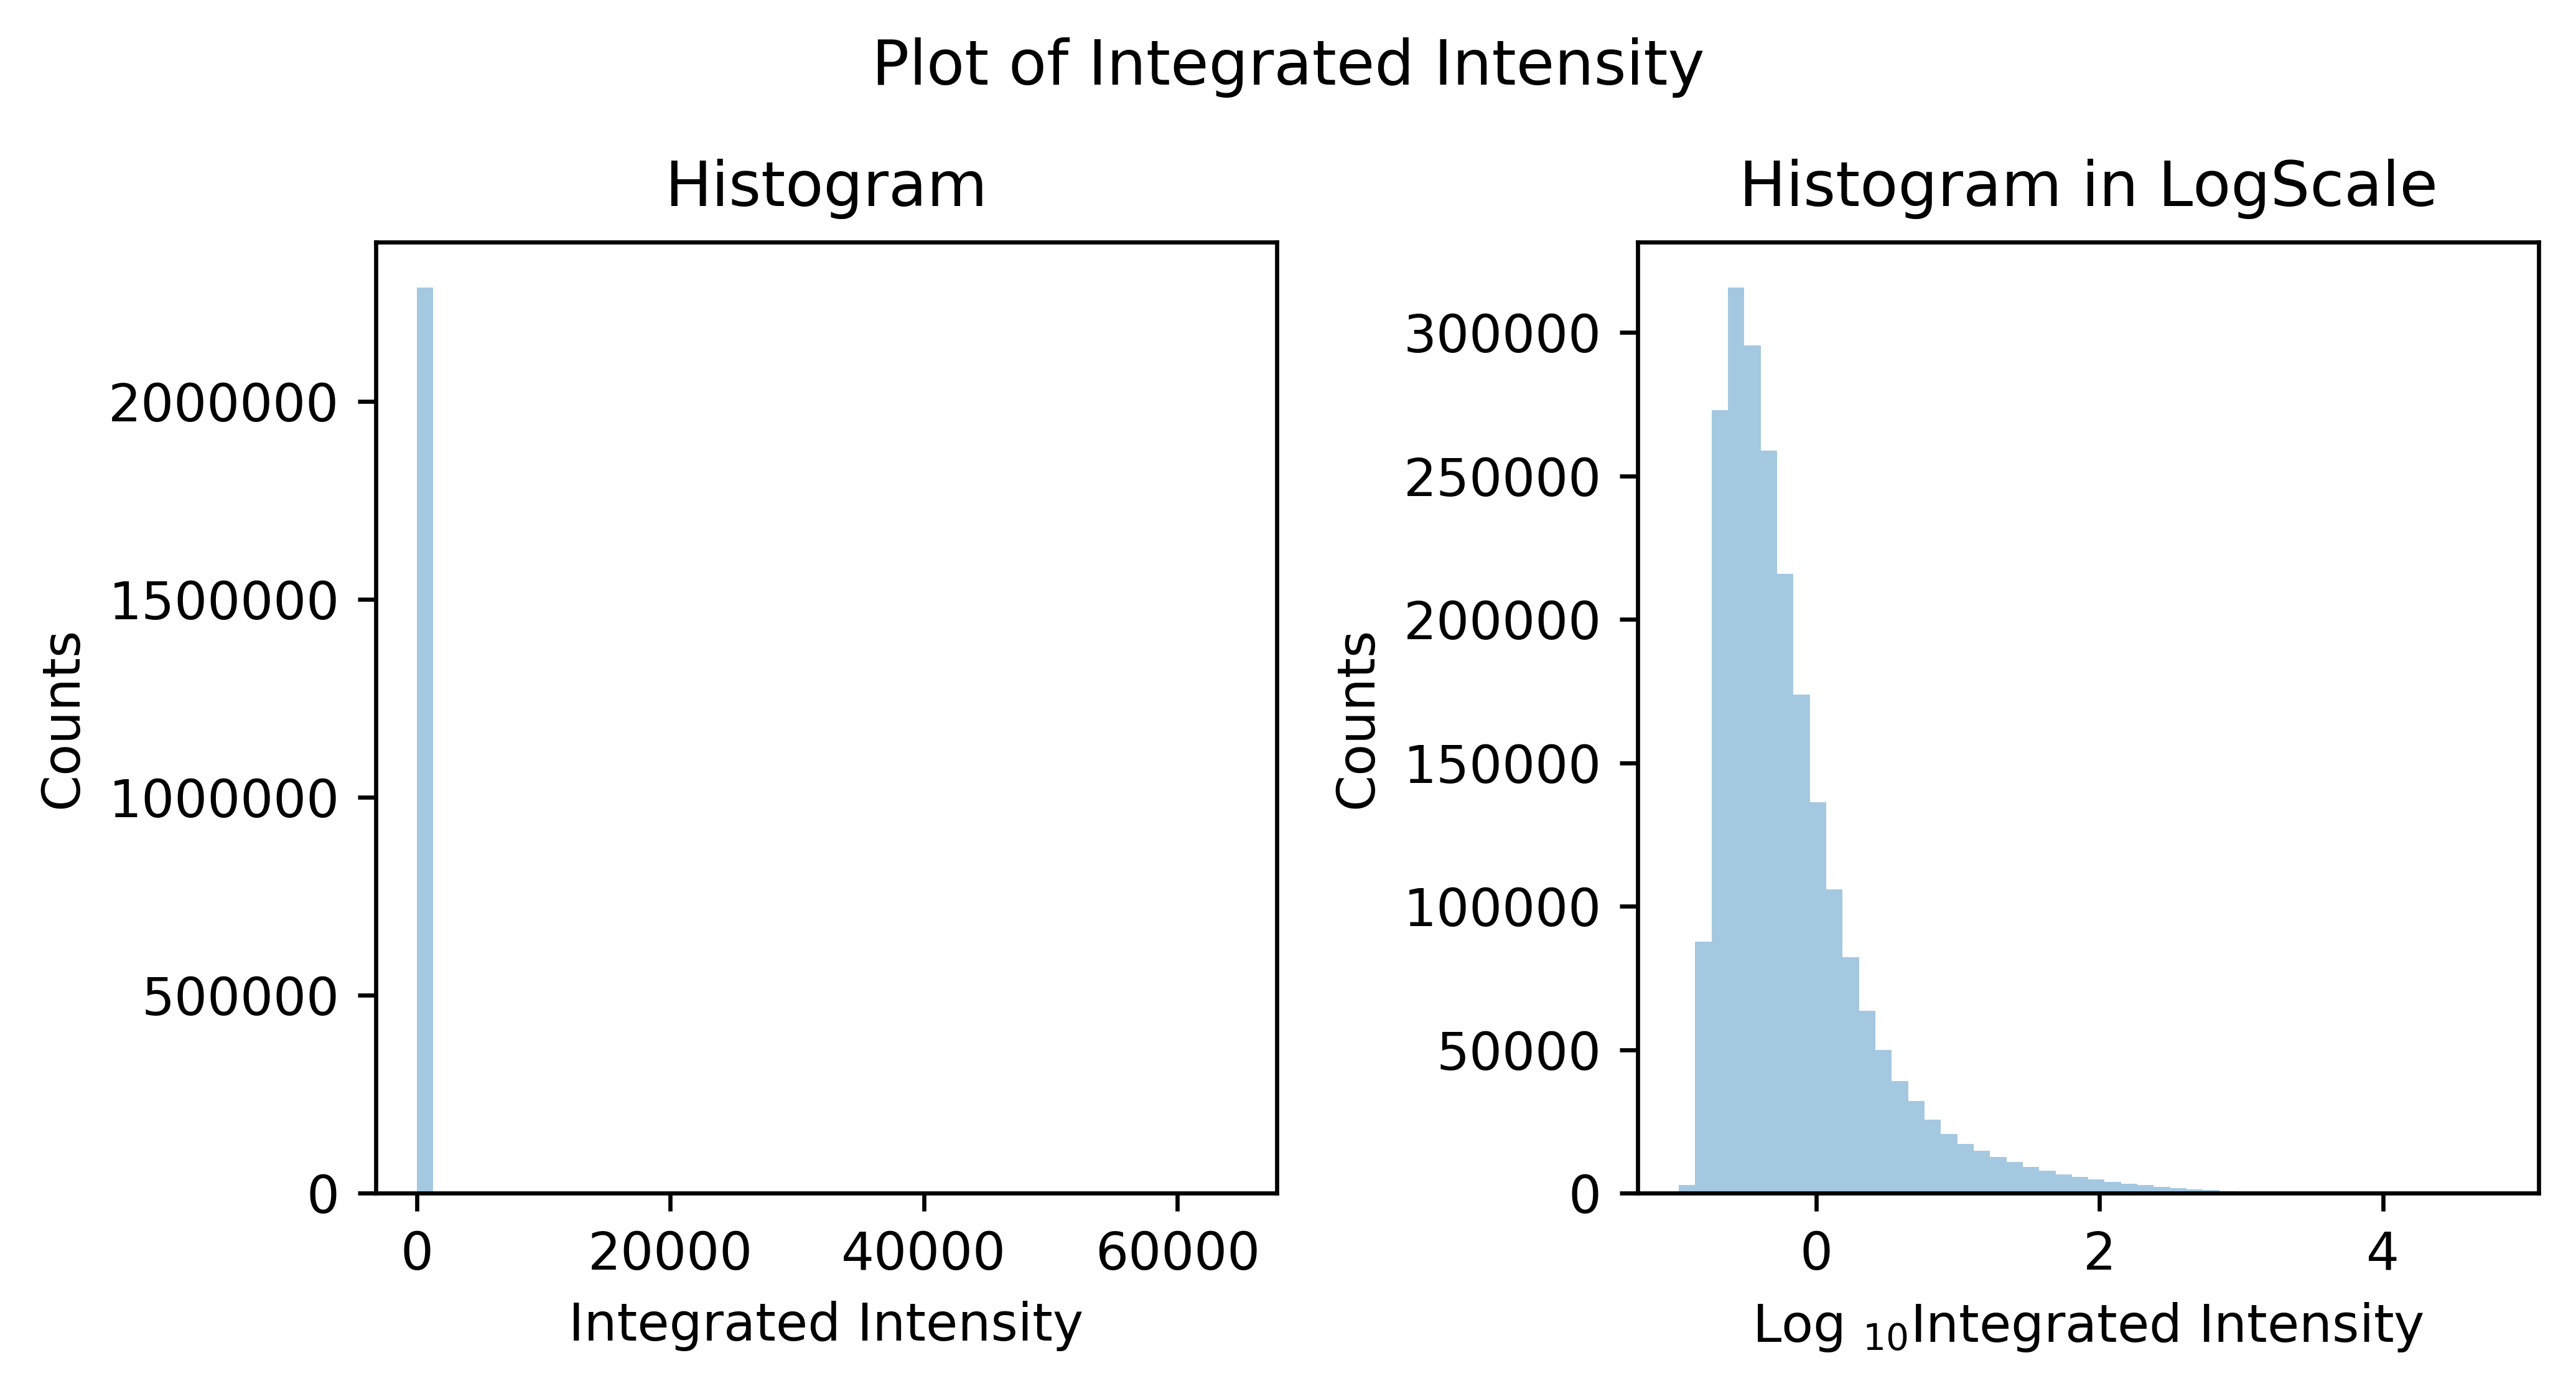

In [44]:
fig_intgrtdInt = fairplot(data.integrated_intensity, main = "Plot of Integrated Intensity",xlab = "Integrated Intensity", 
                          ylab = "Counts", kde=[False,False],dpi=dpi_set)

plt.savefig('IntegratedIntensity.png')

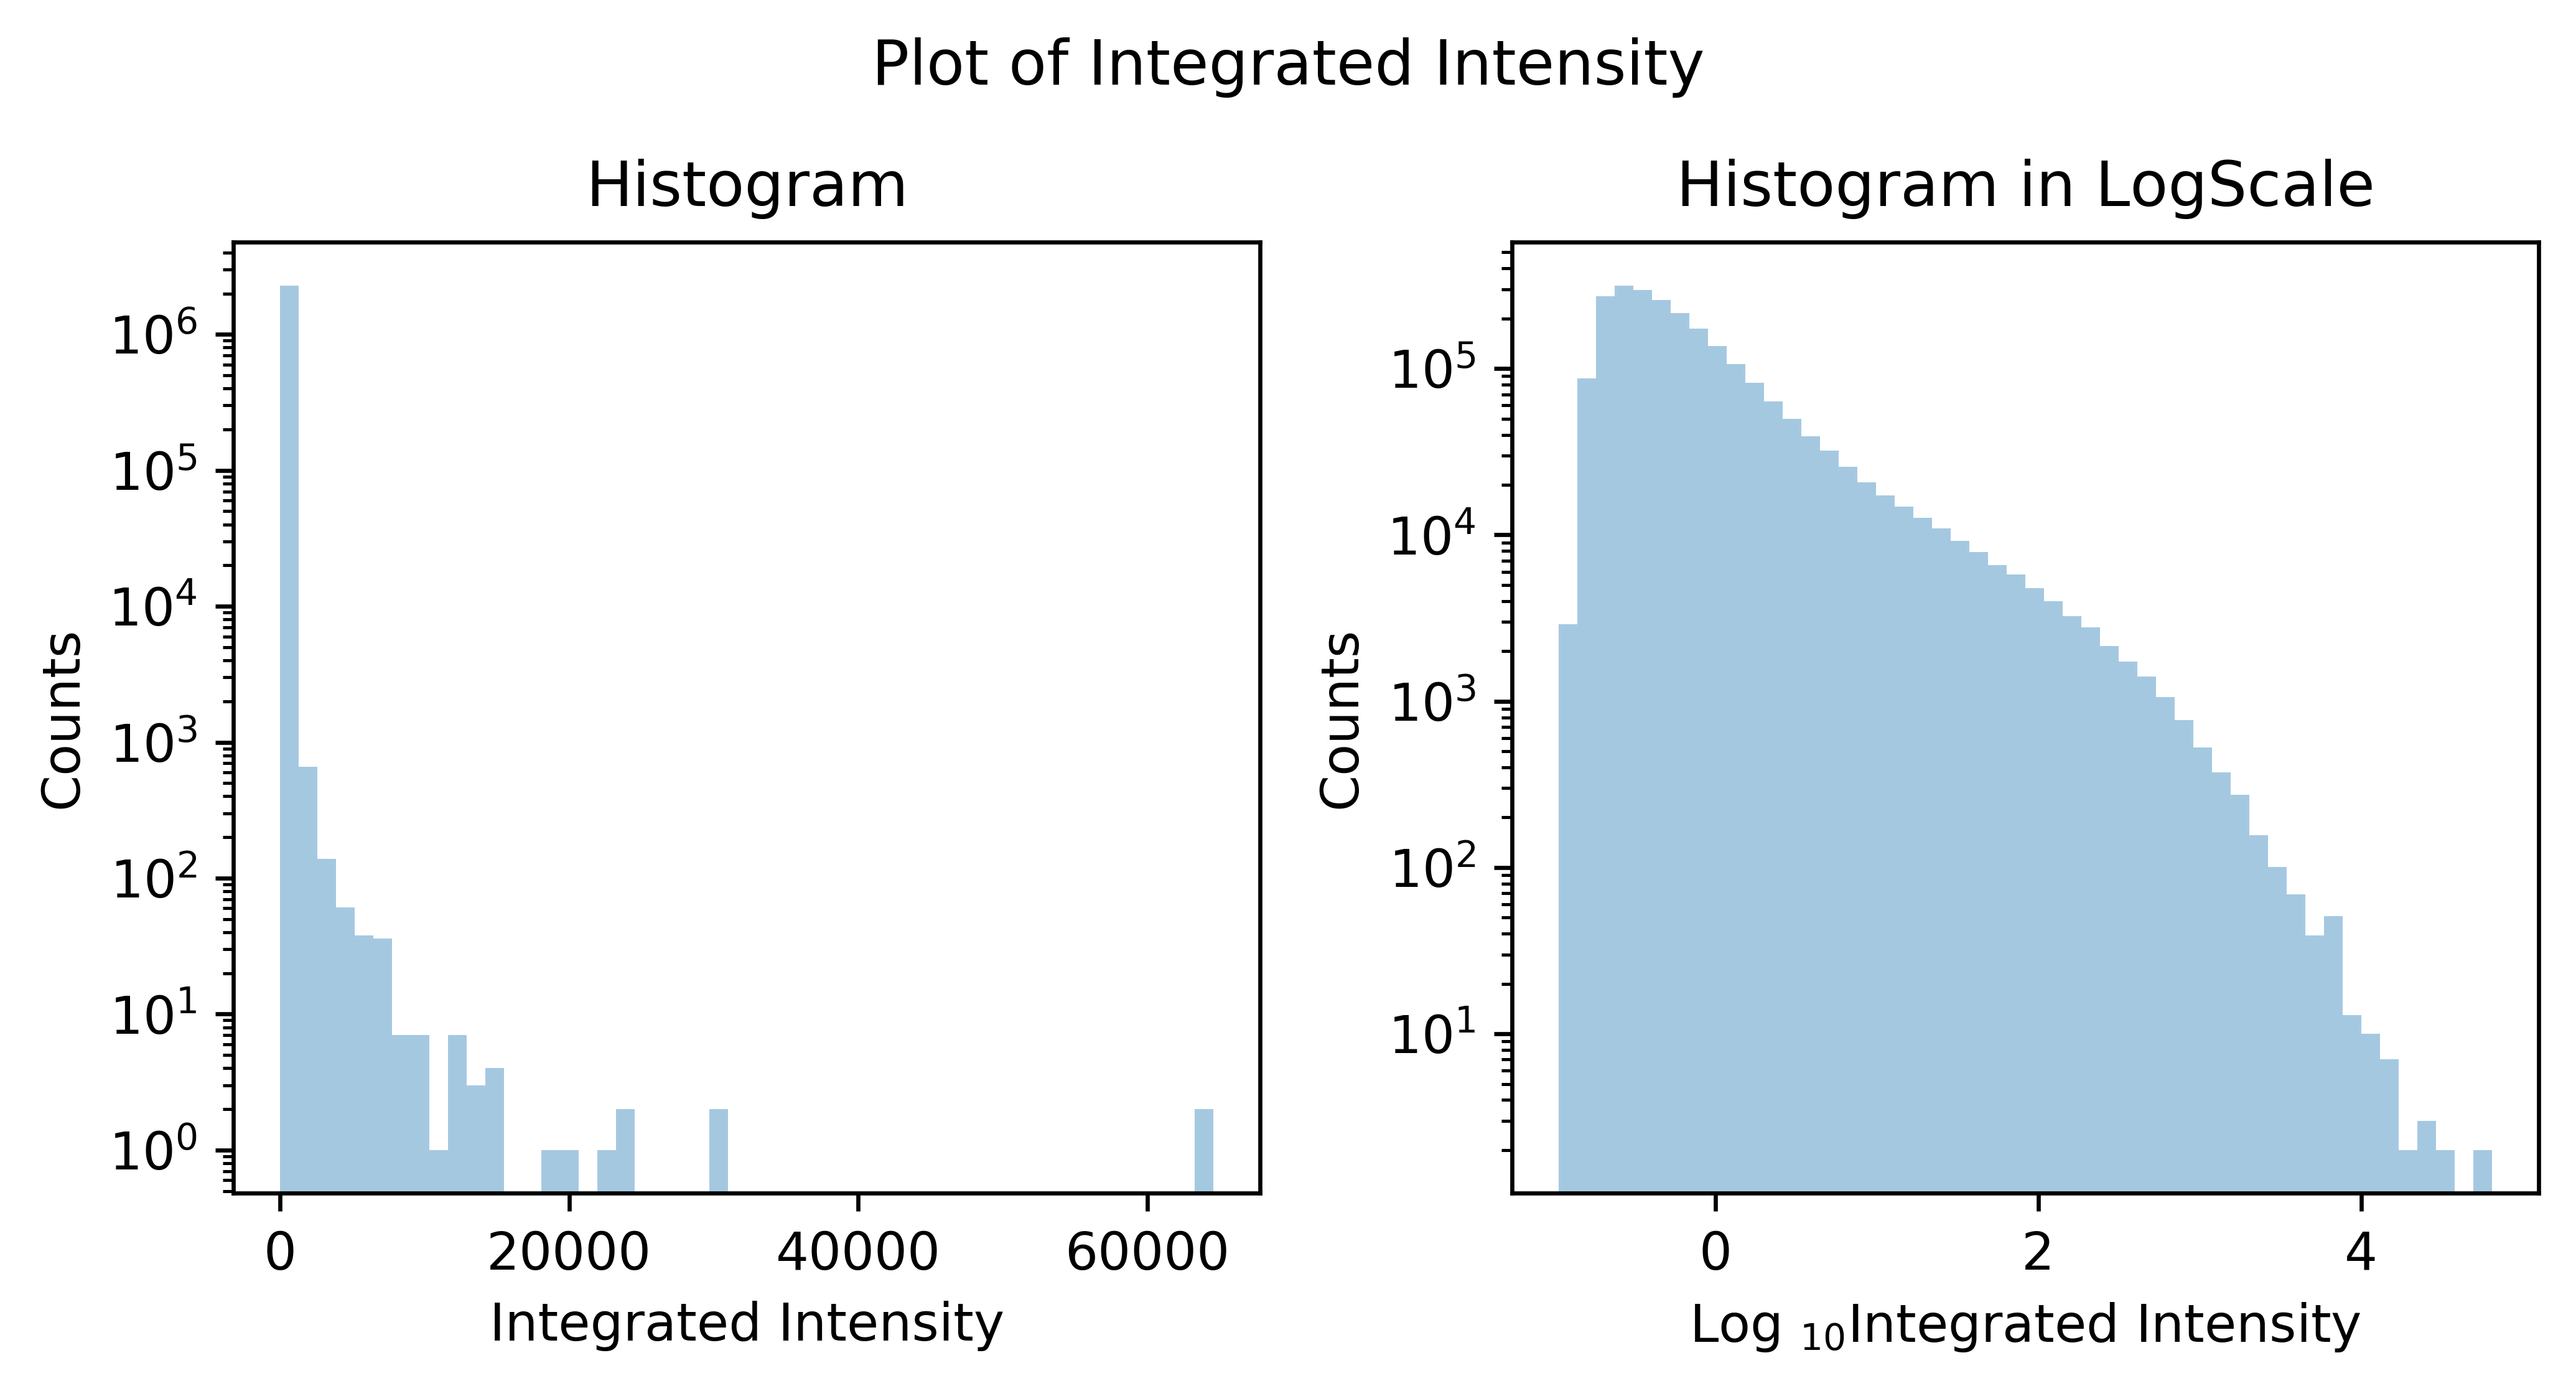

In [45]:
fig_intgrtdIntLog = fairplot(data.integrated_intensity, main = "Plot of Integrated Intensity",xlab = "Integrated Intensity", 
                          ylab = "Counts", kde=[False,False],dpi=dpi_set, yscale = ['log','log'], scale_base = 10)

plt.savefig('IntegratedIntensity_Log.png')

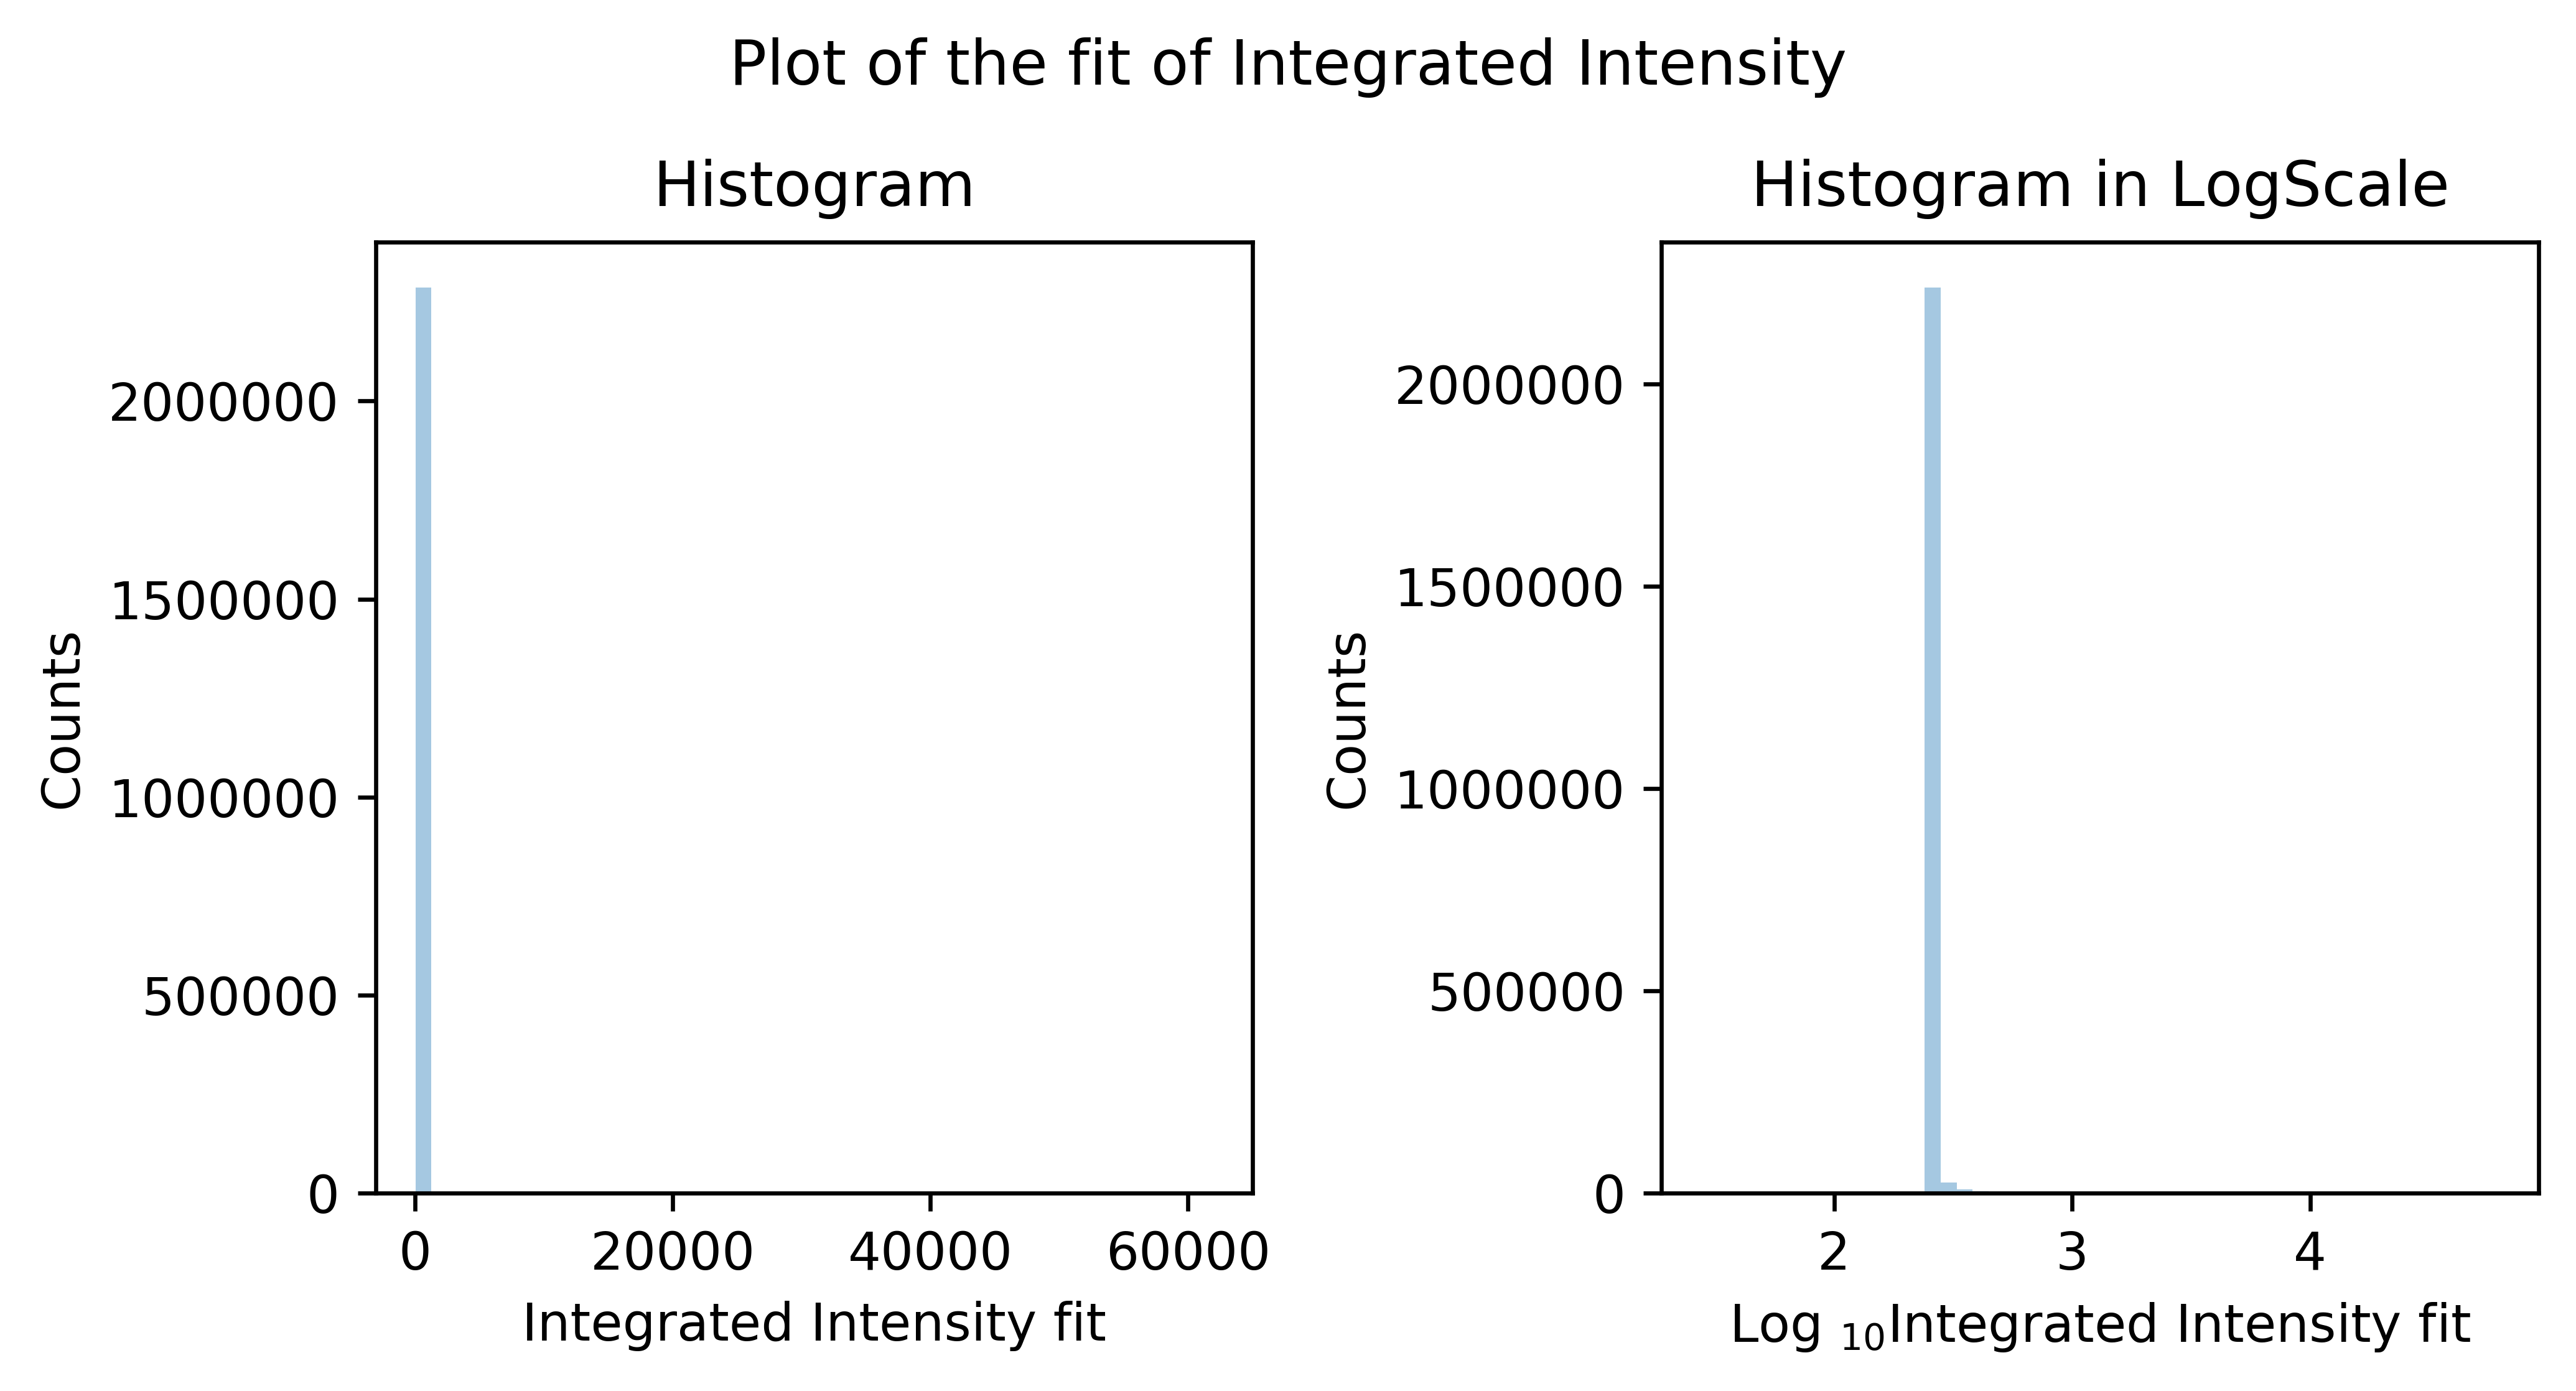

In [46]:
fig_IntgrtdIntFit = fairplot(data.integrated_intensity_fit, main = "Plot of the fit of Integrated Intensity", 
                             xlab = "Integrated Intensity fit", ylab = "Counts", kde=[False,False], dpi=dpi_set)

plt.savefig('IntegratedIntensityFit.png')

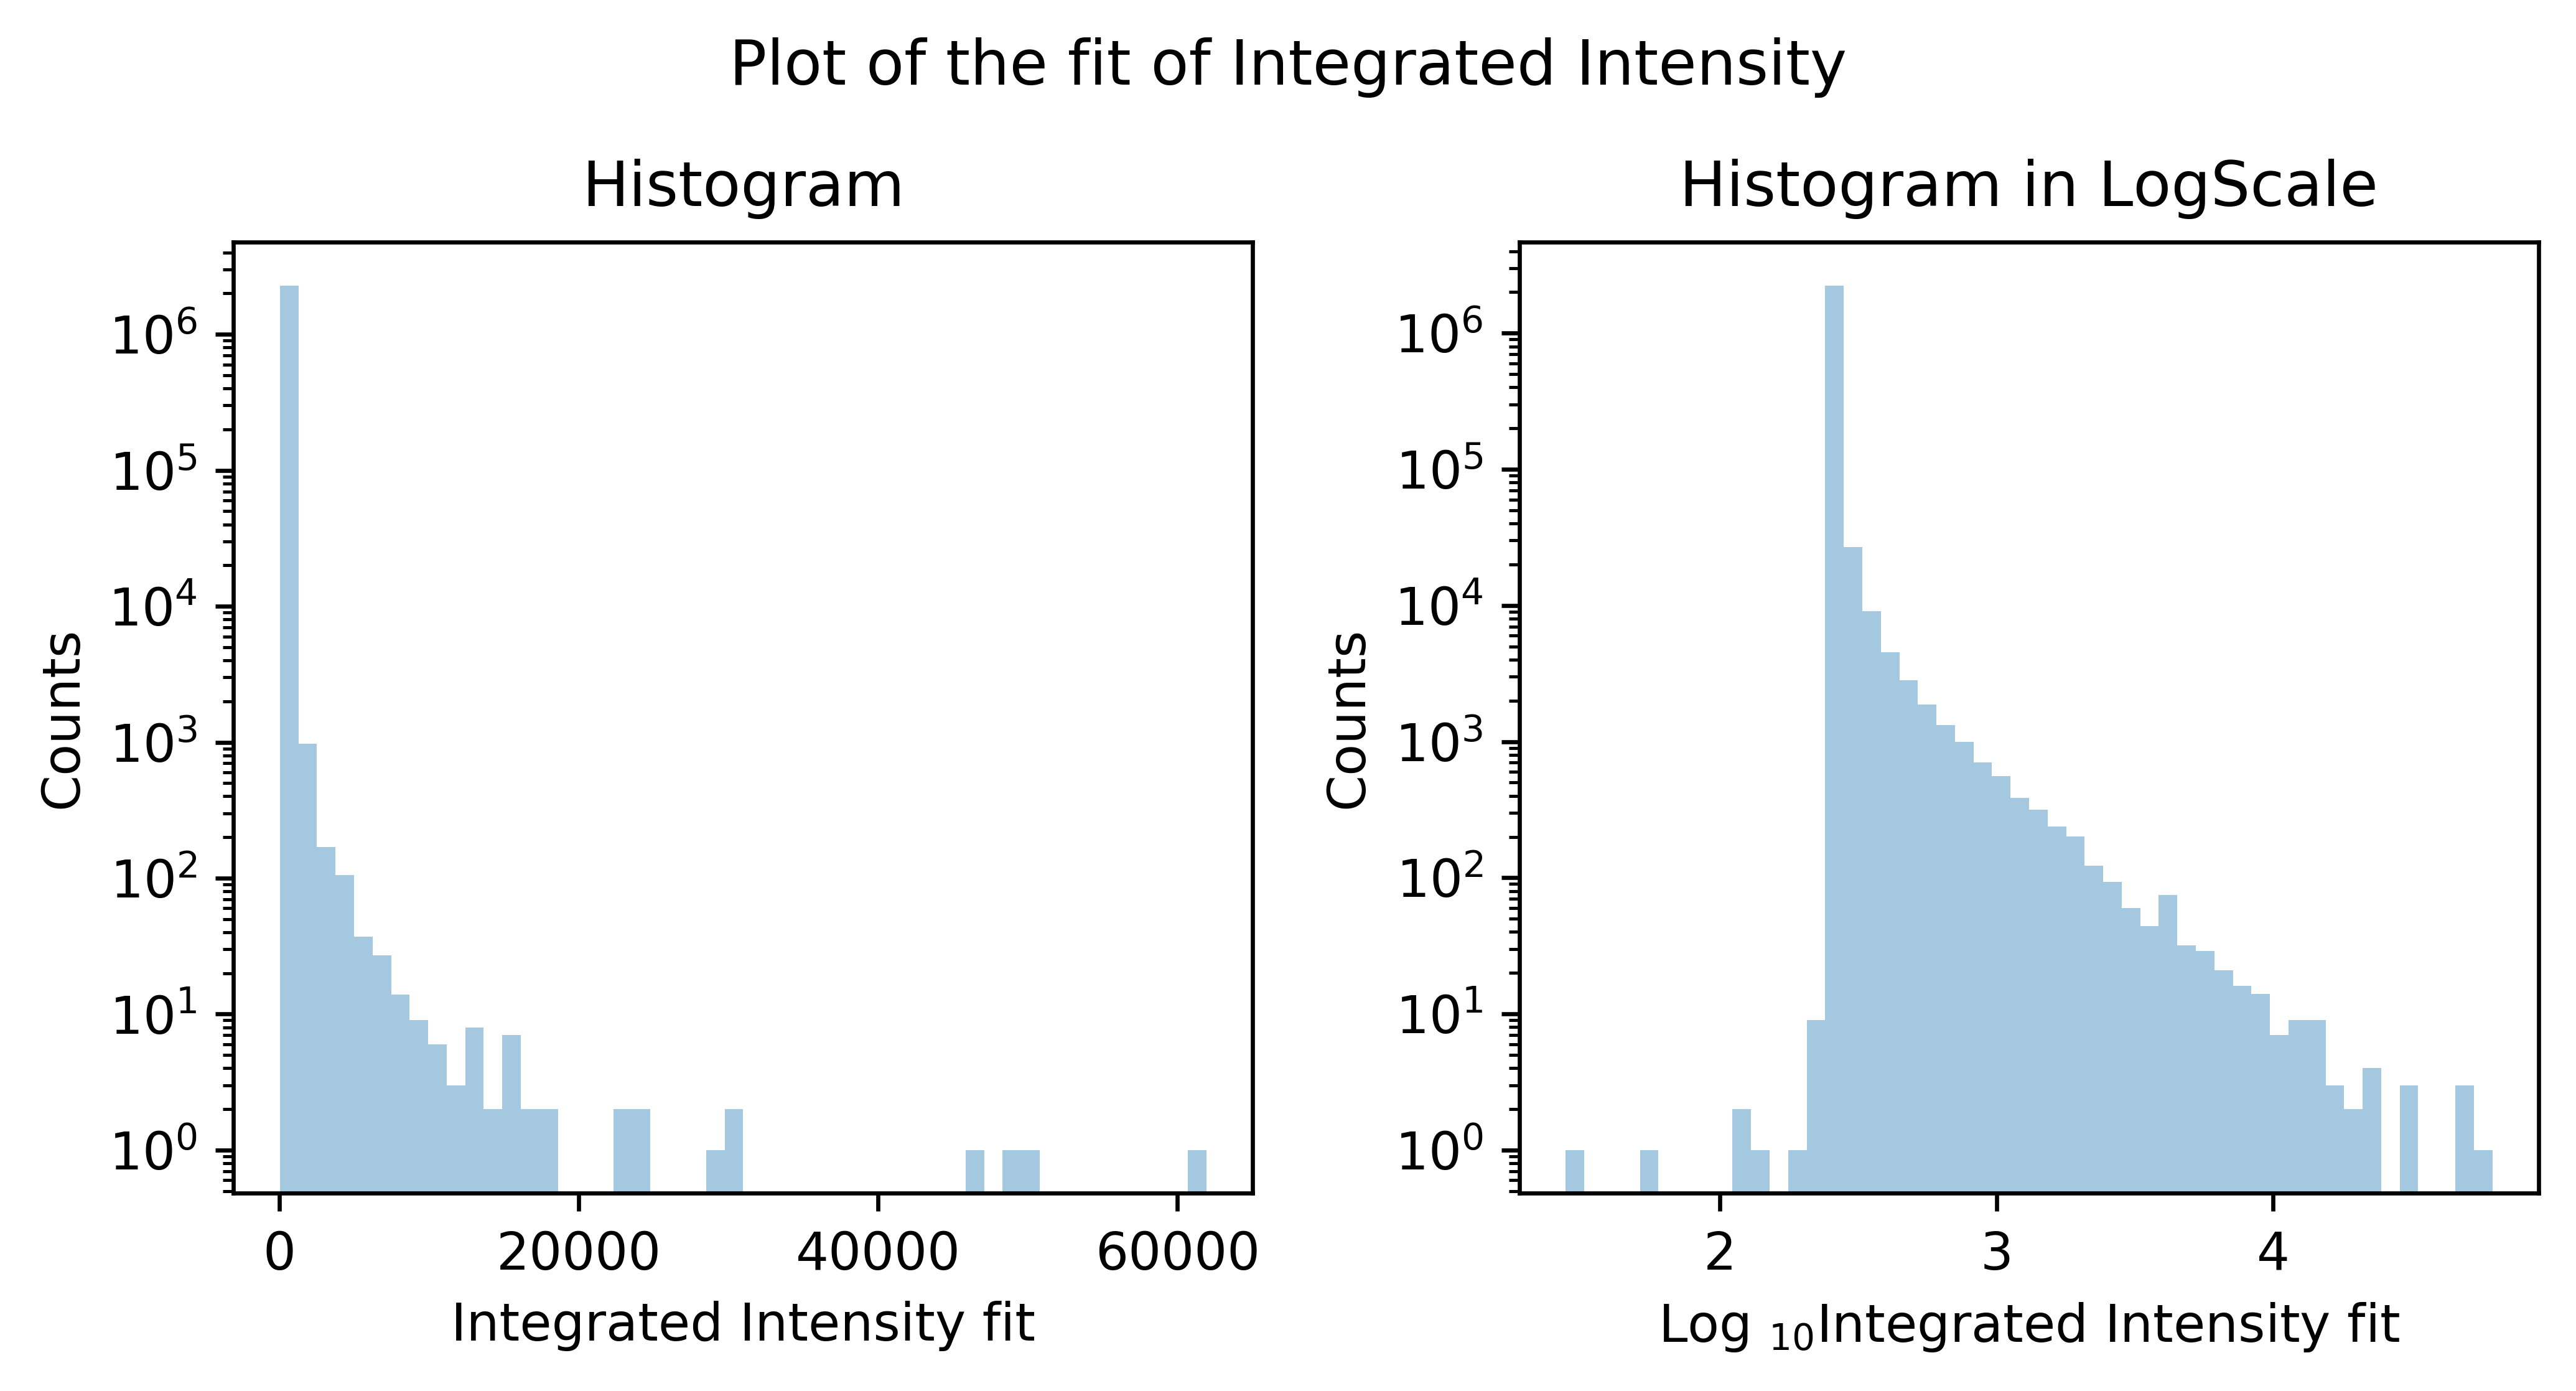

In [47]:
fig_IntgrtdIntFitLog = fairplot(data.integrated_intensity_fit, main = "Plot of the fit of Integrated Intensity", 
                             xlab = "Integrated Intensity fit", ylab = "Counts", kde=[False,False], dpi=dpi_set,
                            yscale = ['log','log'], scale_base = 10)

plt.savefig('IntegratedIntensityFit_Log.png')

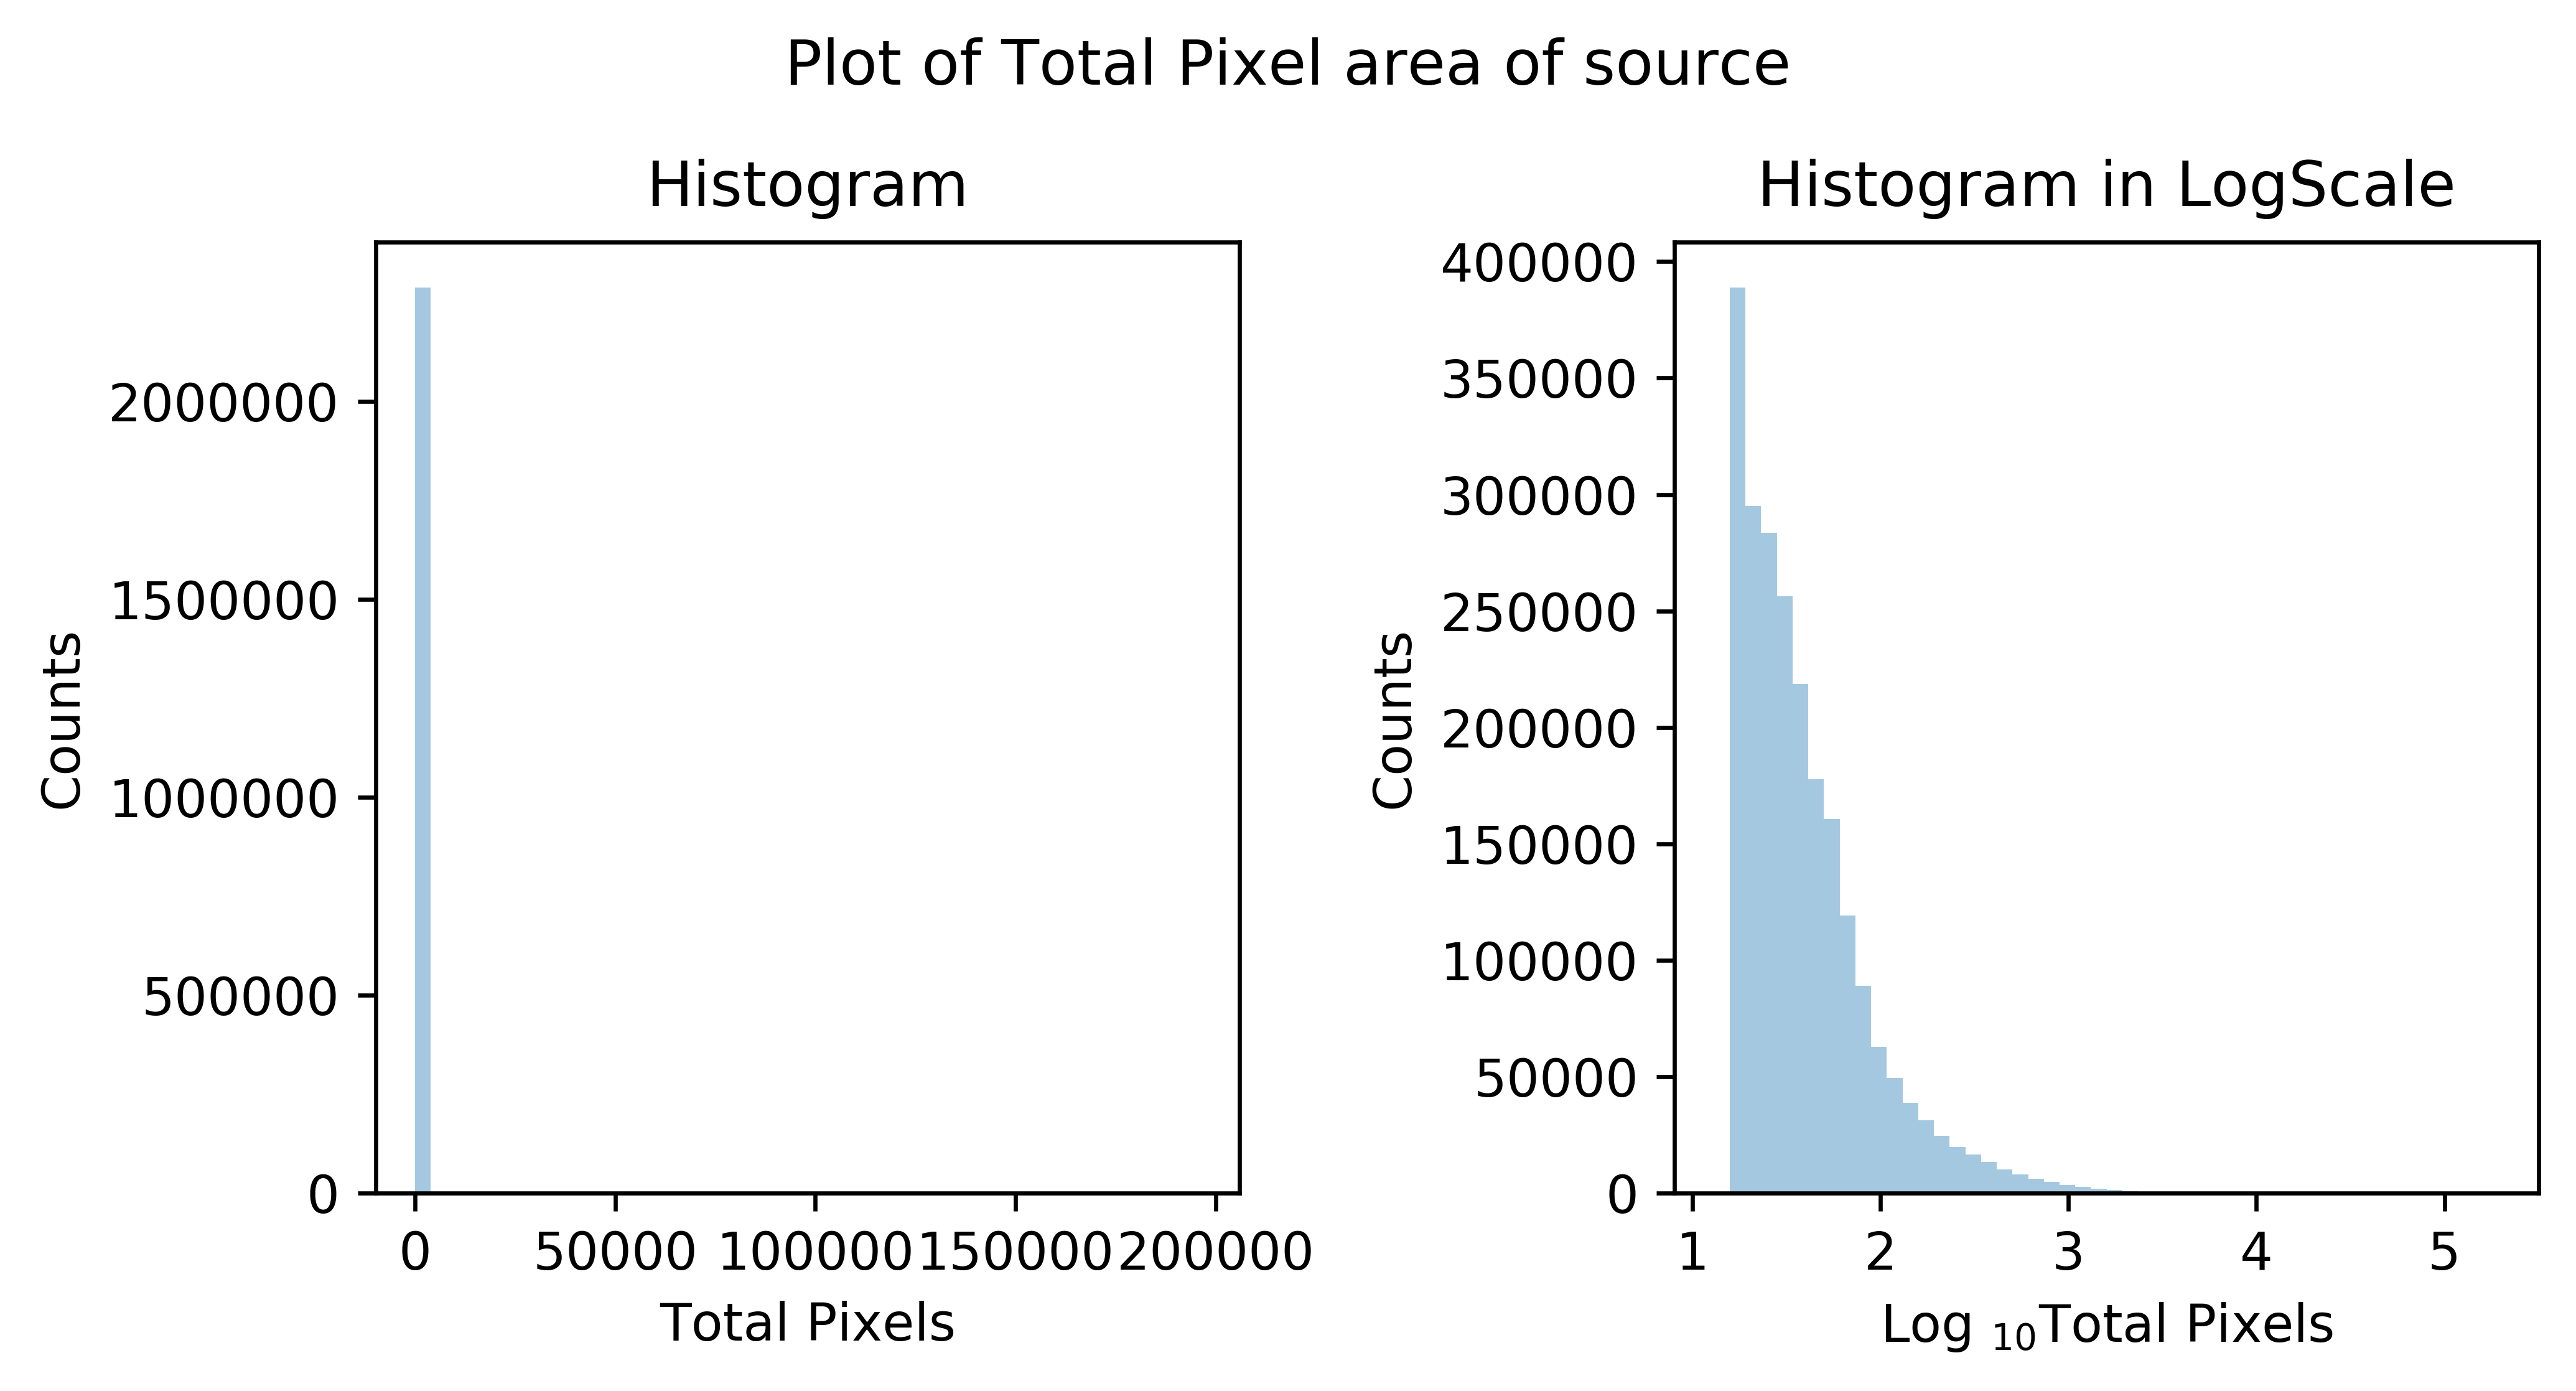

In [48]:
fig_totpxls = fairplot(data.total_pixels, main = "Plot of Total Pixel area of source",xlab = "Total Pixels", ylab = "Counts", 
                     kde=[False,False],dpi=dpi_set)
plt.savefig('TotalPixels.png')

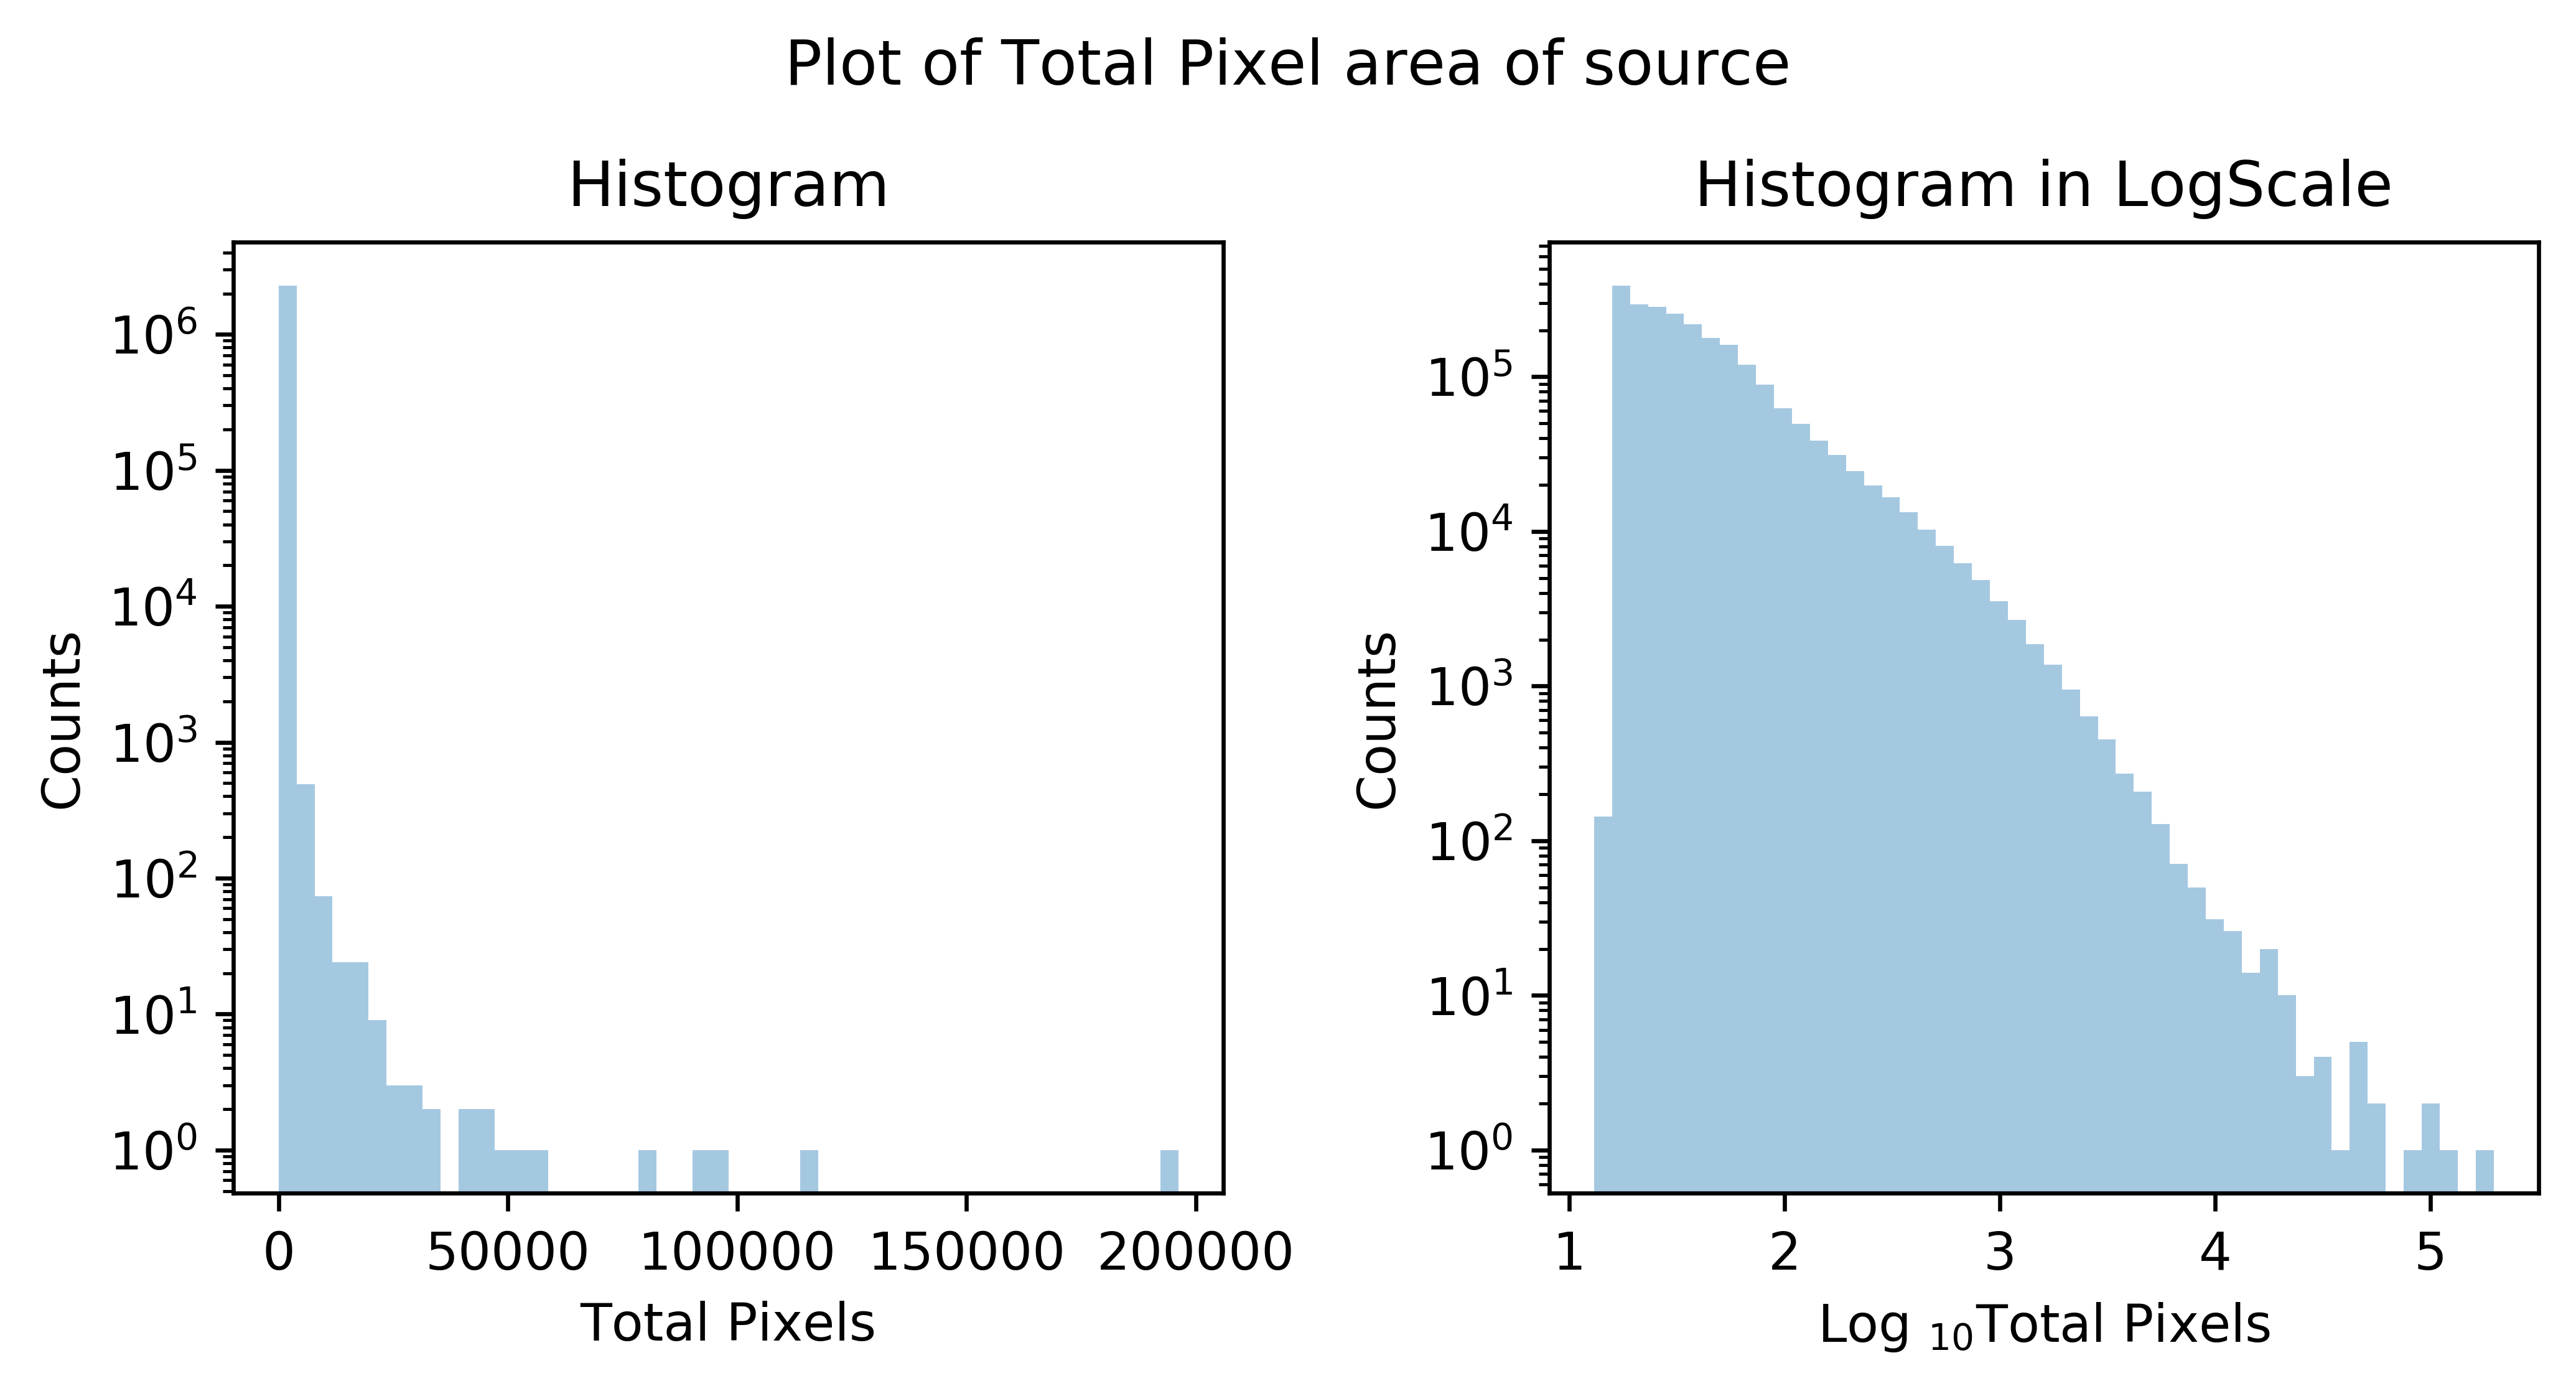

In [49]:
fig_totpxlsLog = fairplot(data.total_pixels, main = "Plot of Total Pixel area of source",xlab = "Total Pixels", ylab = "Counts", 
                     kde=[False,False],dpi=dpi_set,  yscale = ['log','log'], scale_base = 10)
plt.savefig('TotalPixels_Log.png')

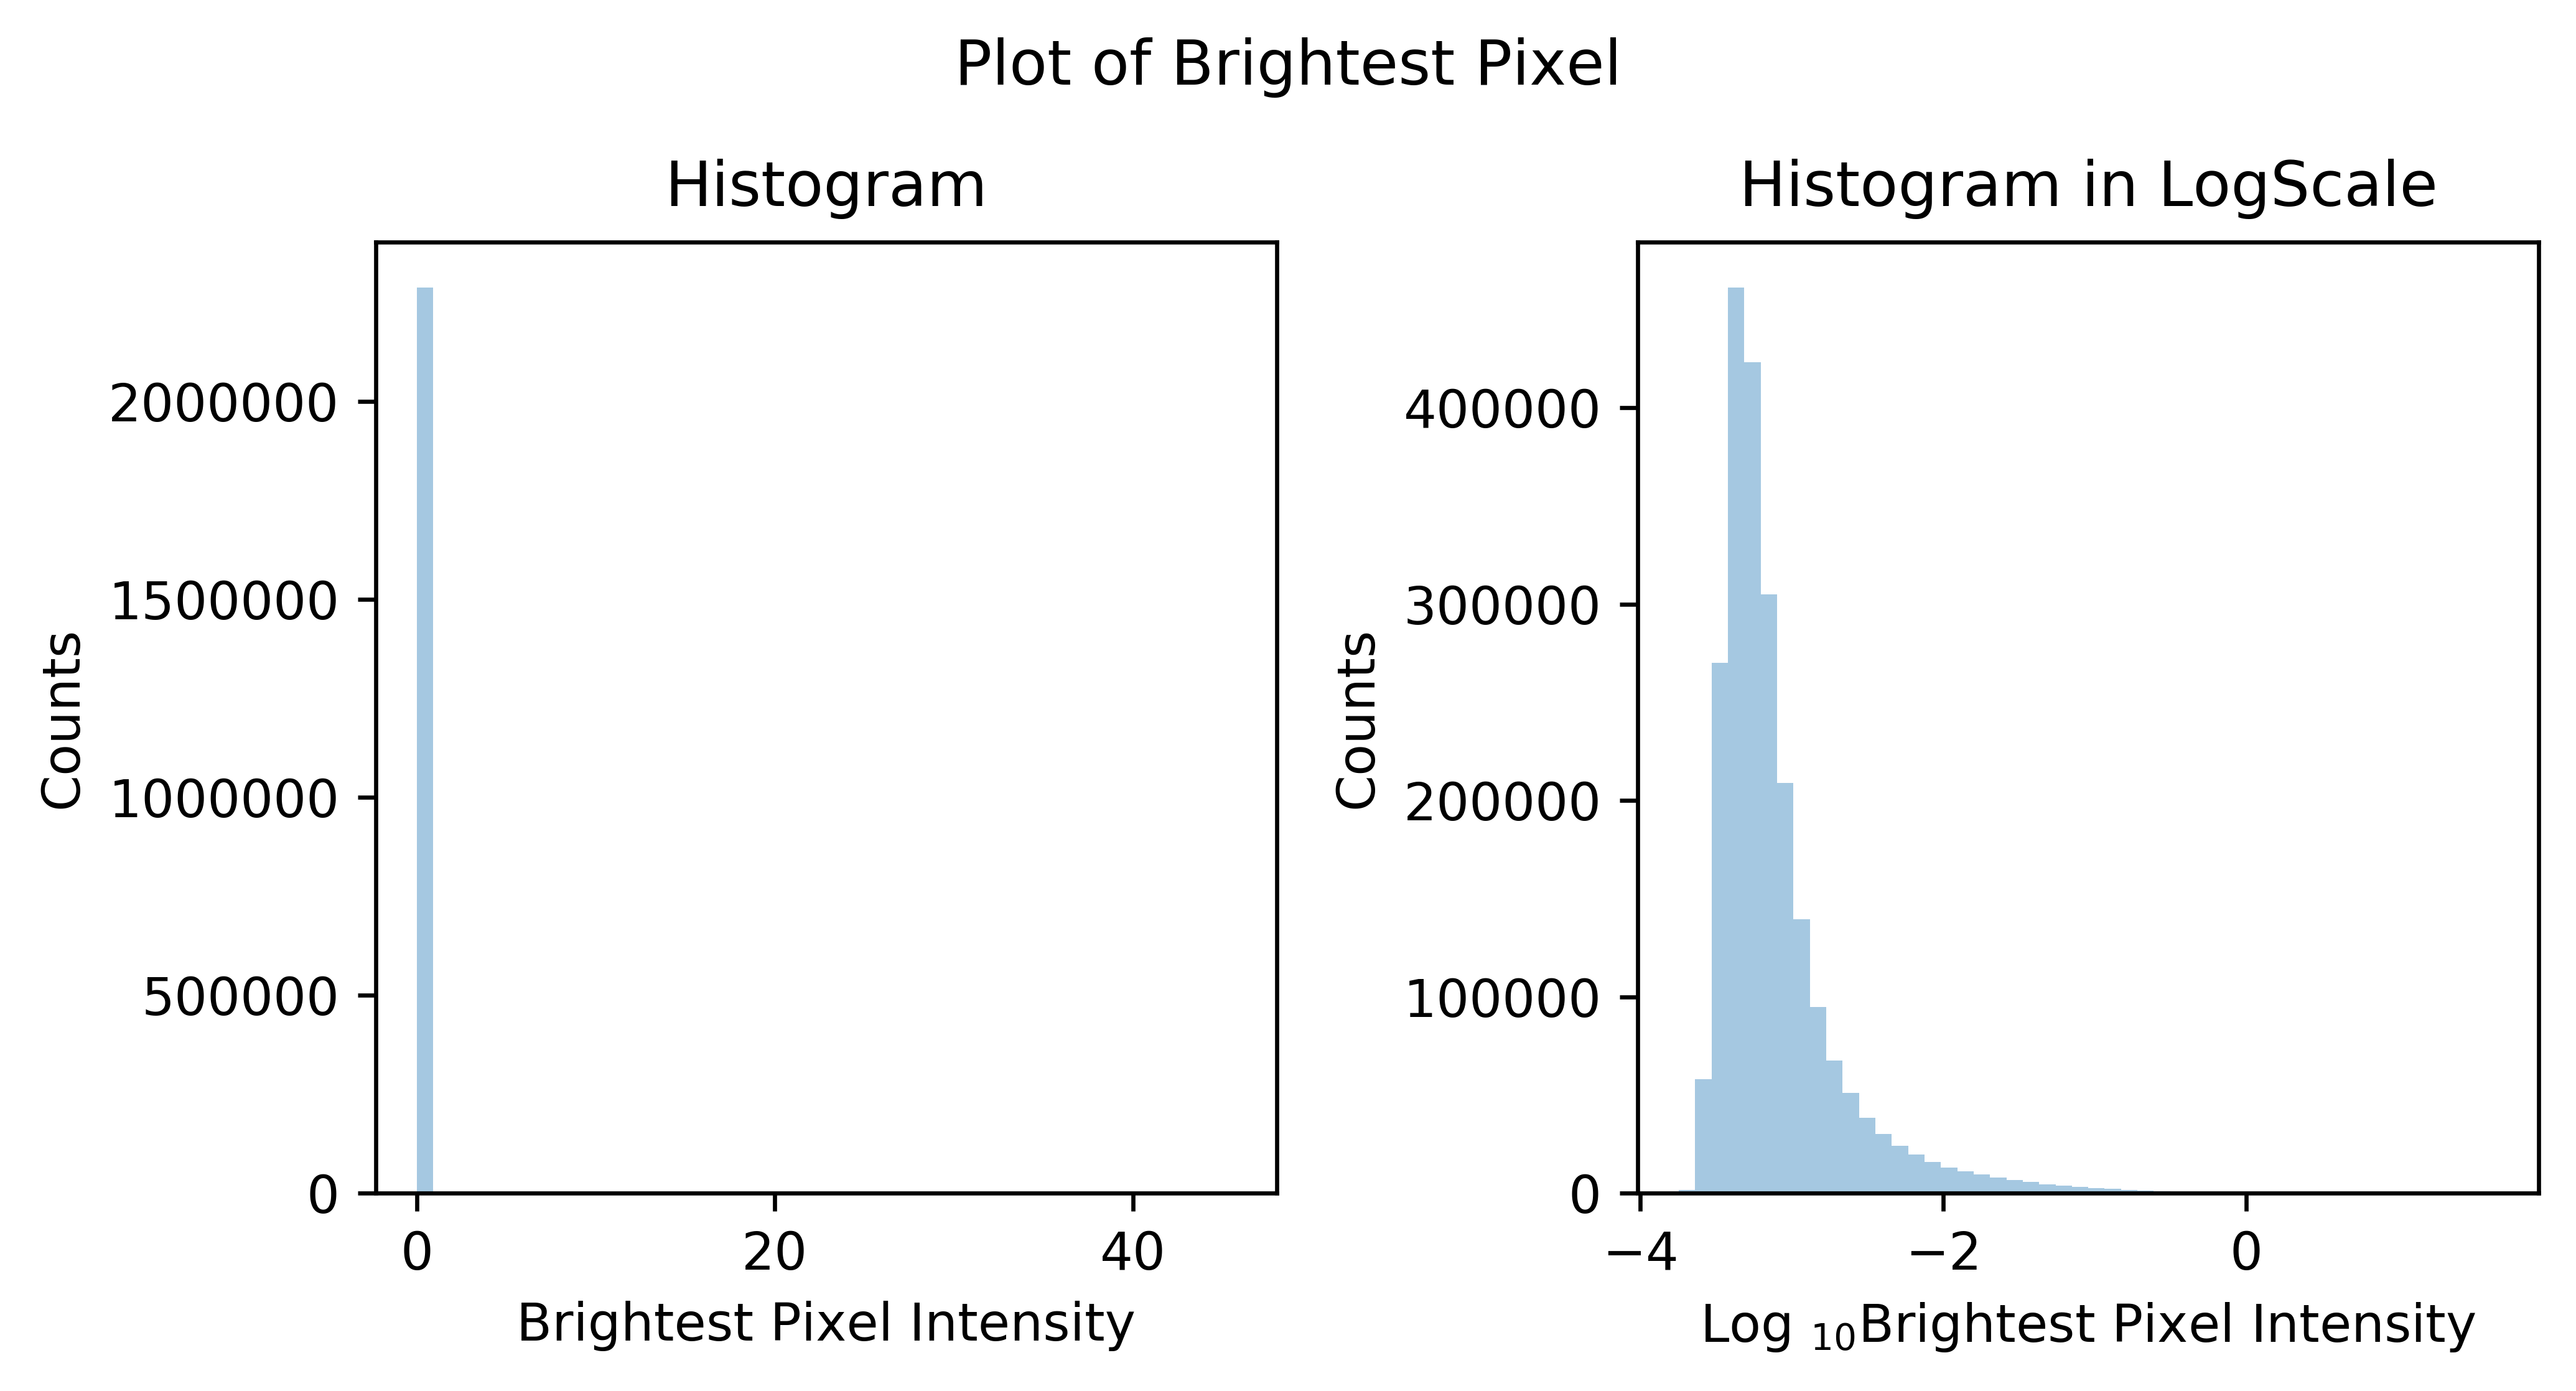

In [50]:
fig_brightestpxl = fairplot(data.brightest_pixel, main = "Plot of Brightest Pixel",xlab = "Brightest Pixel Intensity", ylab = "Counts", 
                     kde=[False,False],dpi=dpi_set)
plt.savefig('BrightestPixels.png')

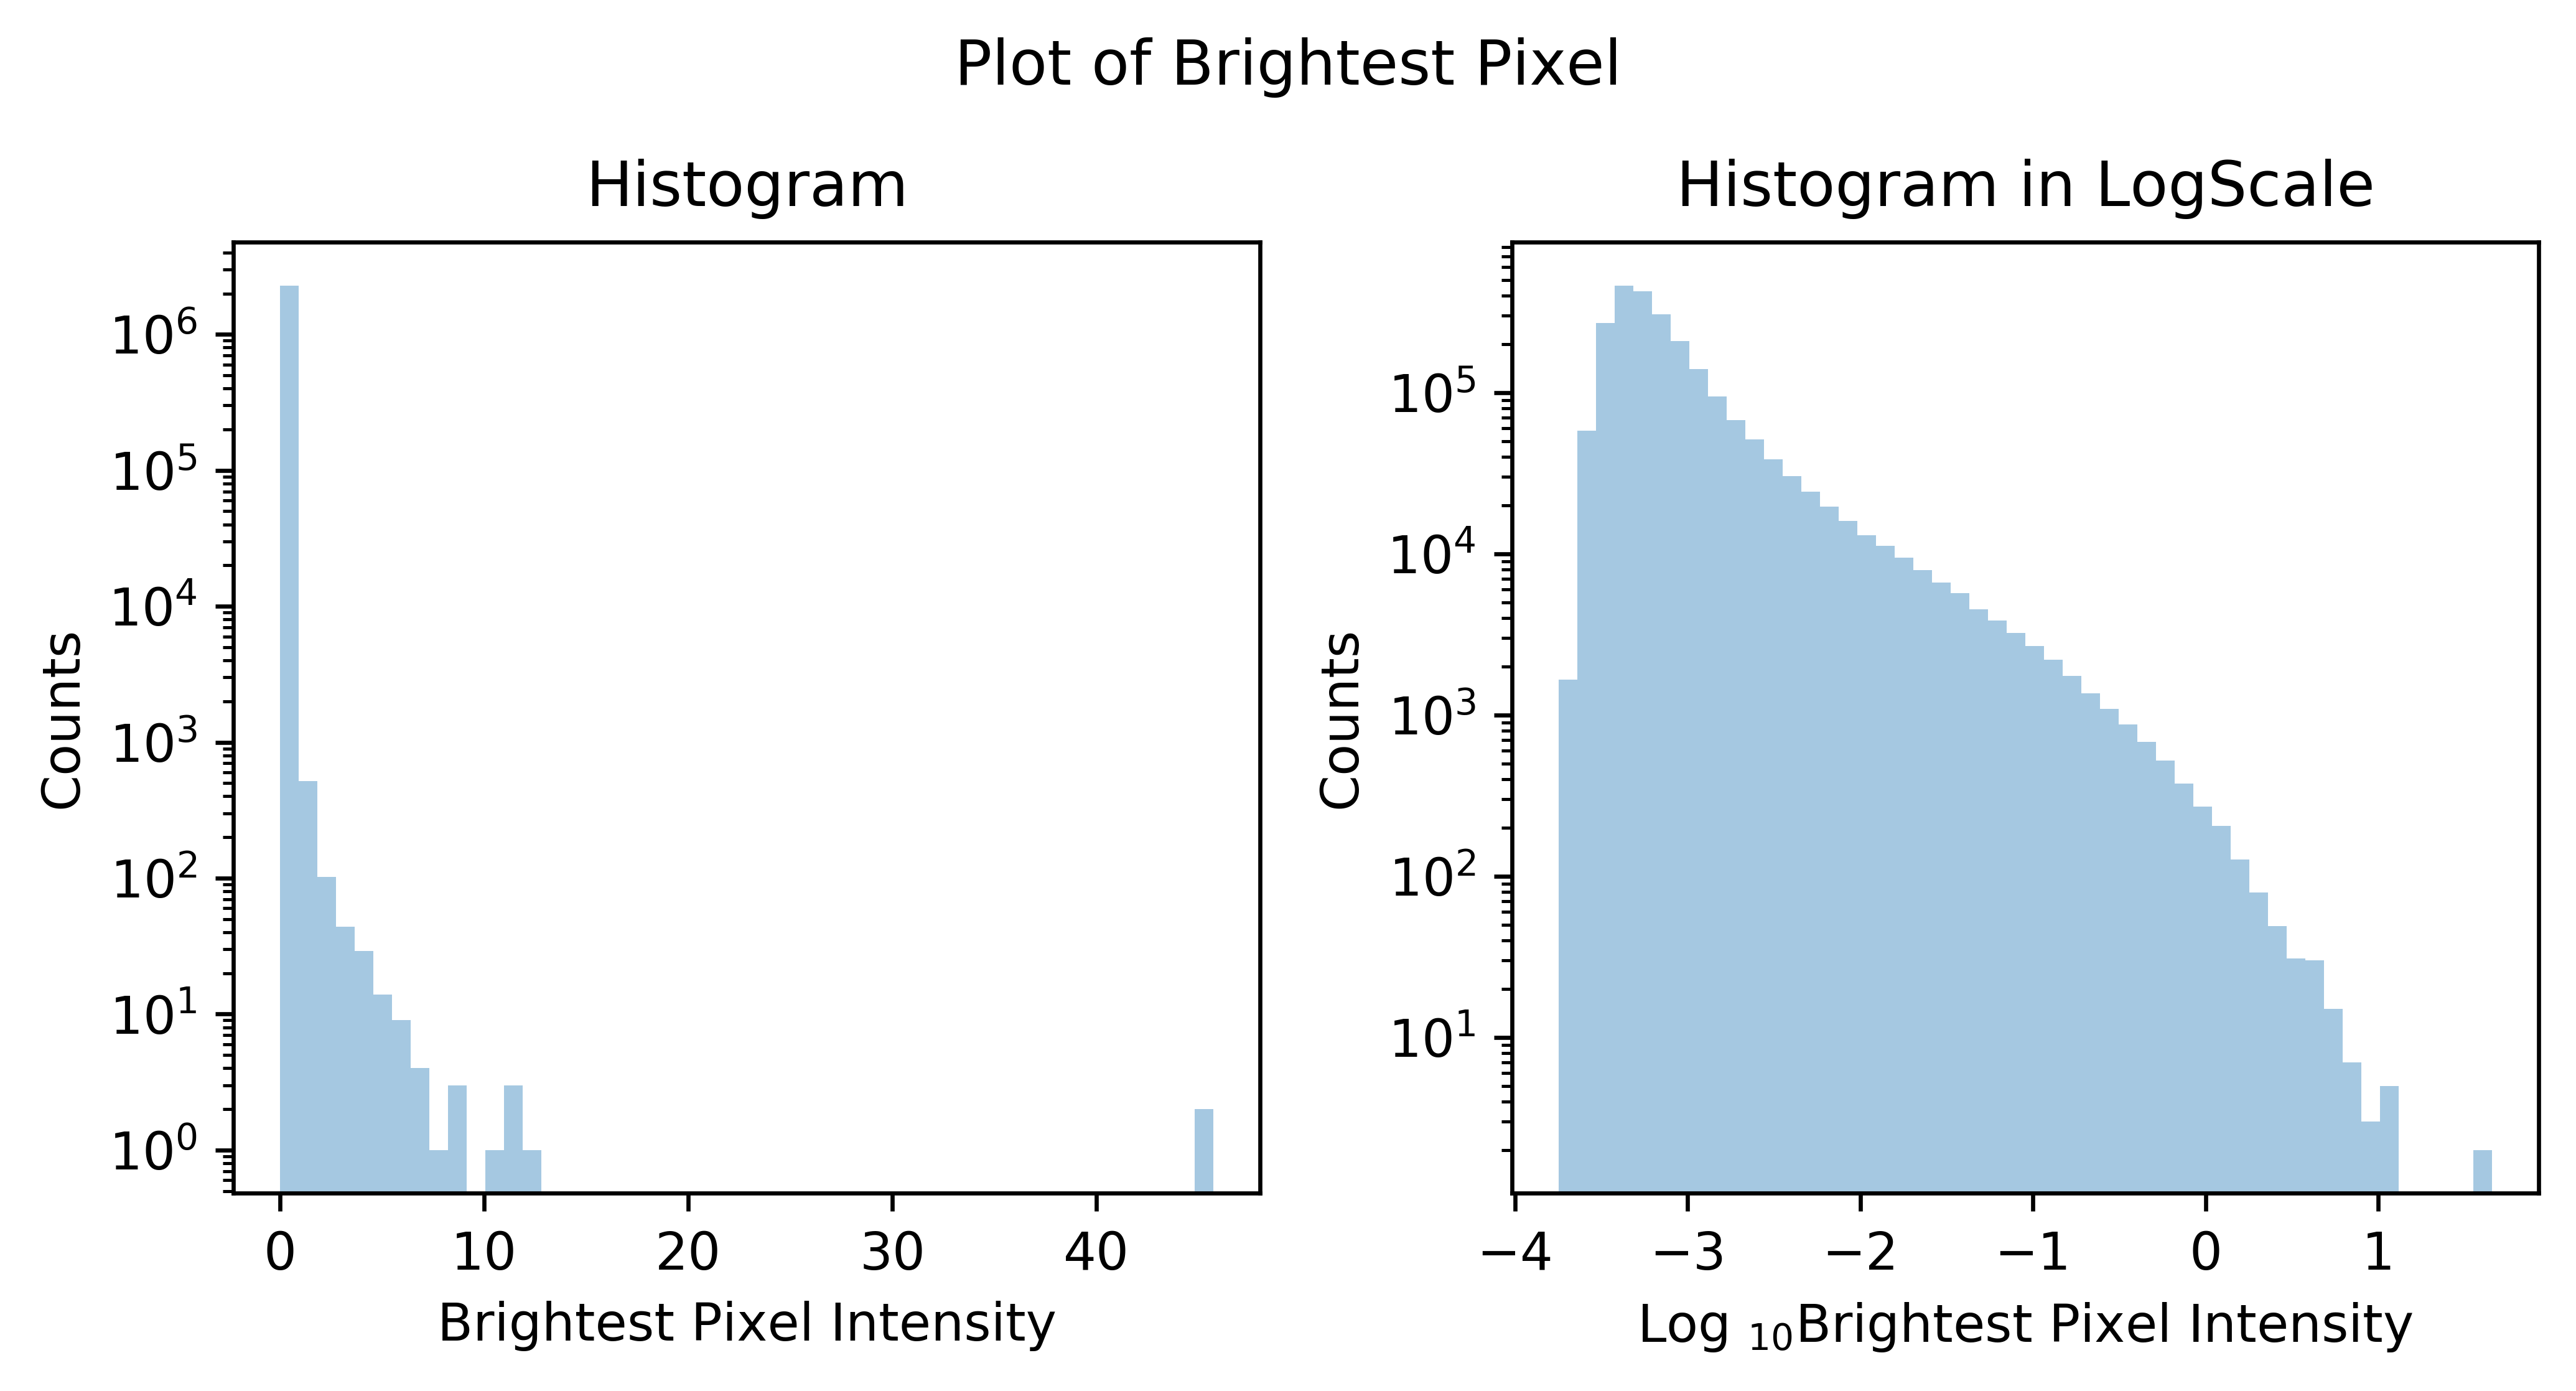

In [51]:
## Changed the y axis for the plots to Log scale
fig_brightestpxlLog = fairplot(data.brightest_pixel, main = "Plot of Brightest Pixel",xlab = "Brightest Pixel Intensity", ylab = "Counts", 
                     kde=[False,False],dpi=dpi_set, yscale = ['log','log'], scale_base = 10)
plt.savefig('BrightestPixels_Log.png')

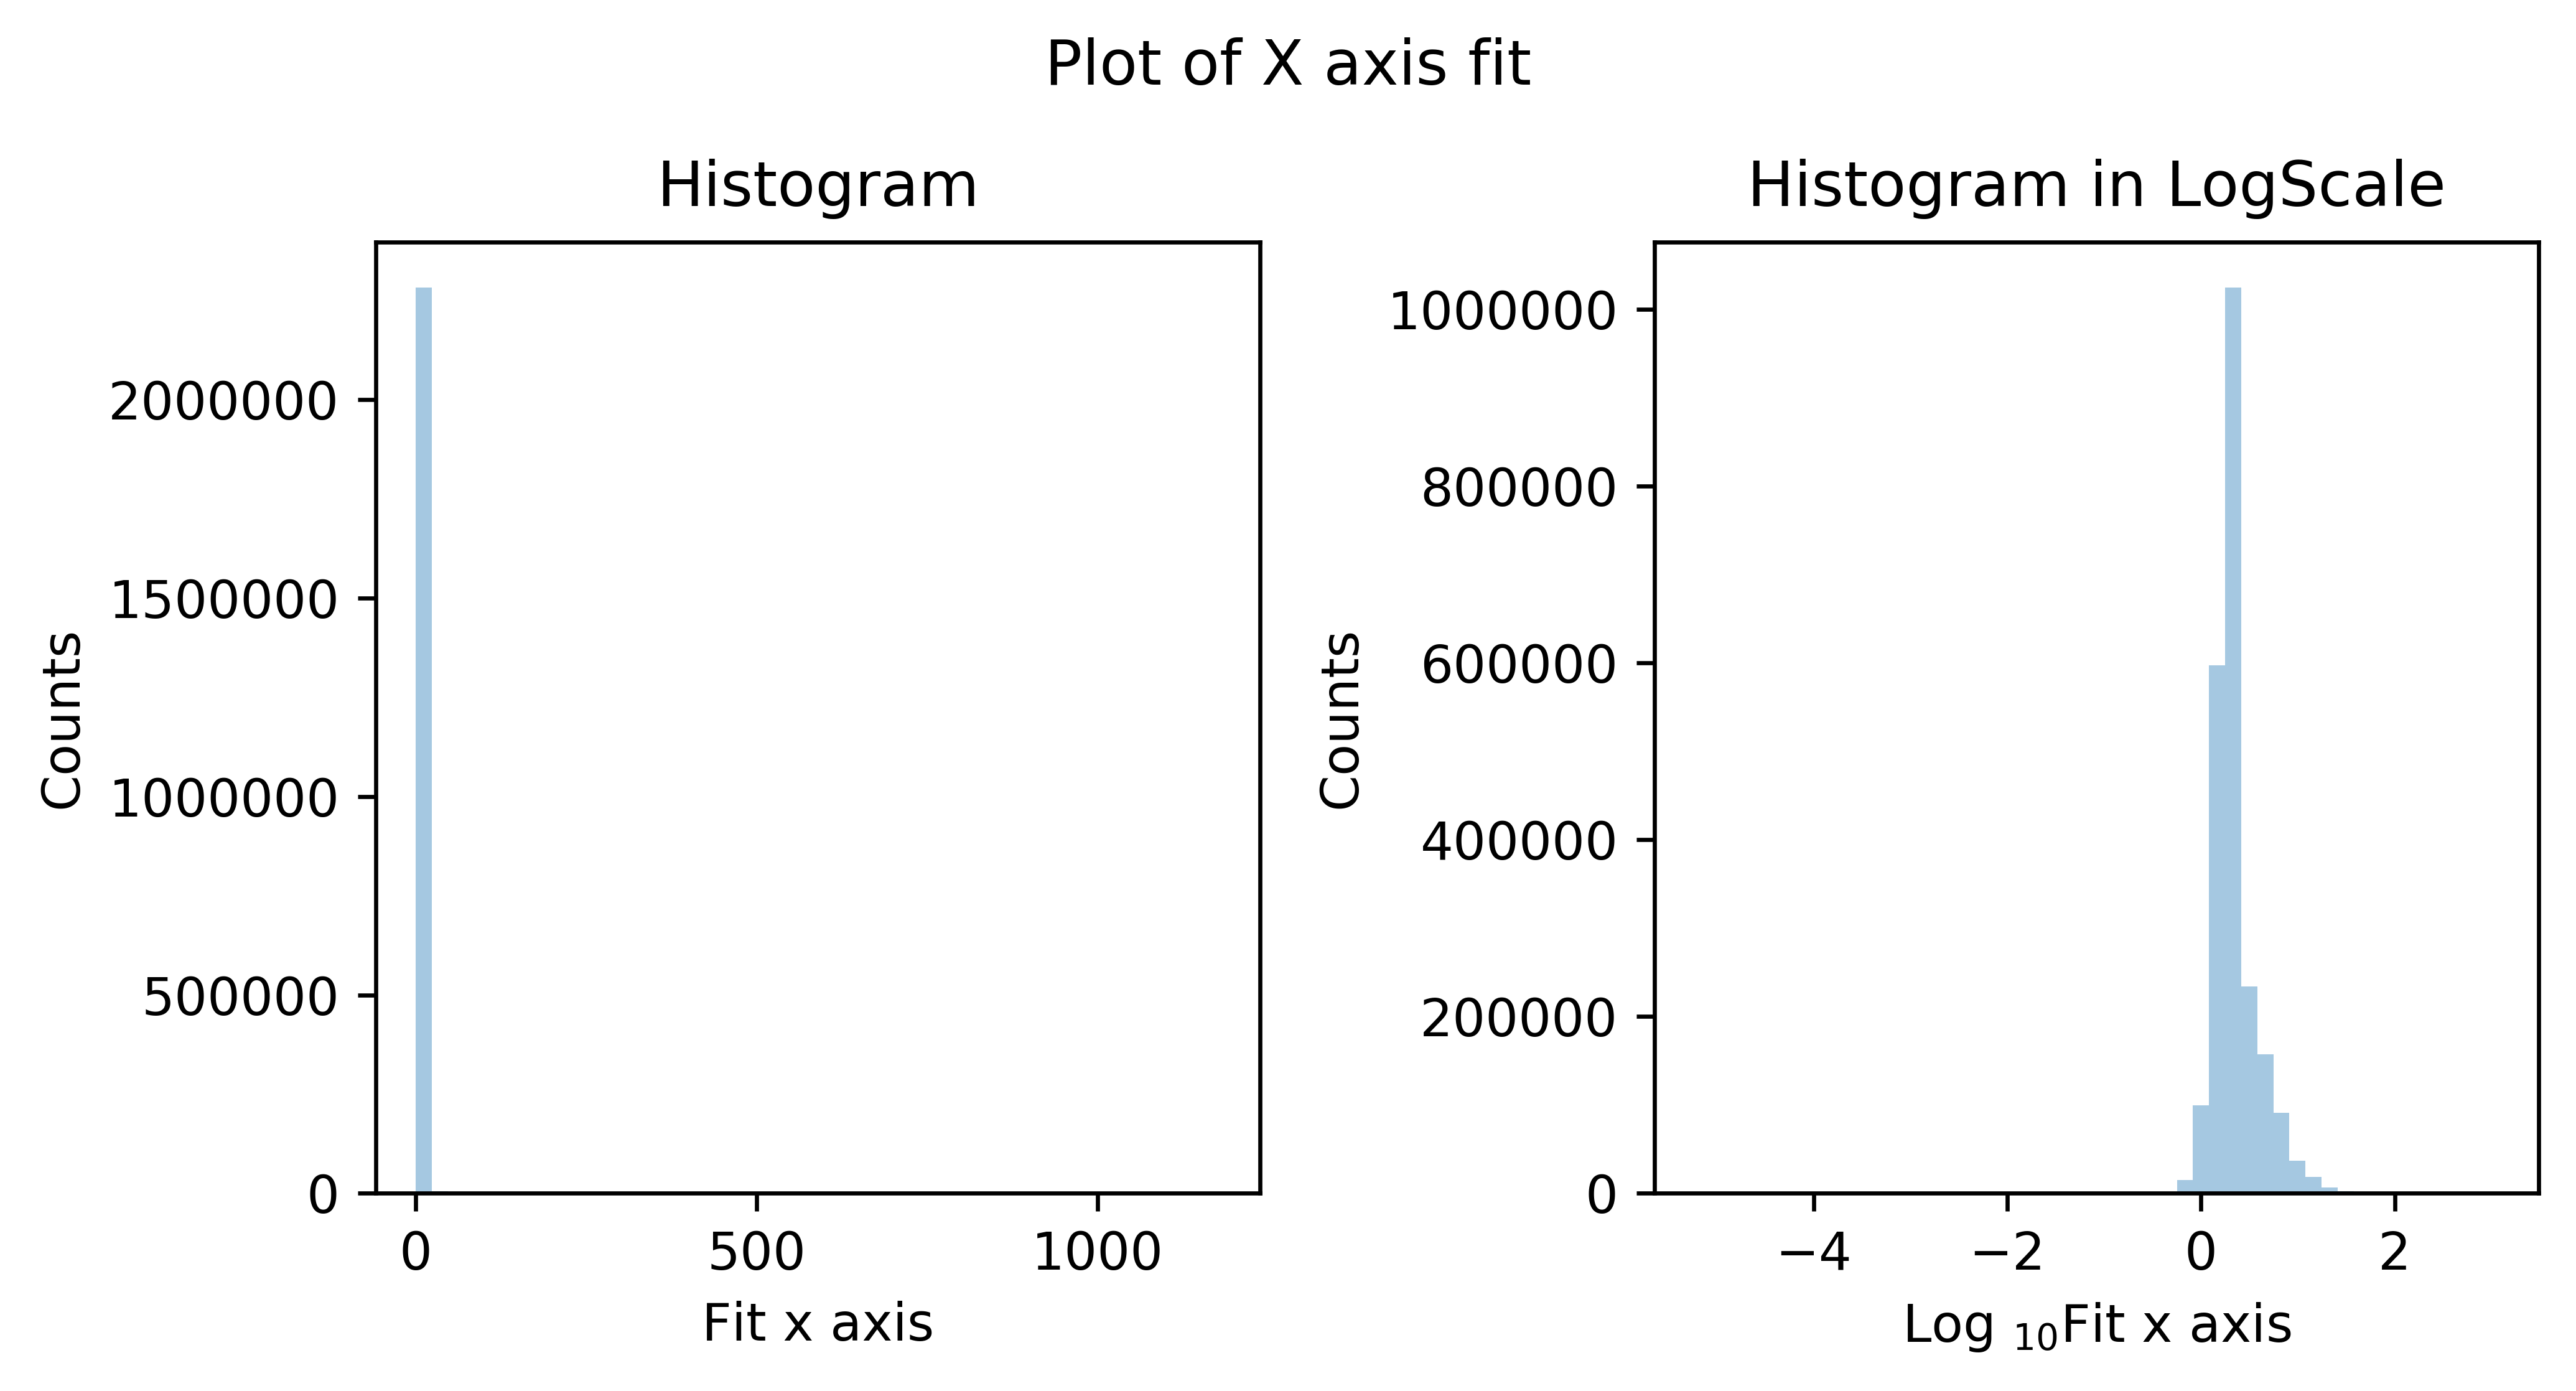

In [52]:
fig_xaxis = fairplot(data.fit_x_axis, main = "Plot of X axis fit",xlab = "Fit x axis", ylab = "Counts", 
                     kde=[False,False],dpi=dpi_set, yscale=['linear','linear'])

plt.savefig('Fit_Xaxis.png')

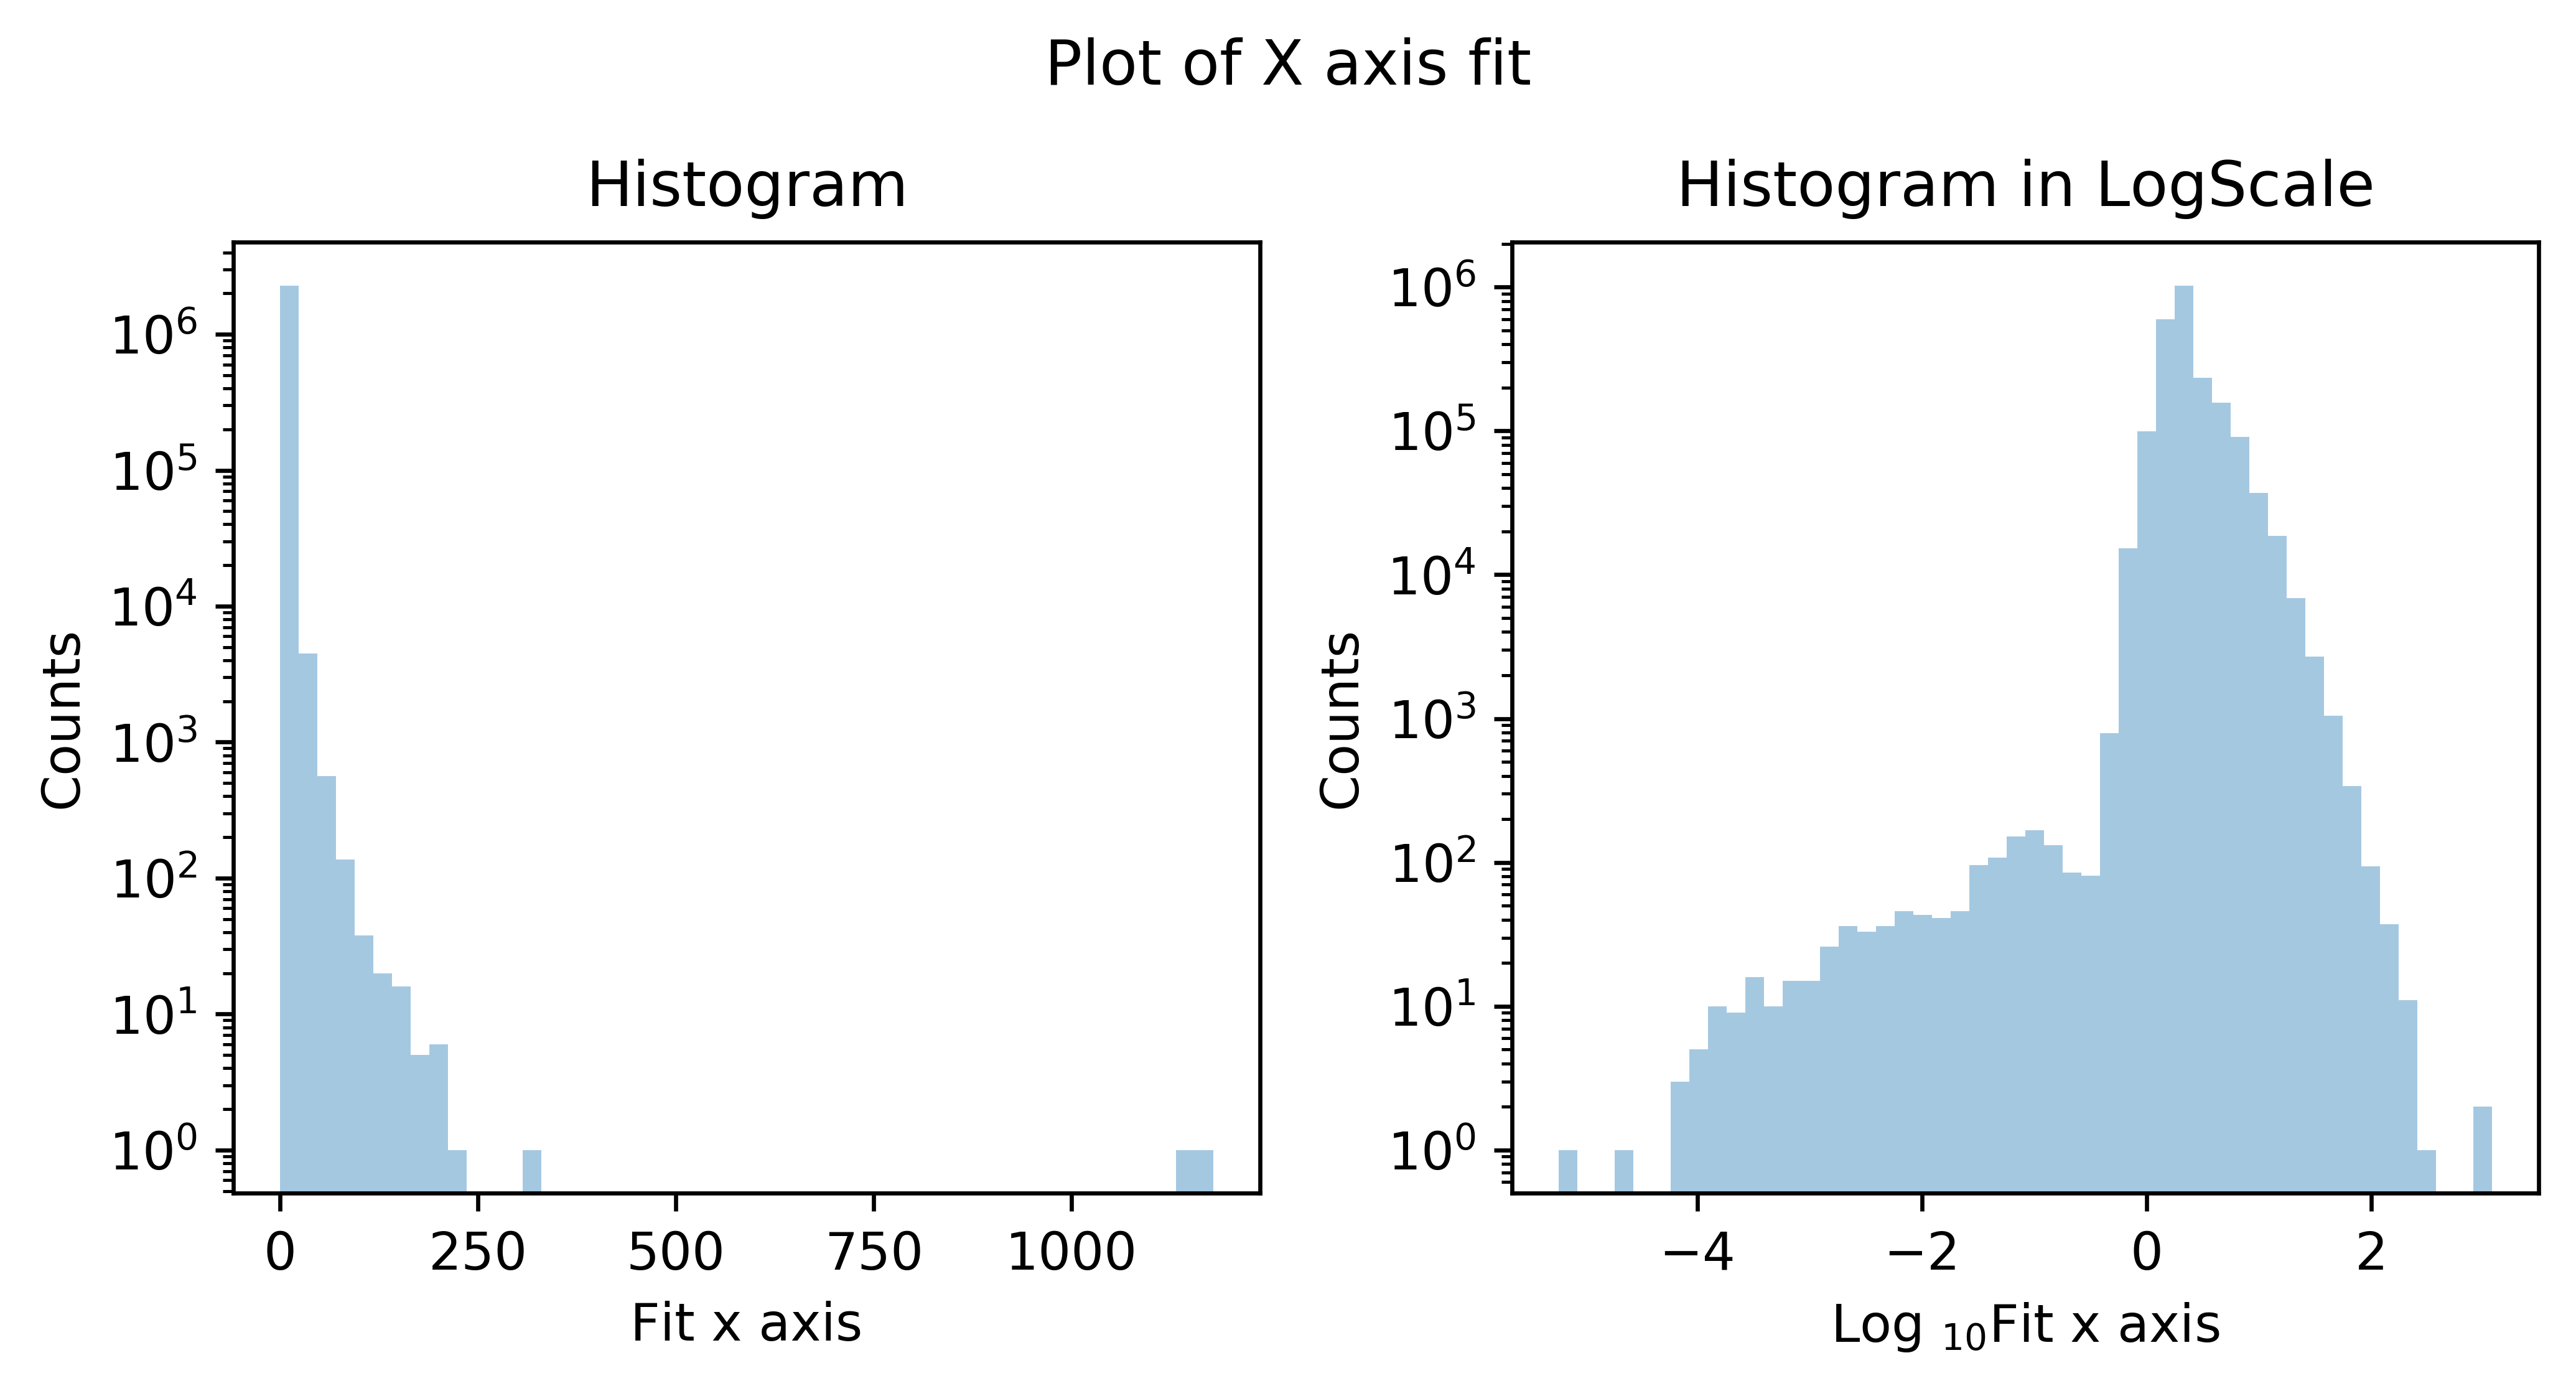

In [53]:
## Changed the y axis for the plots to Log scale
fig_xaxisLog = fairplot(data.fit_x_axis, main = "Plot of X axis fit",xlab = "Fit x axis", ylab = "Counts", 
                     kde=[False,False],dpi=dpi_set, yscale = ['log','log'], scale_base = 10)
plt.savefig('Fit_Xaxis_Log.png')

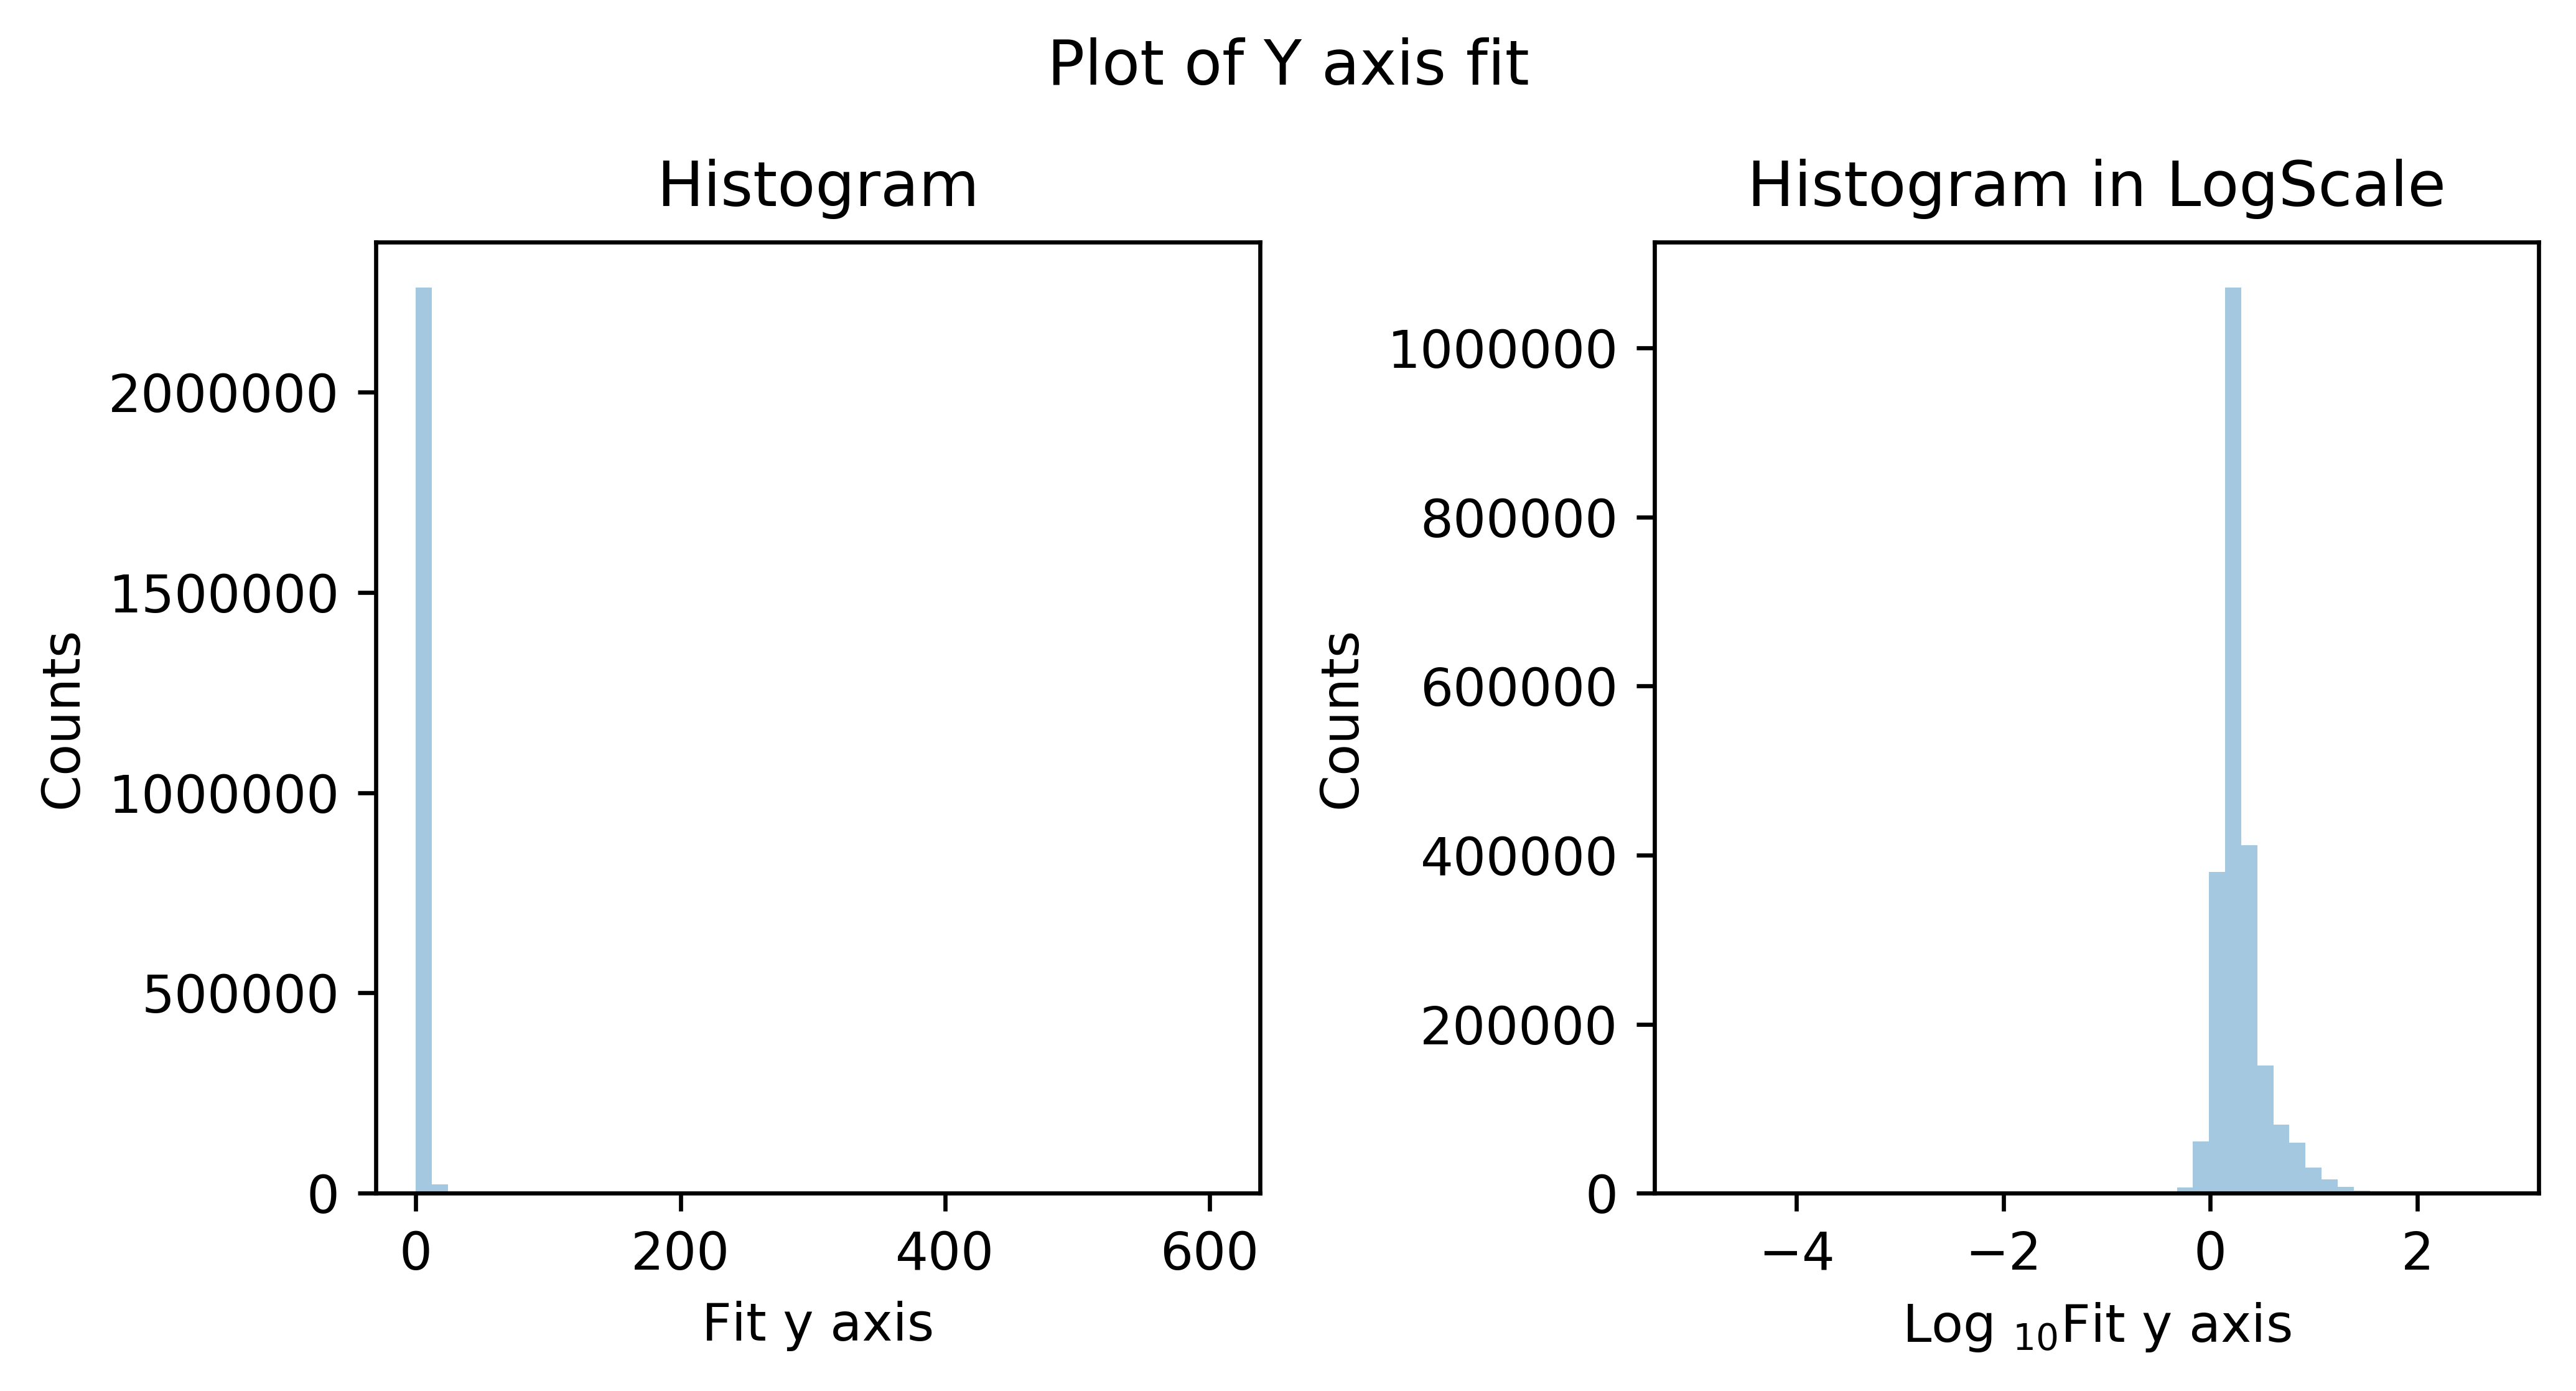

In [54]:
fig_yaxis = fairplot(data.fit_y_axis, main = "Plot of Y axis fit", 
                             xlab = "Fit y axis", ylab = "Counts", dpi=dpi_set, kde=[False,False])
plt.savefig('Fit_Yaxis.png')

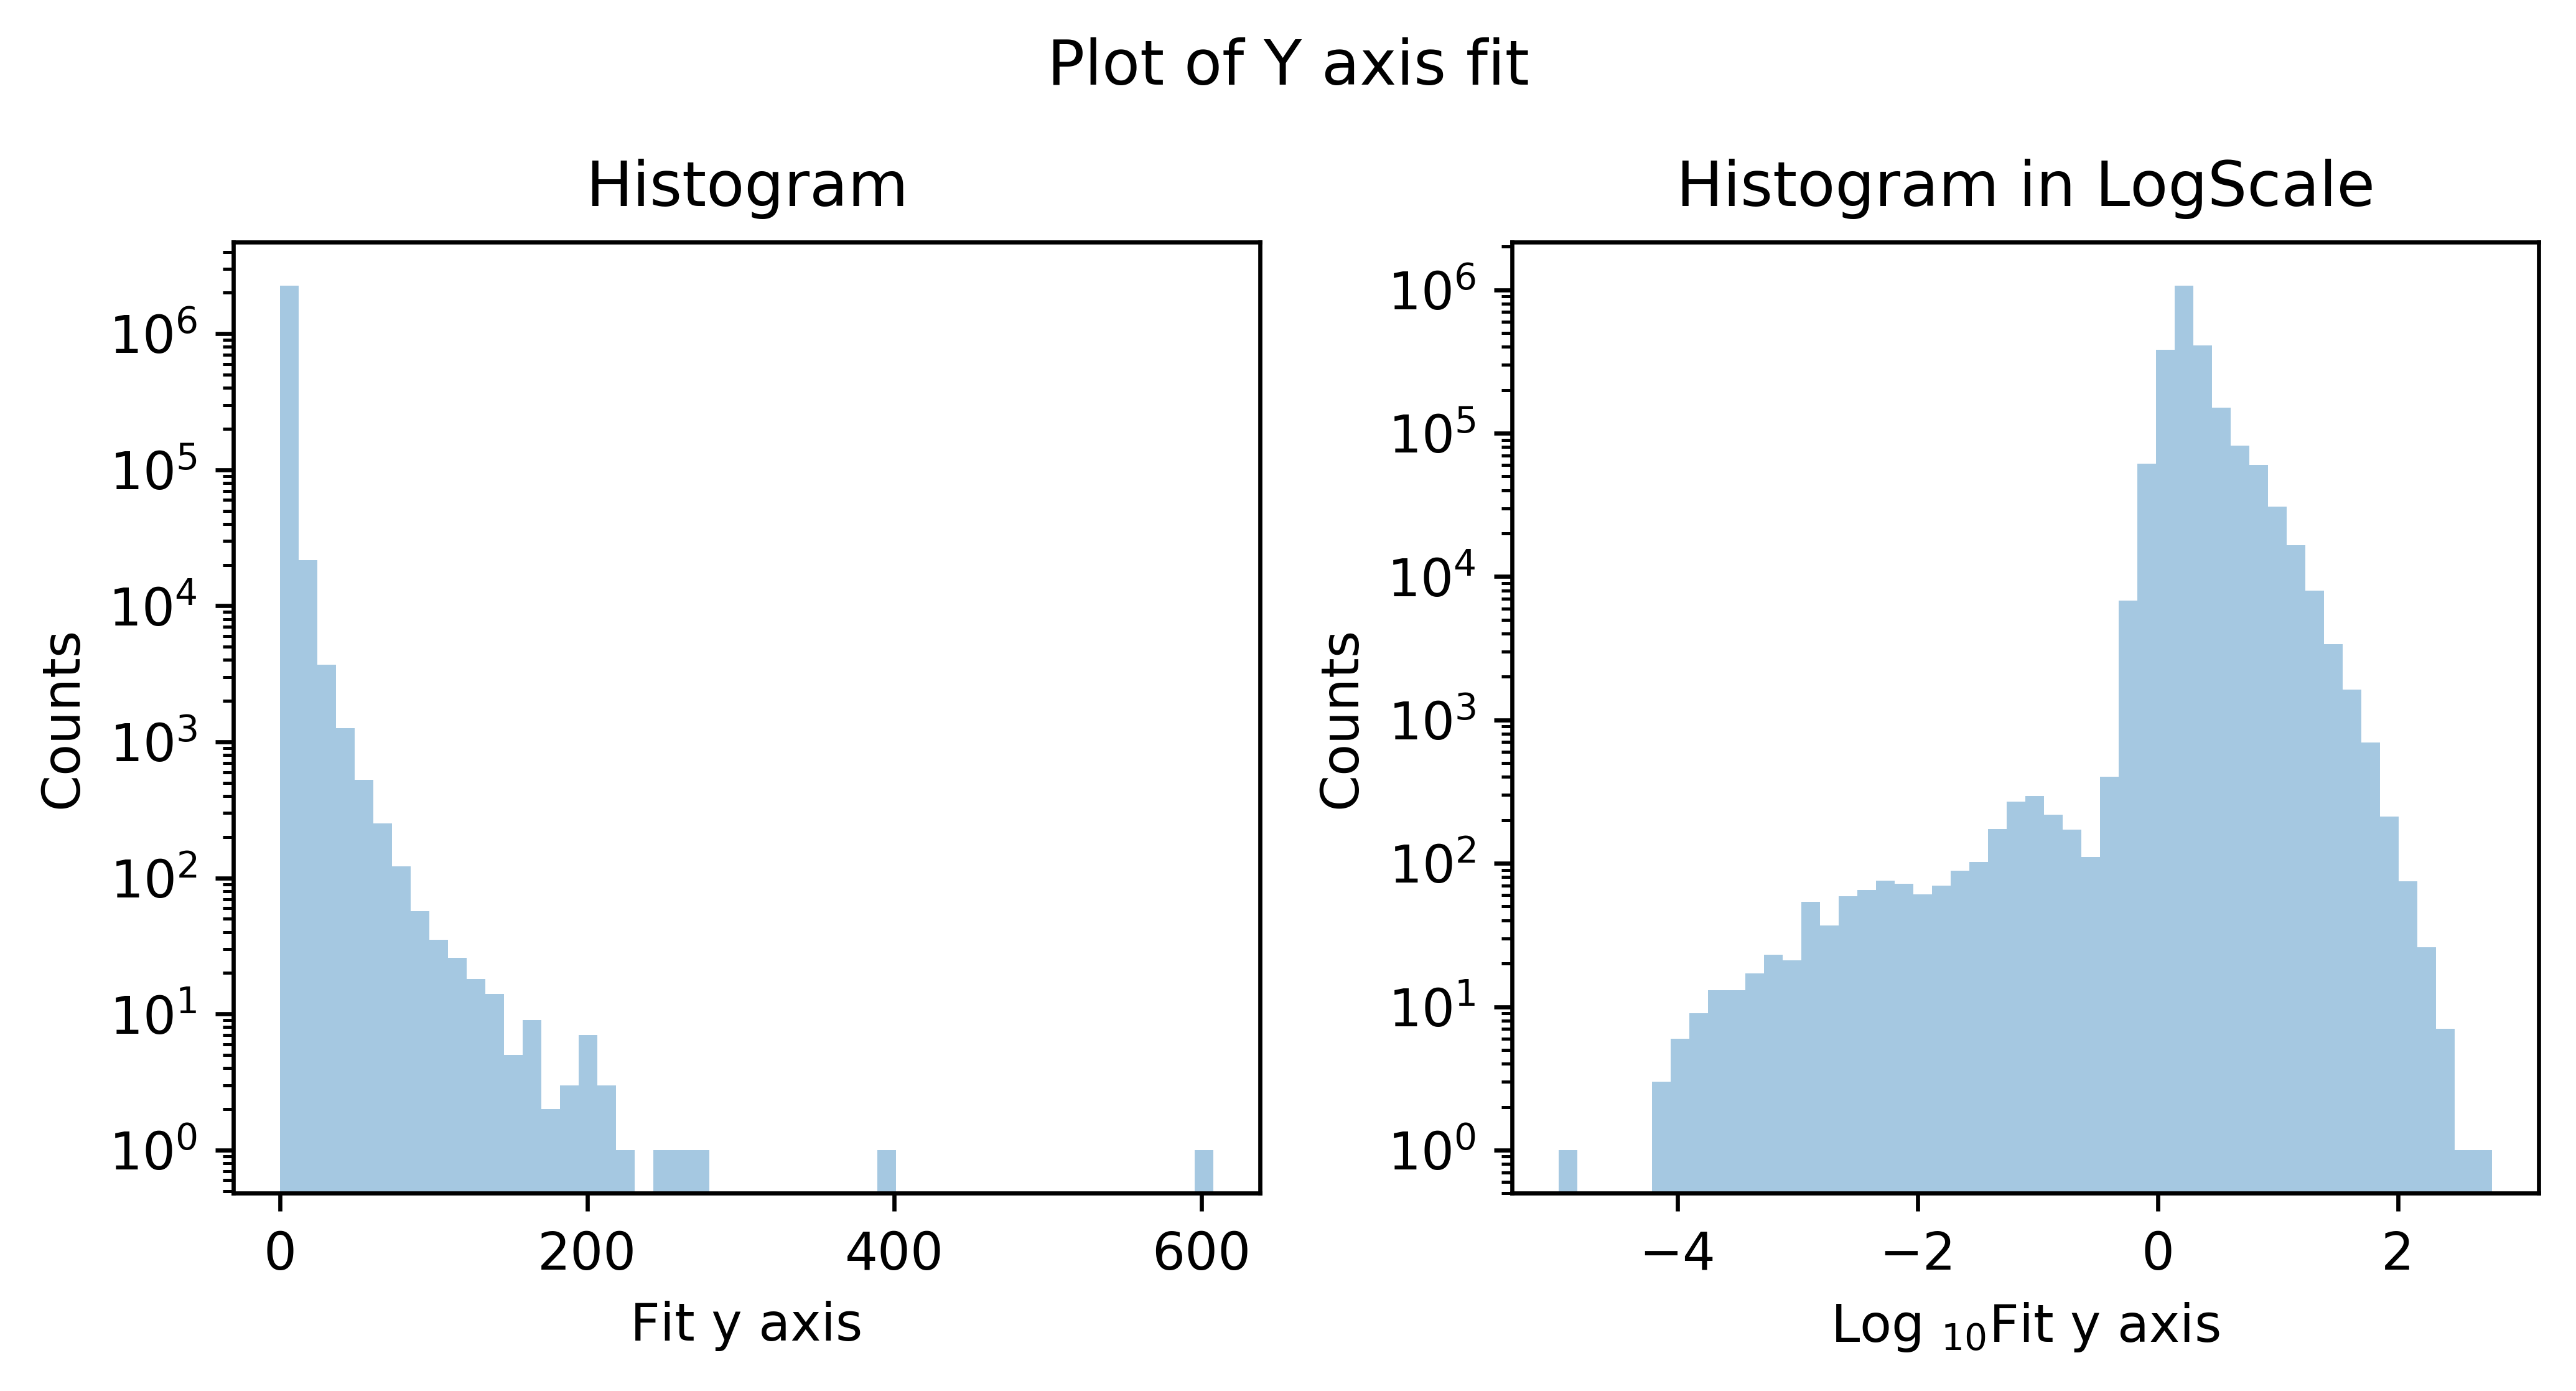

In [55]:
fig_yaxisLog = fairplot(data.fit_y_axis, main = "Plot of Y axis fit", kde=[False,False],
                             xlab = "Fit y axis", ylab = "Counts", dpi=dpi_set, yscale = ['log','log'], scale_base = 10)
plt.savefig('Fit_Yaxis_Log.png')

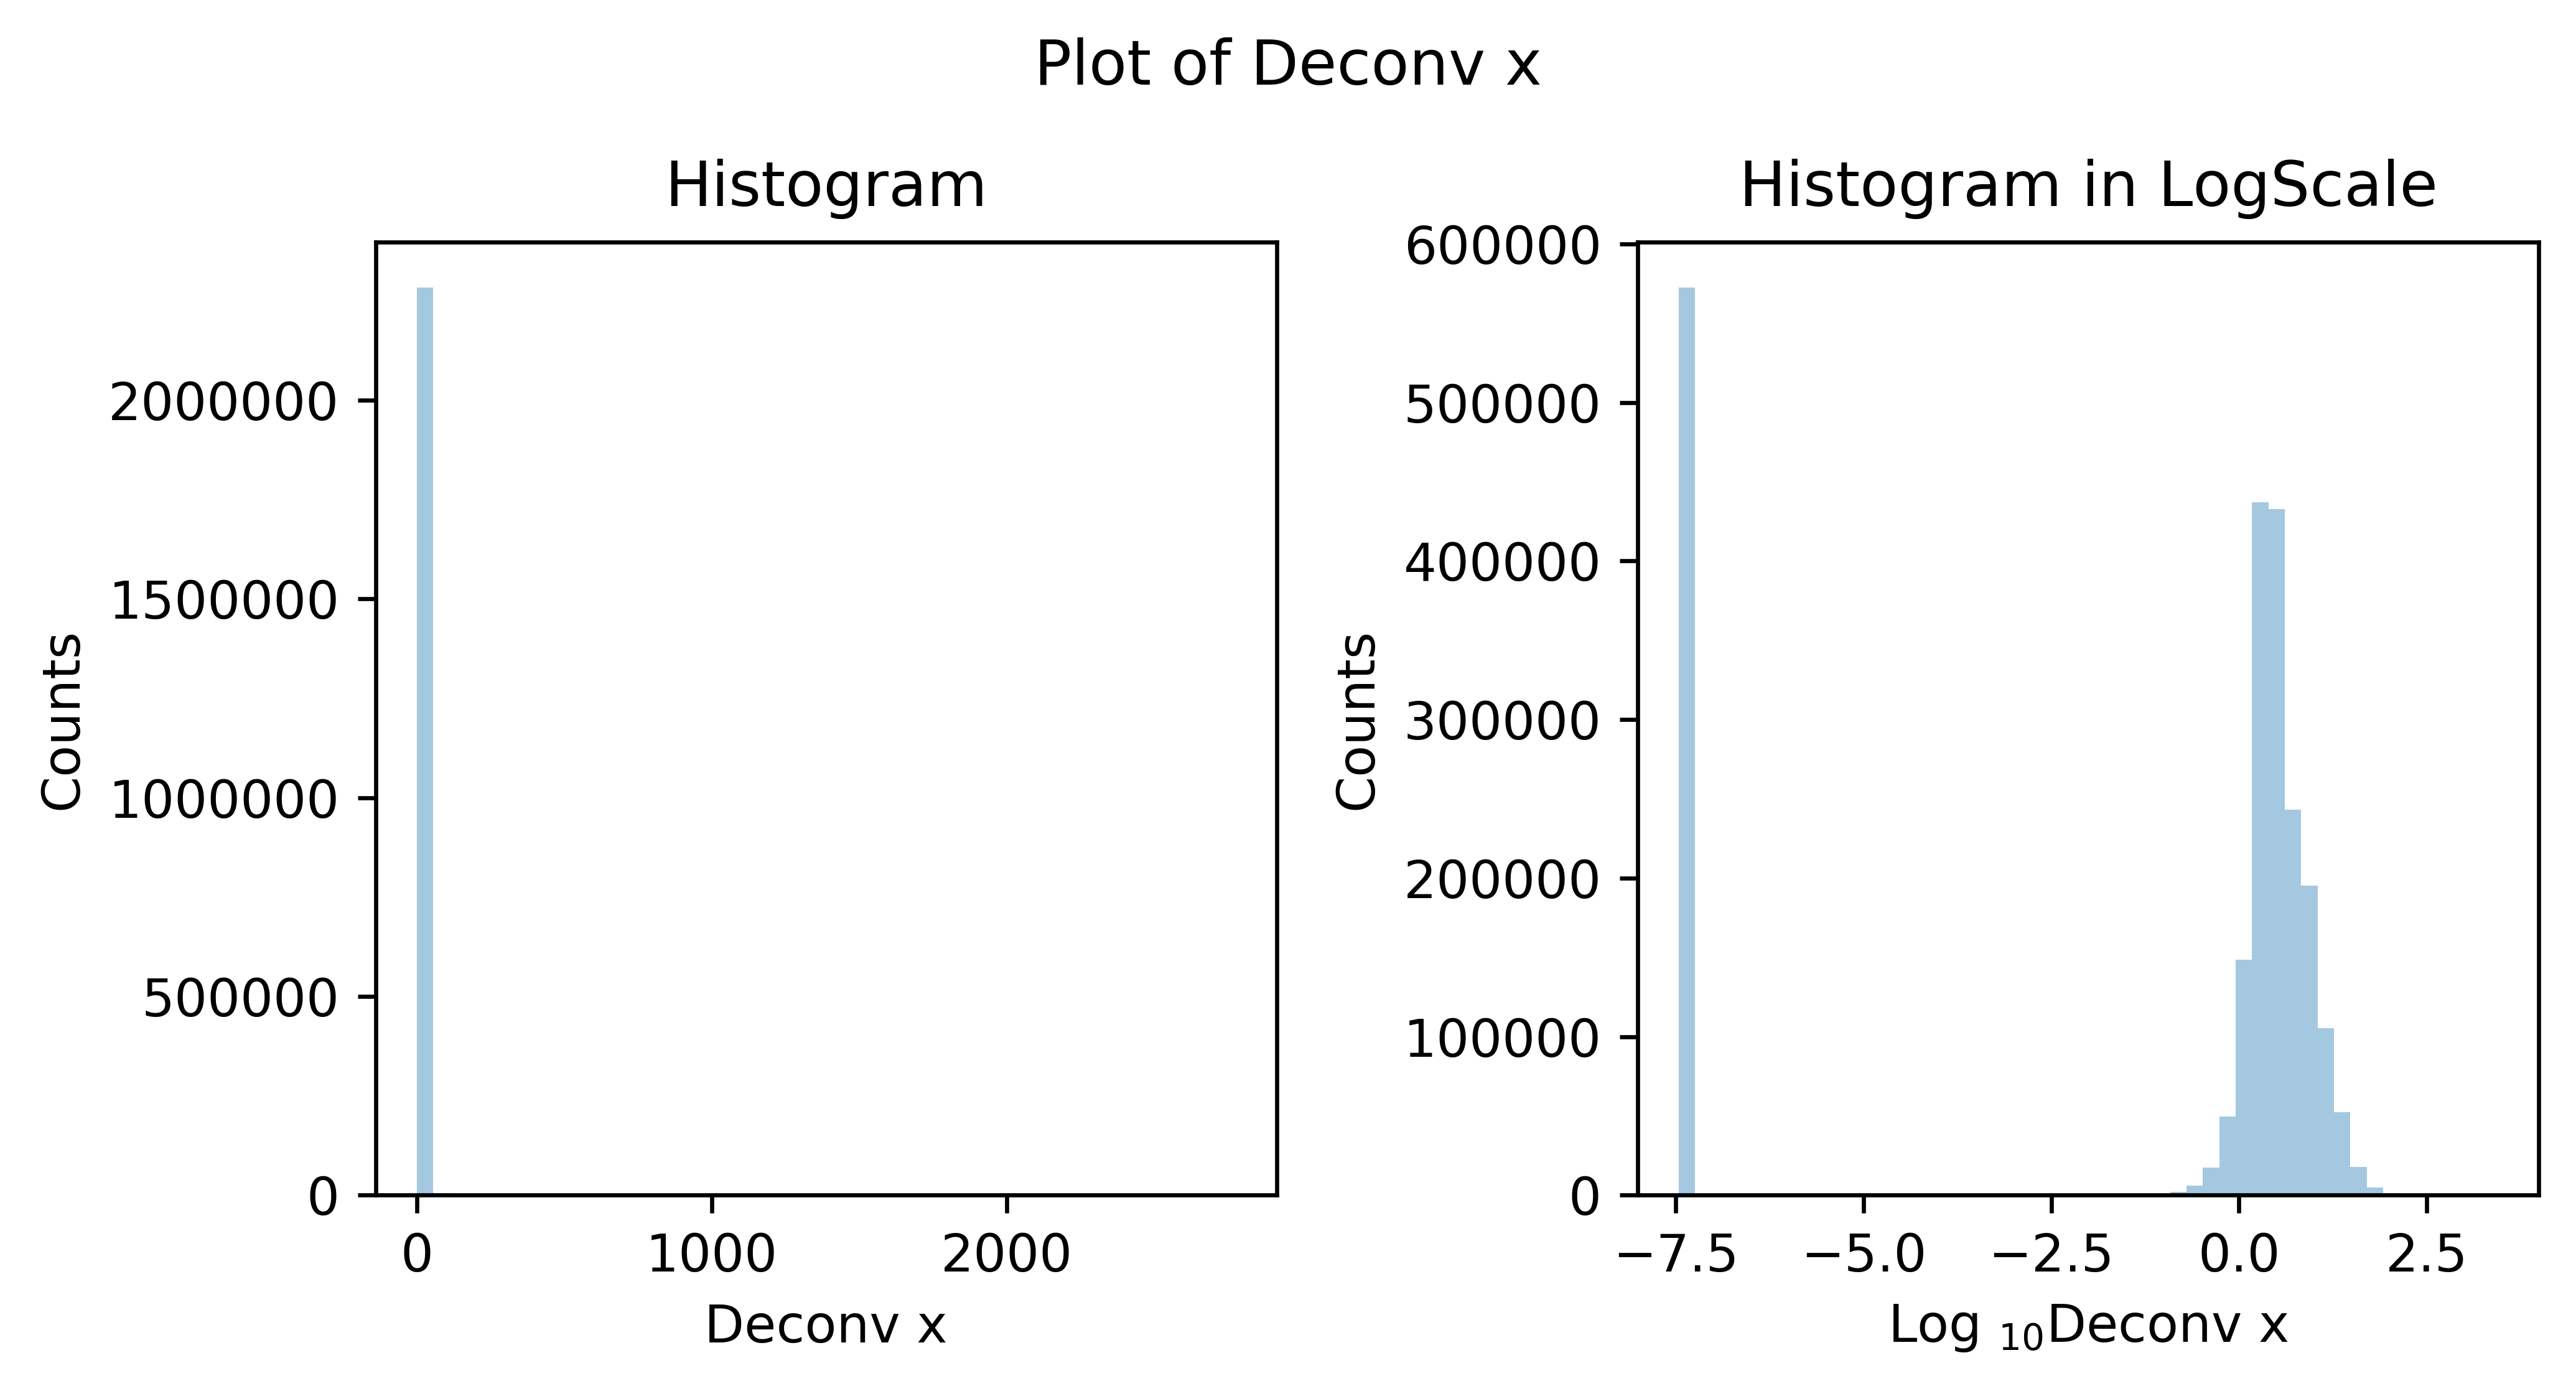

In [56]:
fig_Deconvx = fairplot(data.deconv_x, main = "Plot of Deconv x", kde=[False,False],
                             xlab = "Deconv x", ylab = "Counts", dpi=dpi_set)
plt.savefig('Deconv_X.png')

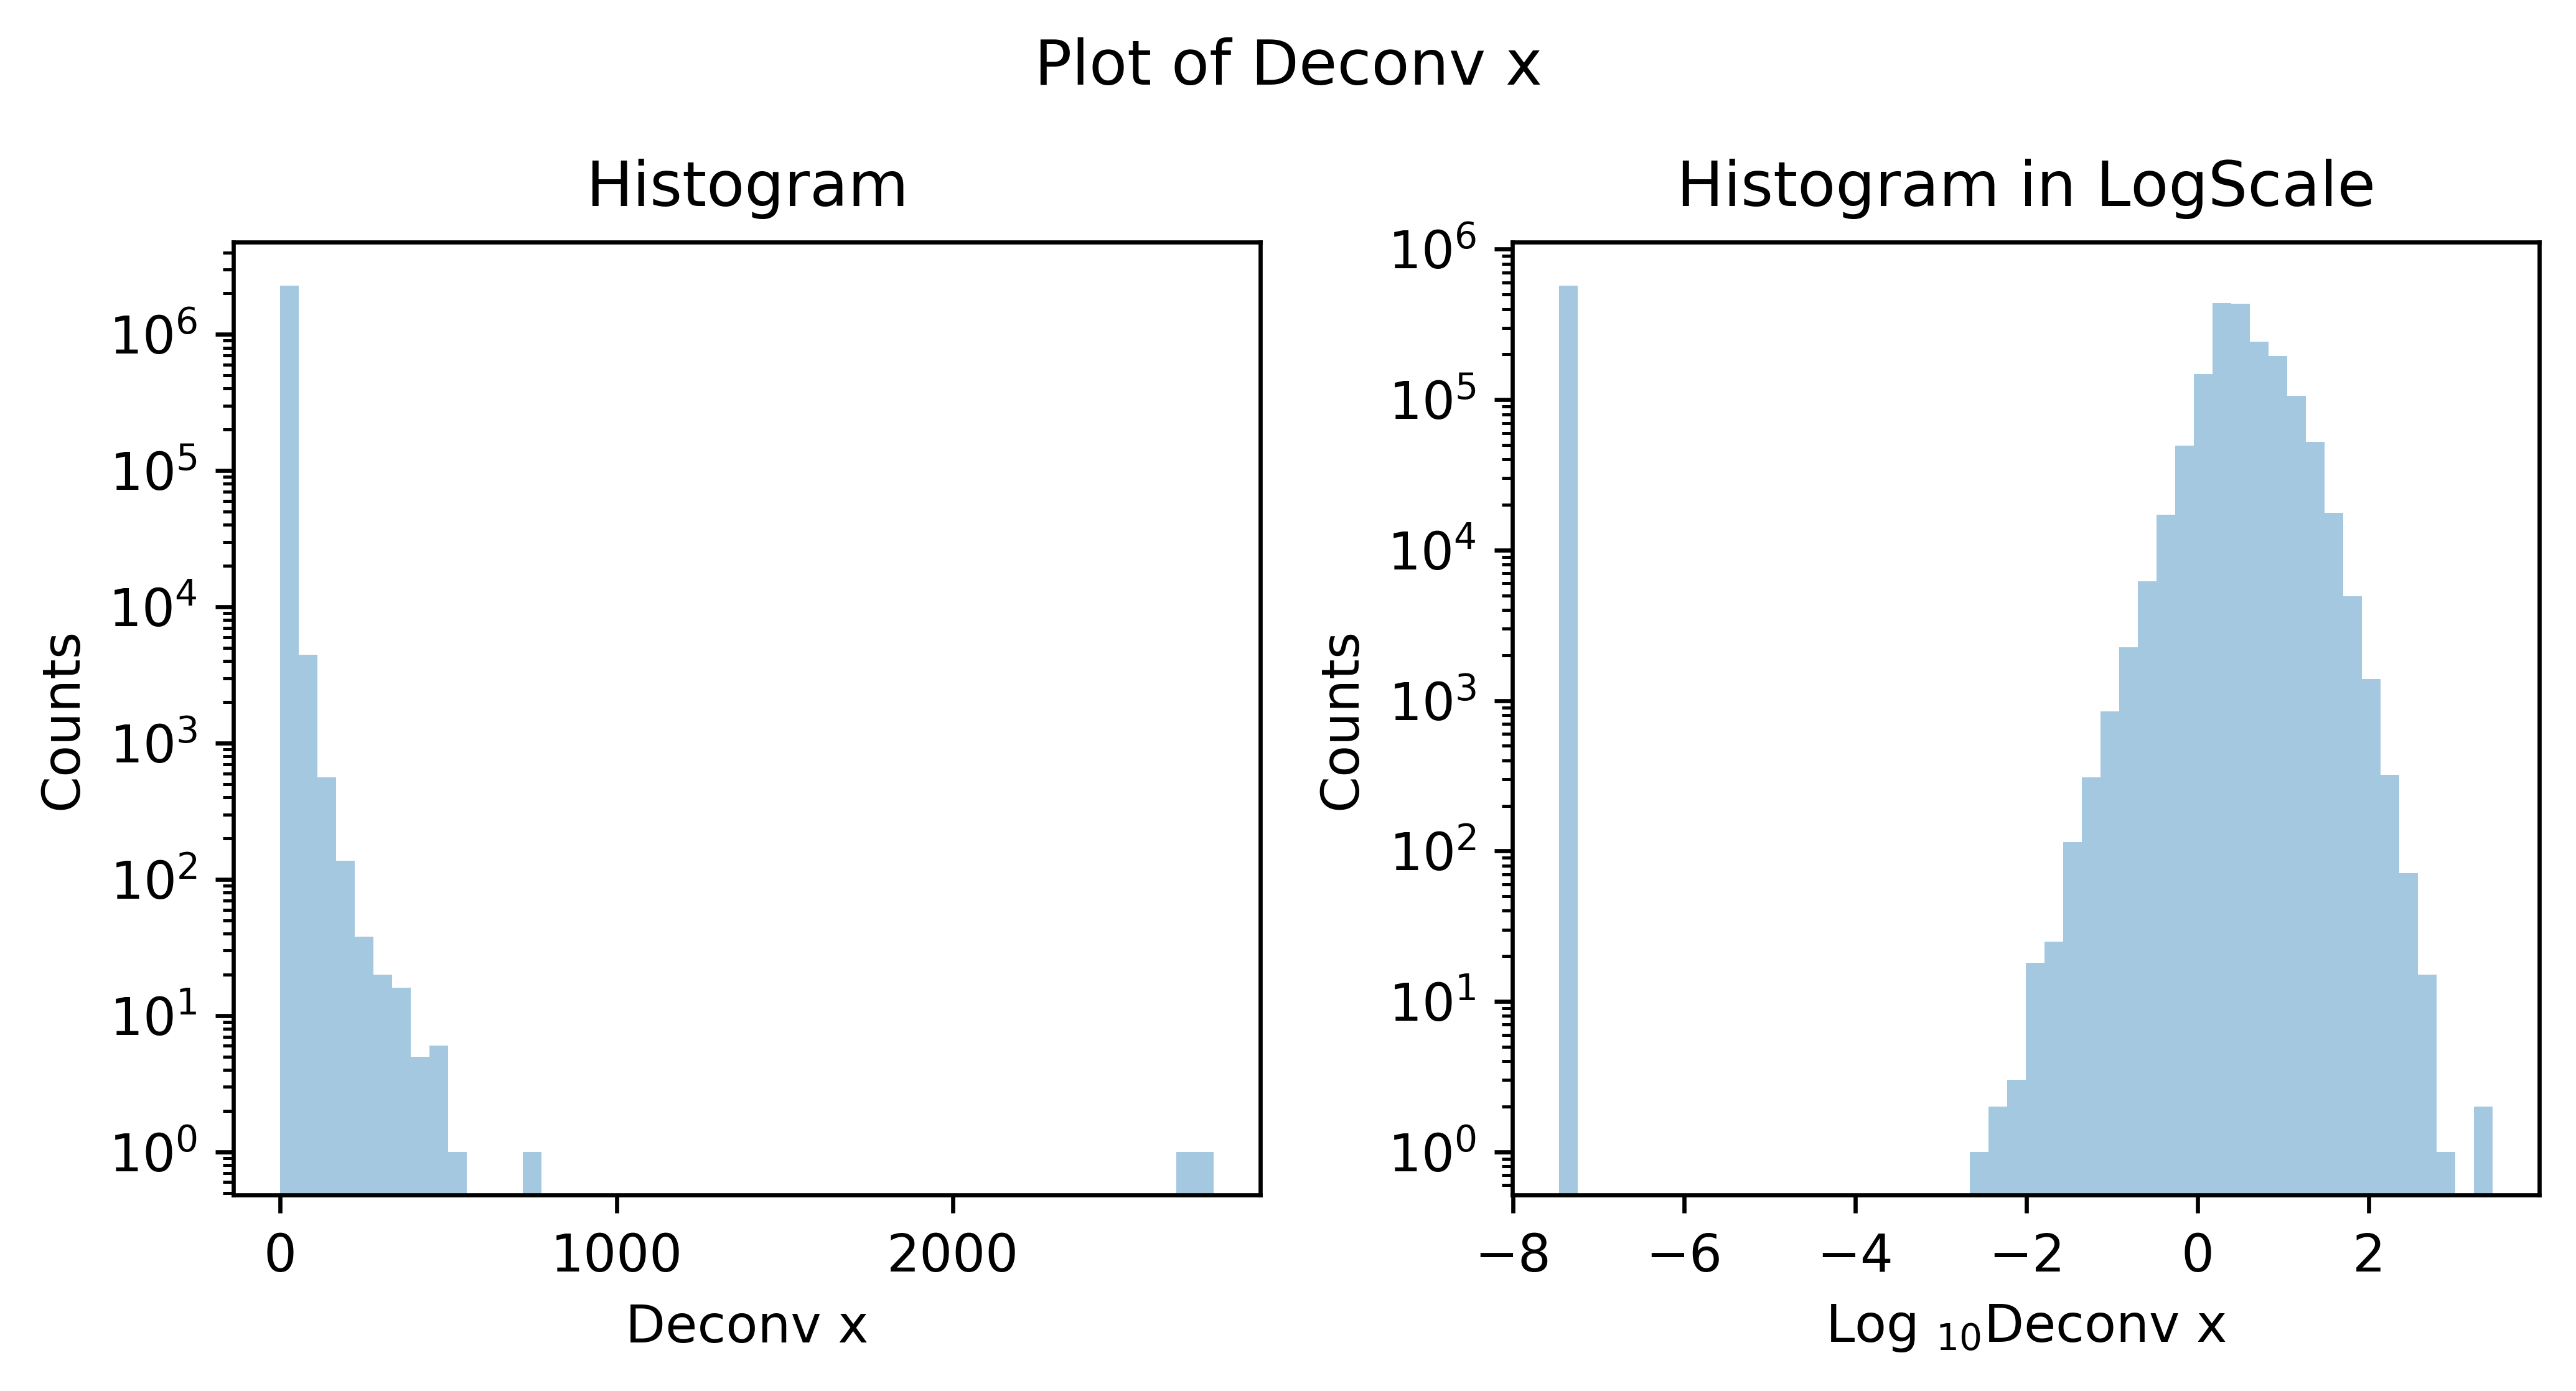

In [57]:
fig_DeconvxLog = fairplot(data.deconv_x, main = "Plot of Deconv x", kde=[False,False],
                             xlab = "Deconv x", ylab = "Counts", dpi=dpi_set, yscale = ['log','log'], scale_base = 10)
plt.savefig('Deconv_X_Log.png')

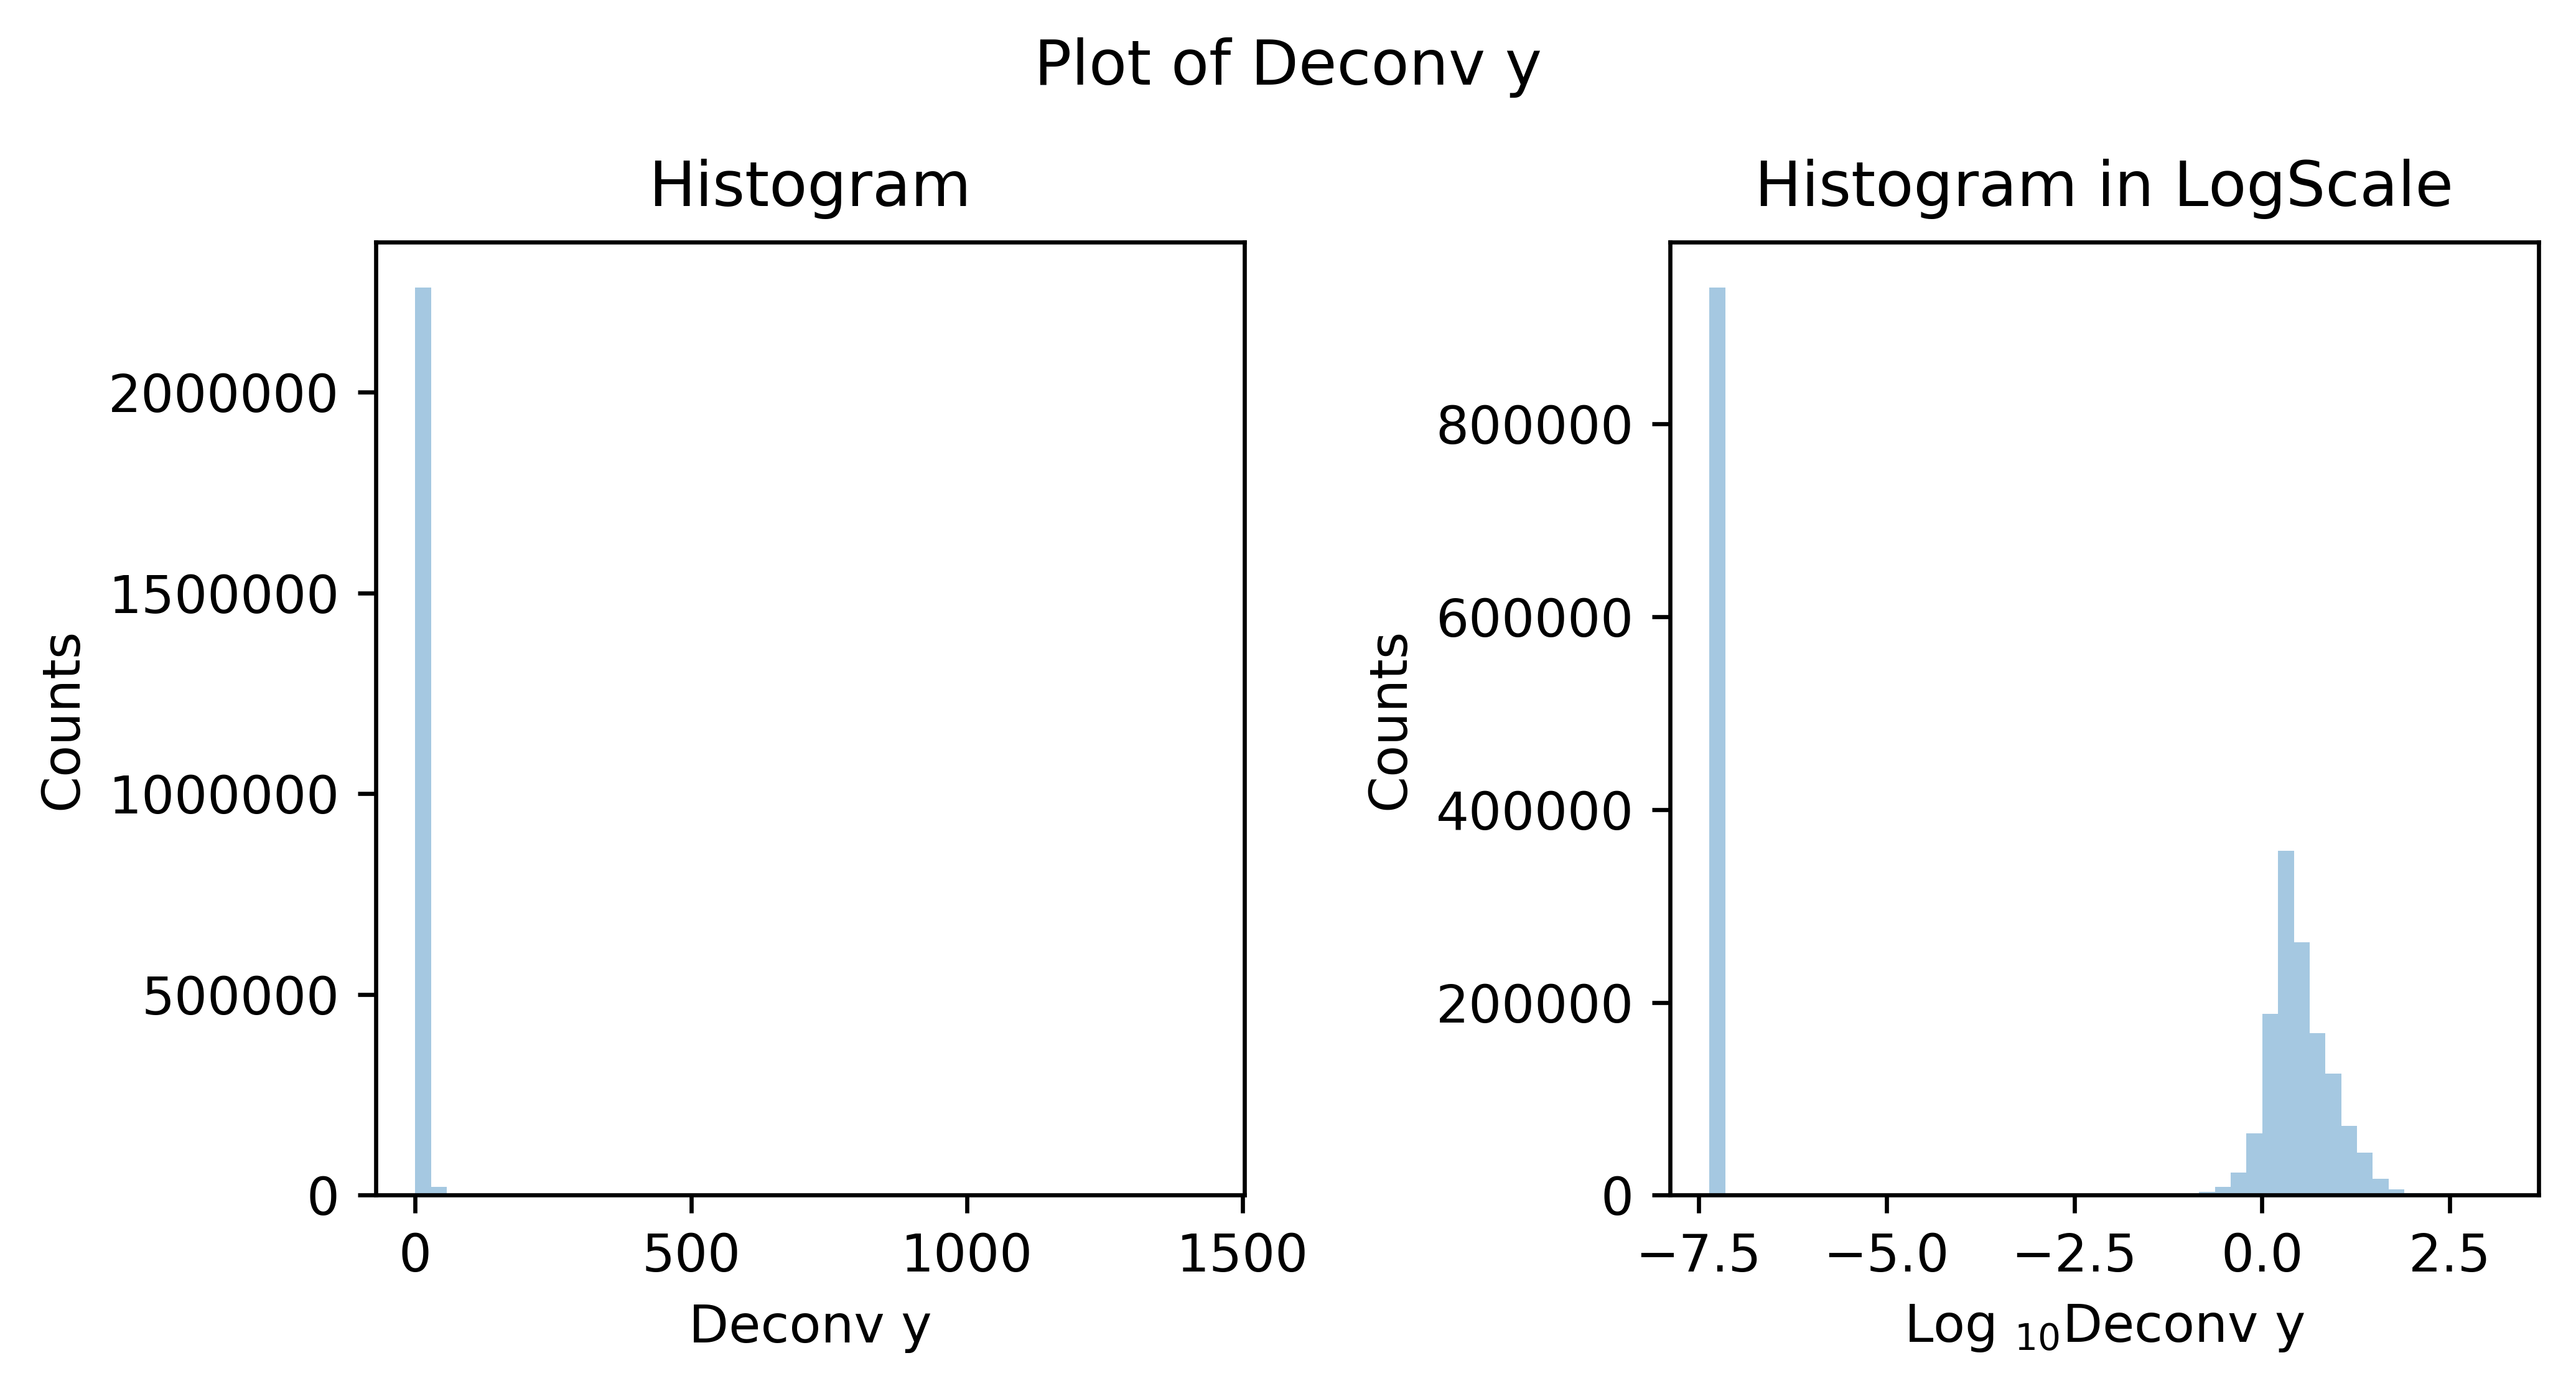

In [58]:
fig_Deconvy = fairplot(data.deconv_y, main = "Plot of Deconv y", kde=[False,False],
                             xlab = "Deconv y", ylab = "Counts", dpi=dpi_set)
plt.savefig('Deconv_Y.png')

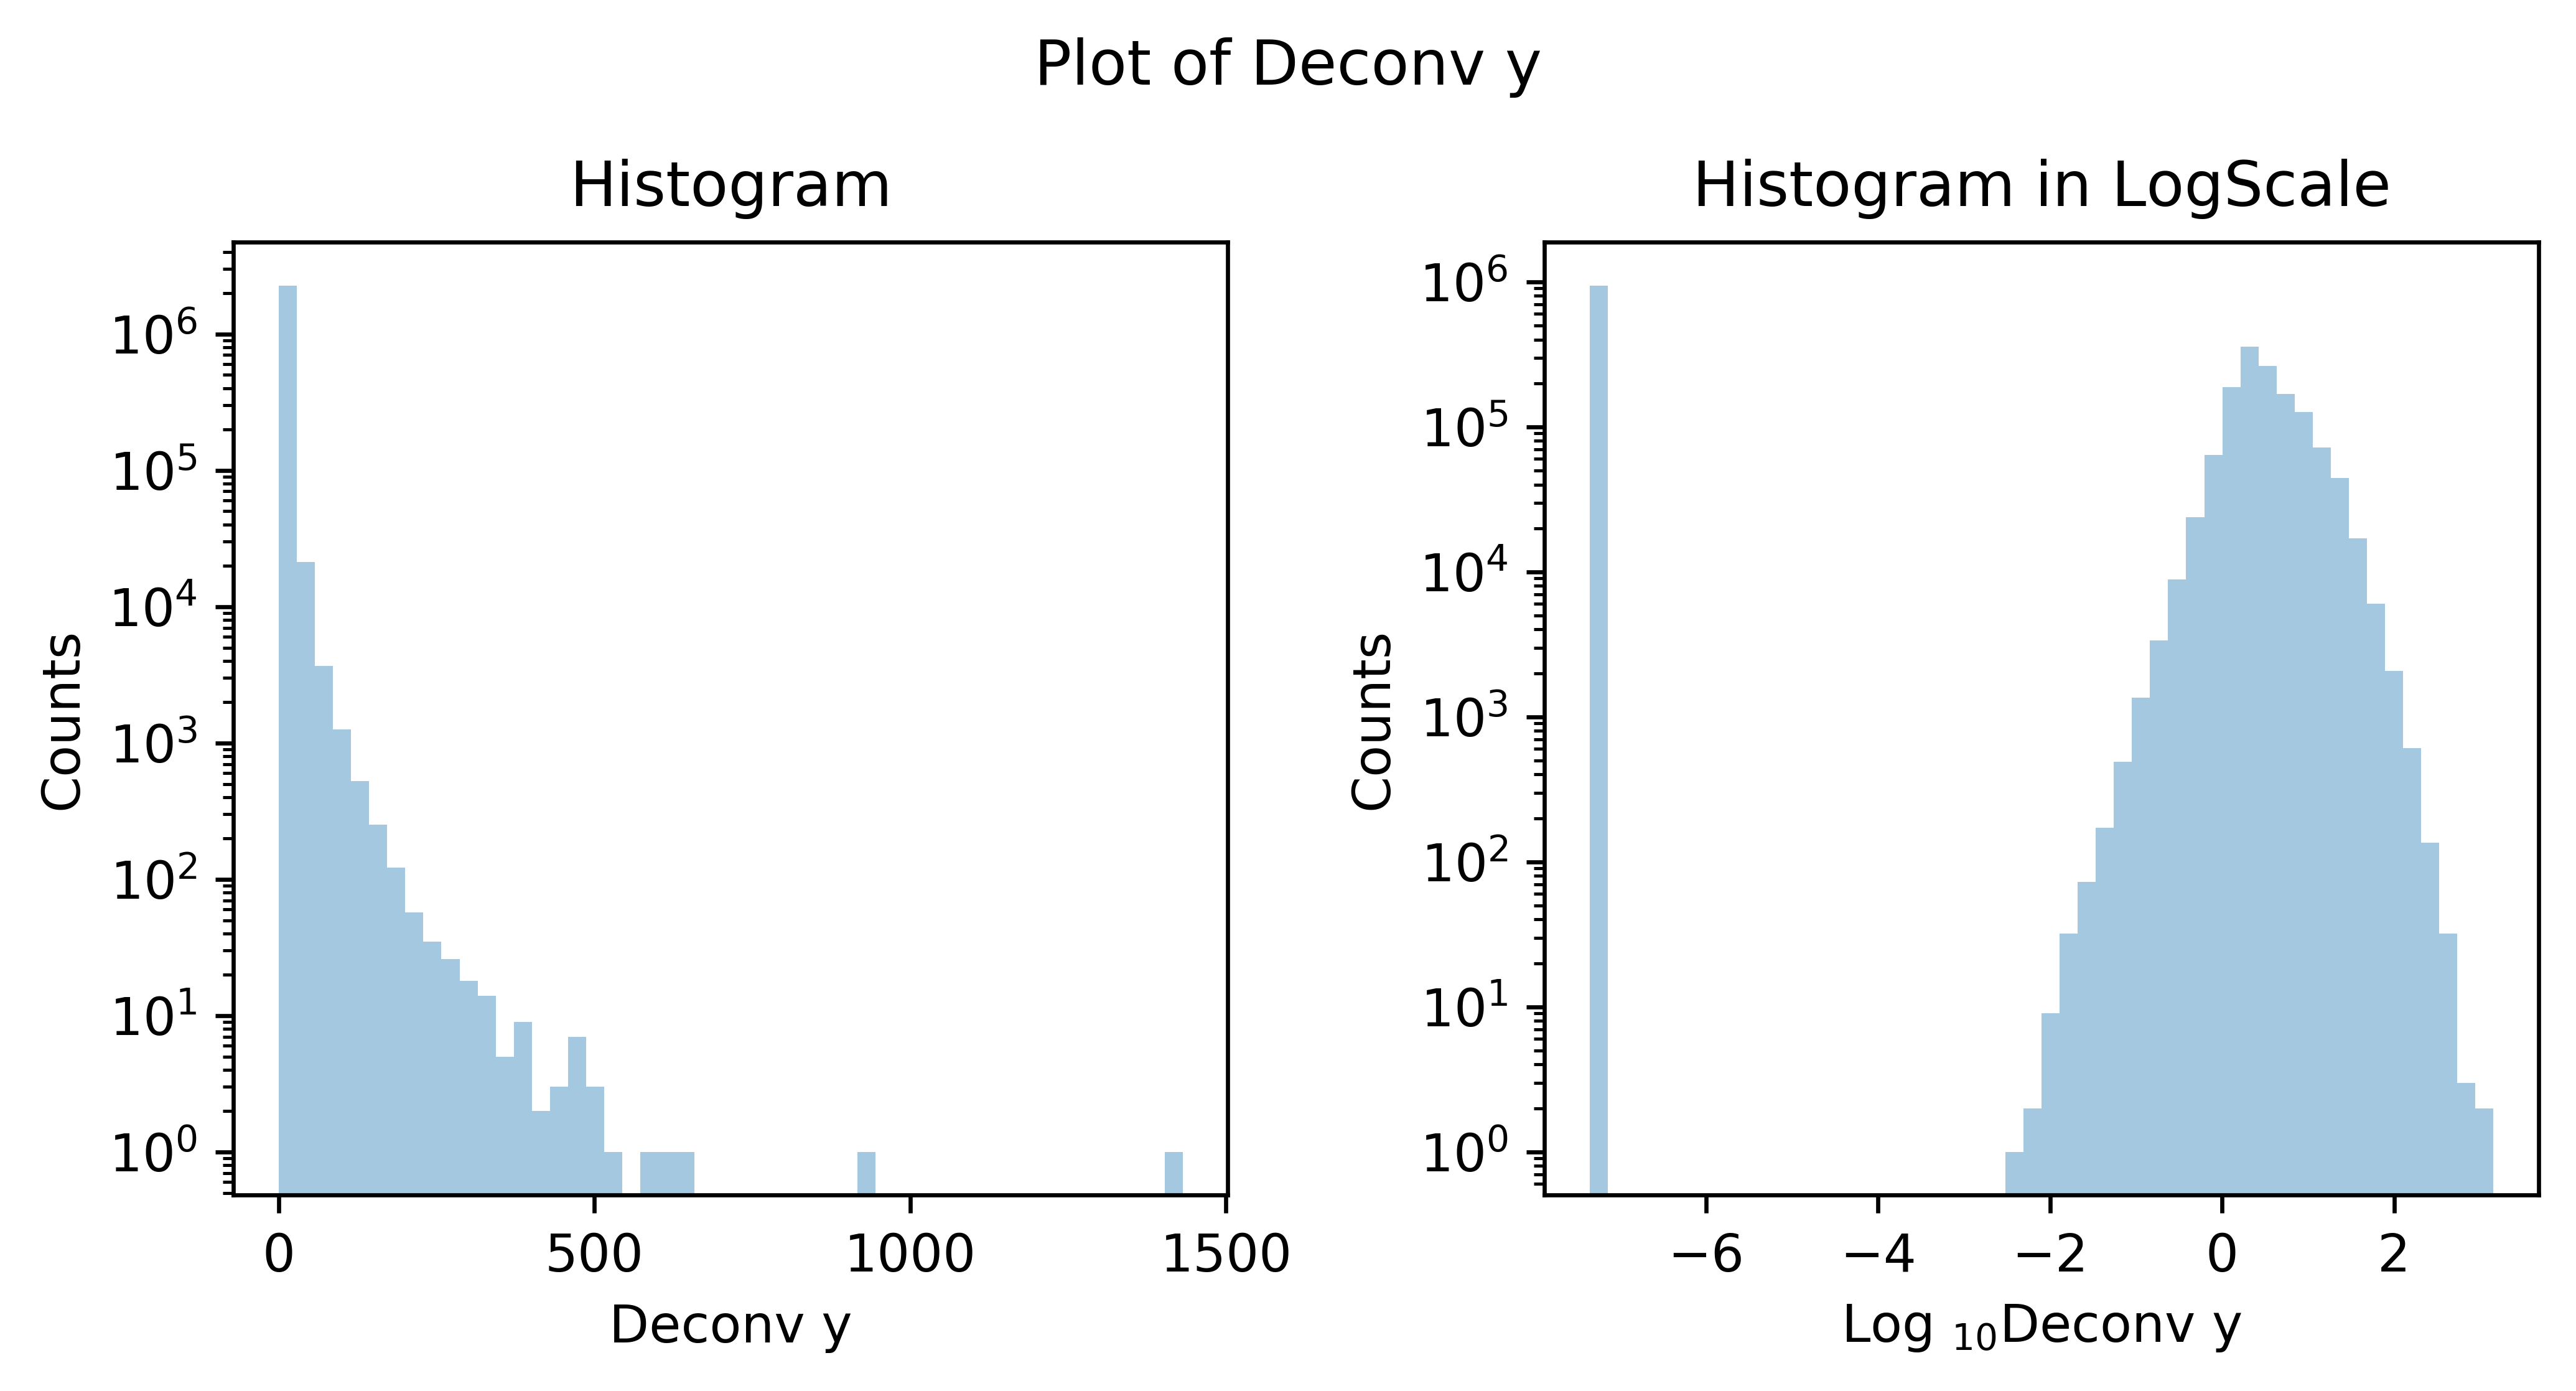

In [59]:
fig_DeconvyLog = fairplot(data.deconv_y, main = "Plot of Deconv y", kde=[False,False],
                             xlab = "Deconv y", ylab = "Counts", dpi=dpi_set, yscale = ['log','log'], scale_base = 10)
plt.savefig('Deconv_Y_Log.png')

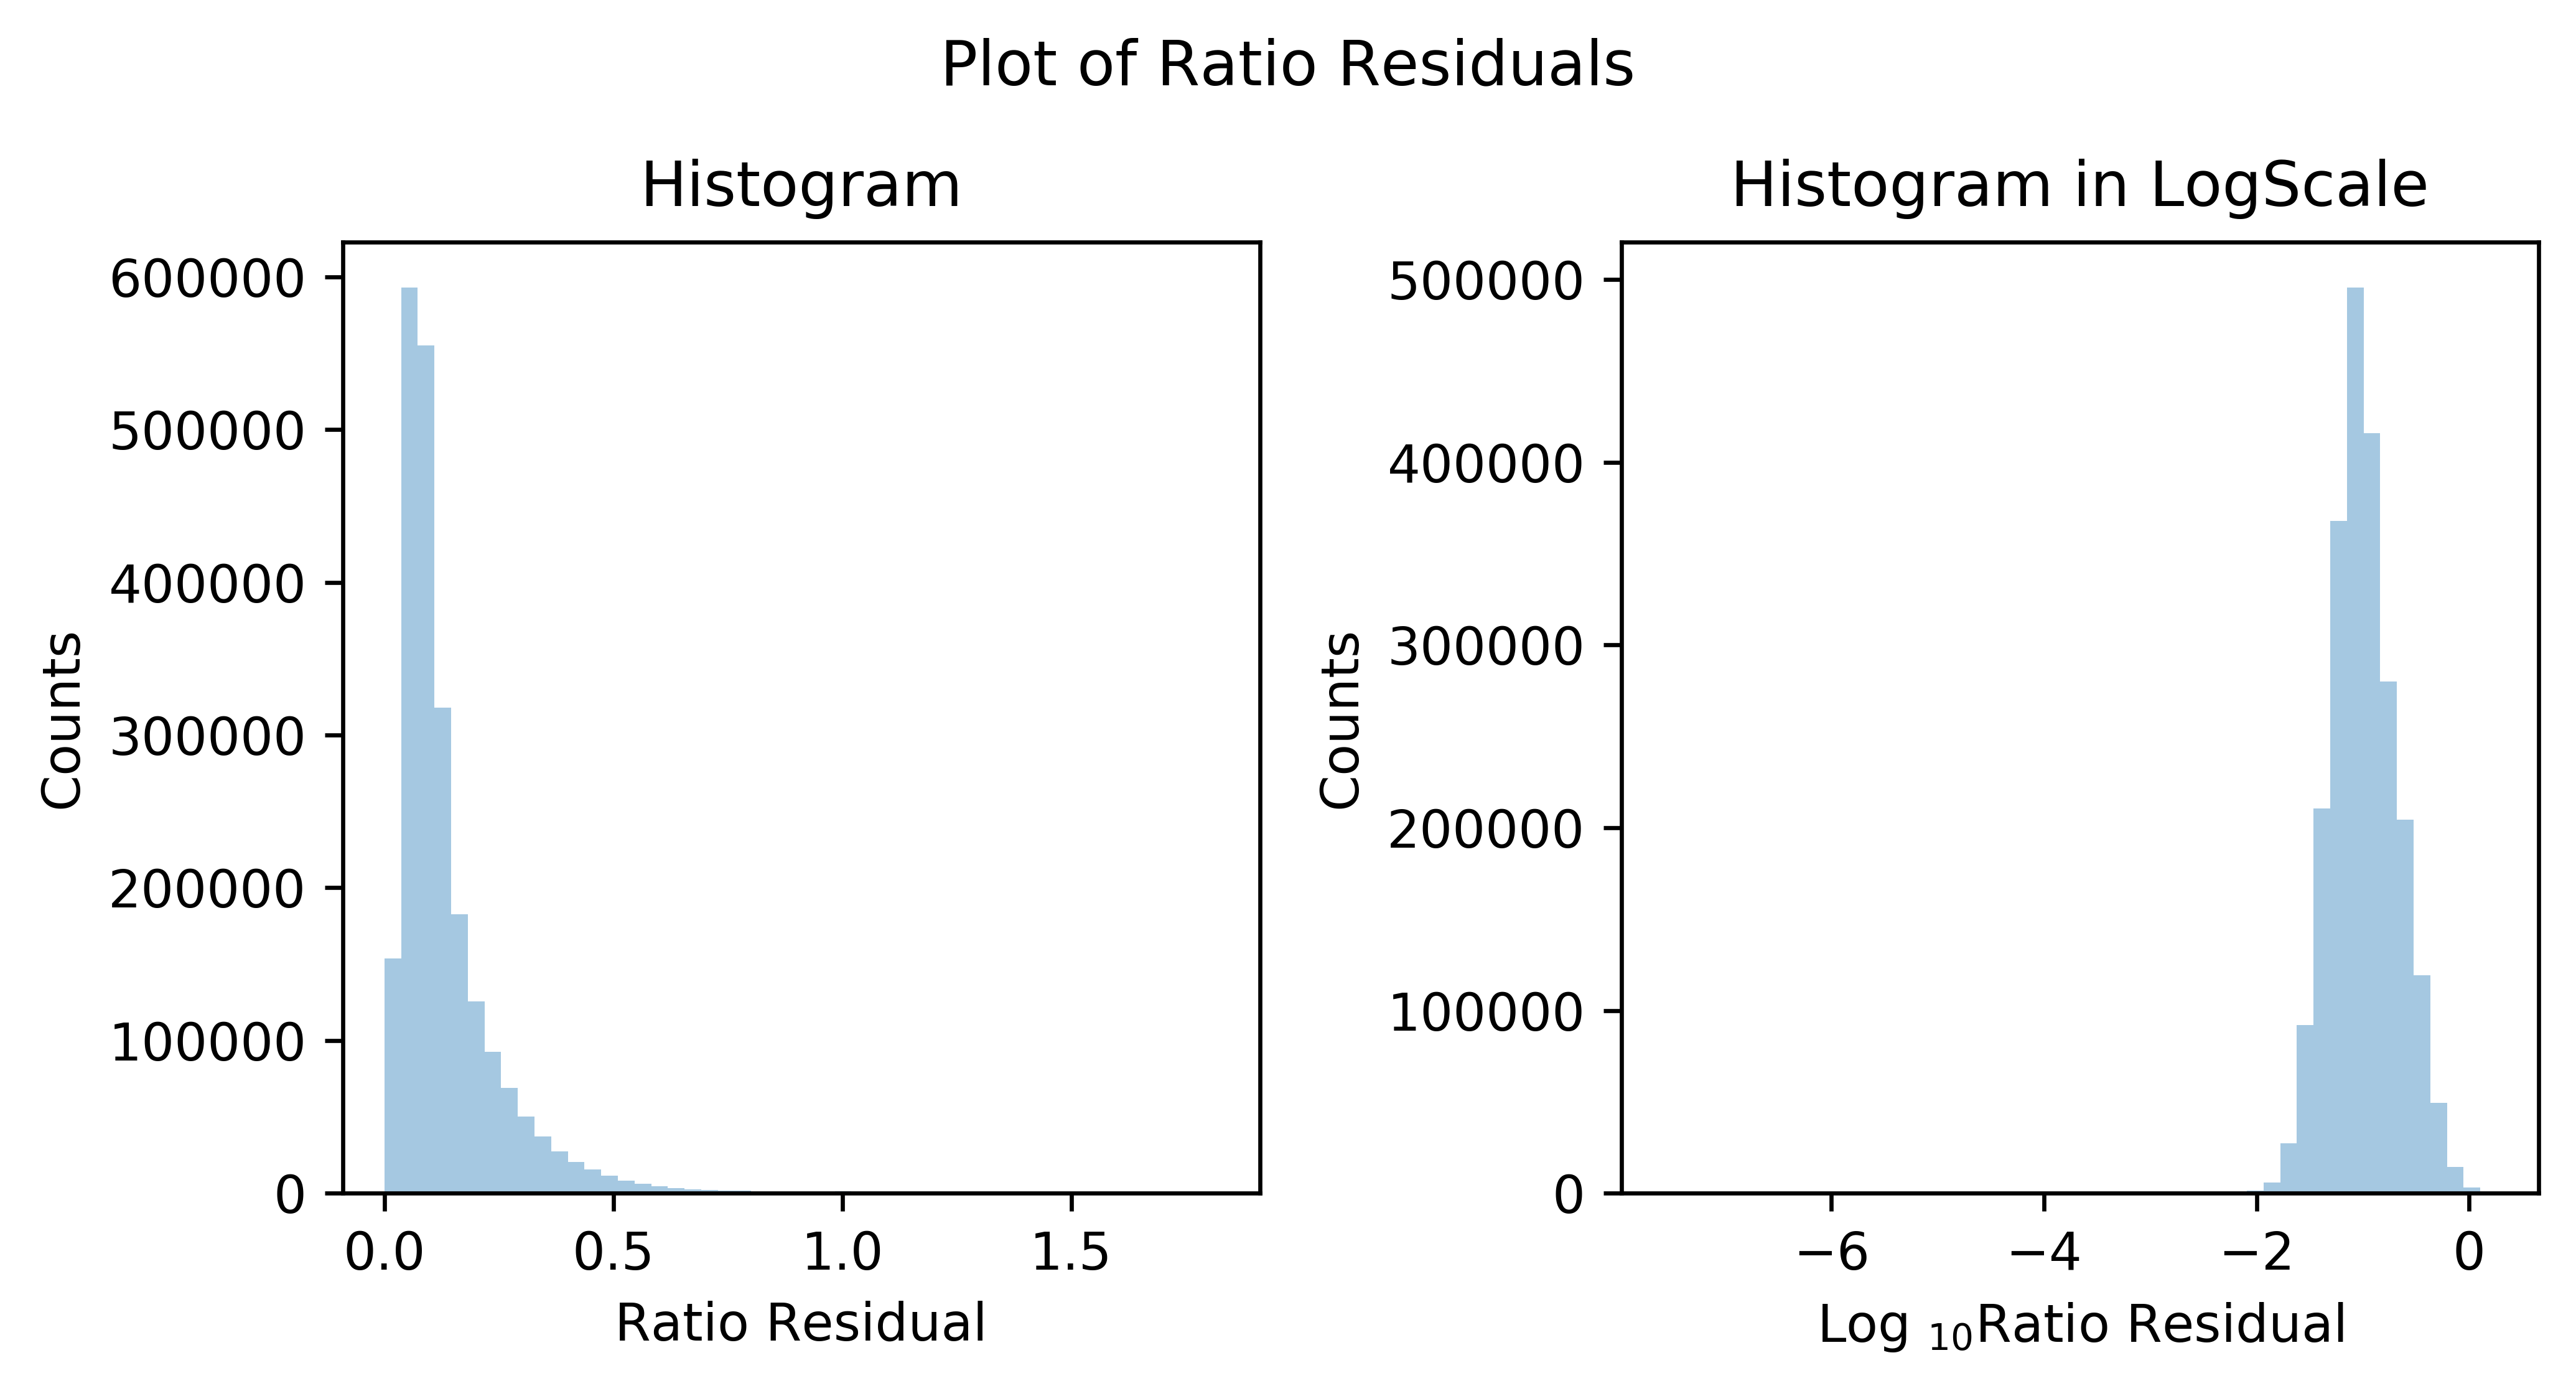

In [66]:
fig_RatioResidual = fairplot(data.ratio_residual, main = "Plot of Ratio Residuals", xlab = "Ratio Residual", ylab = "Counts", 
                       kde=[False,False], dpi=dpi_set)
plt.savefig('RatioResidual.png')

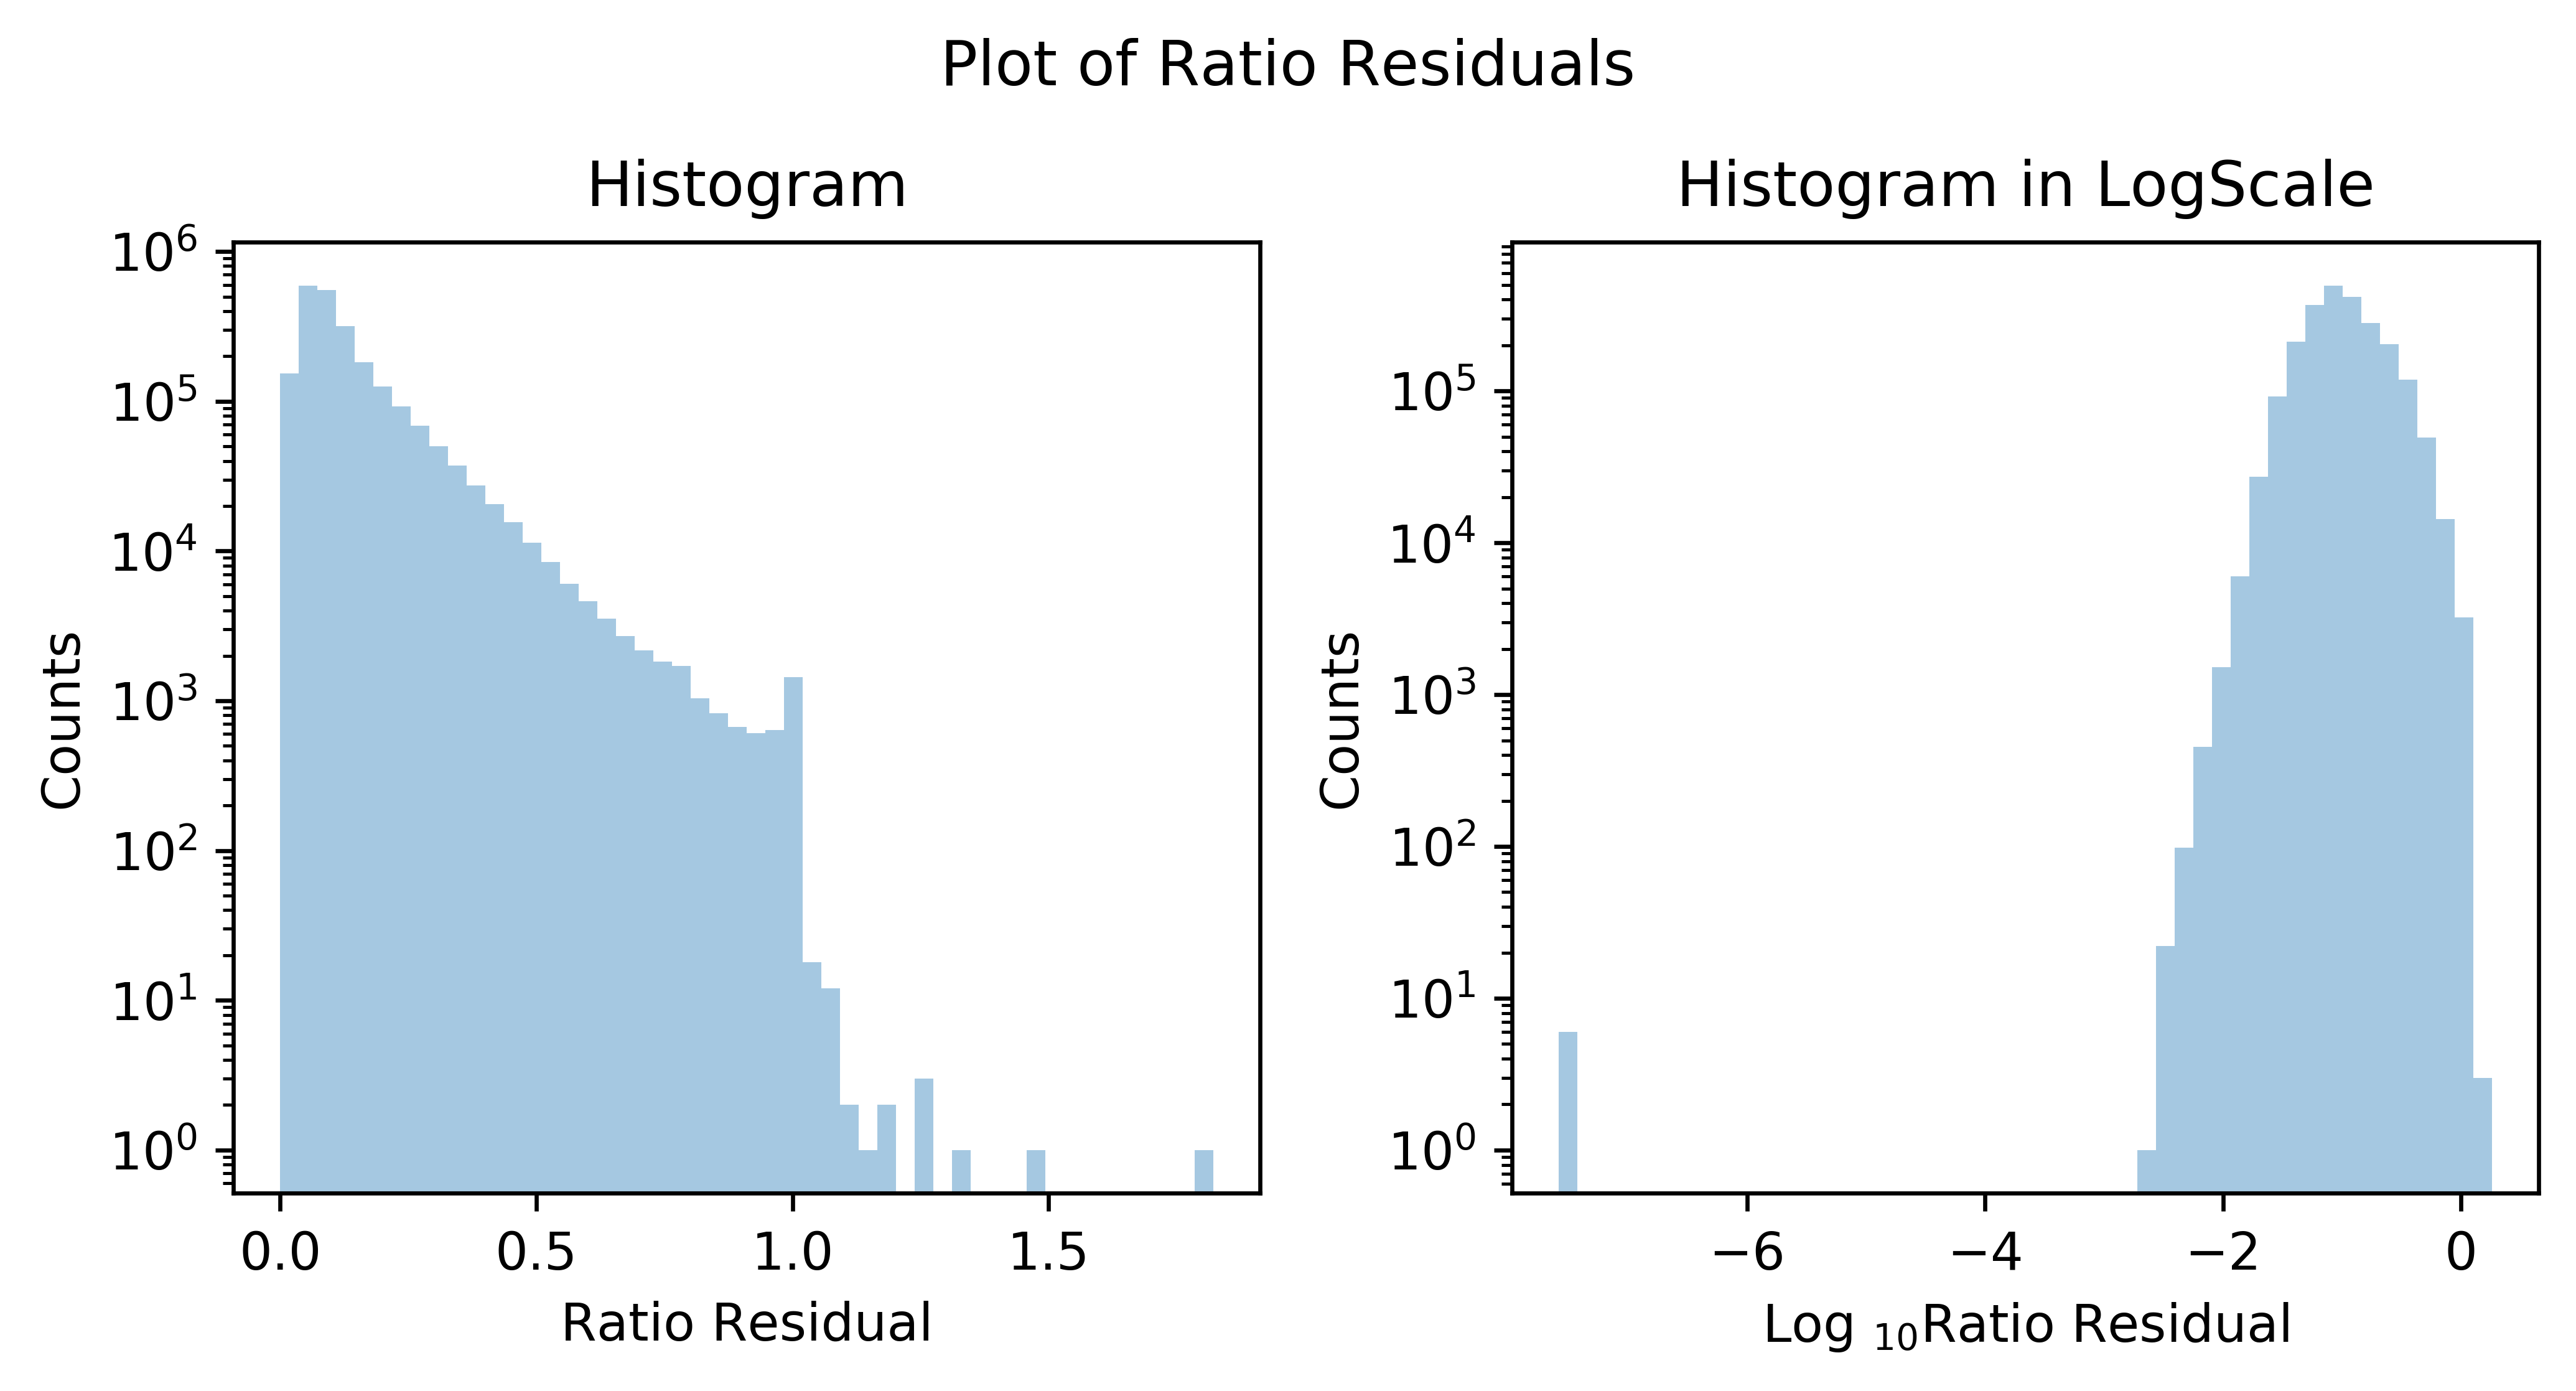

In [67]:
fig_RatioResidualLog = fairplot(data.ratio_residual, main = "Plot of Ratio Residuals", xlab = "Ratio Residual", ylab = "Counts", 
                       kde=[False,False], dpi=dpi_set, yscale = ['log','log'], scale_base = 10)
plt.savefig('RatioResidual_Log.png')

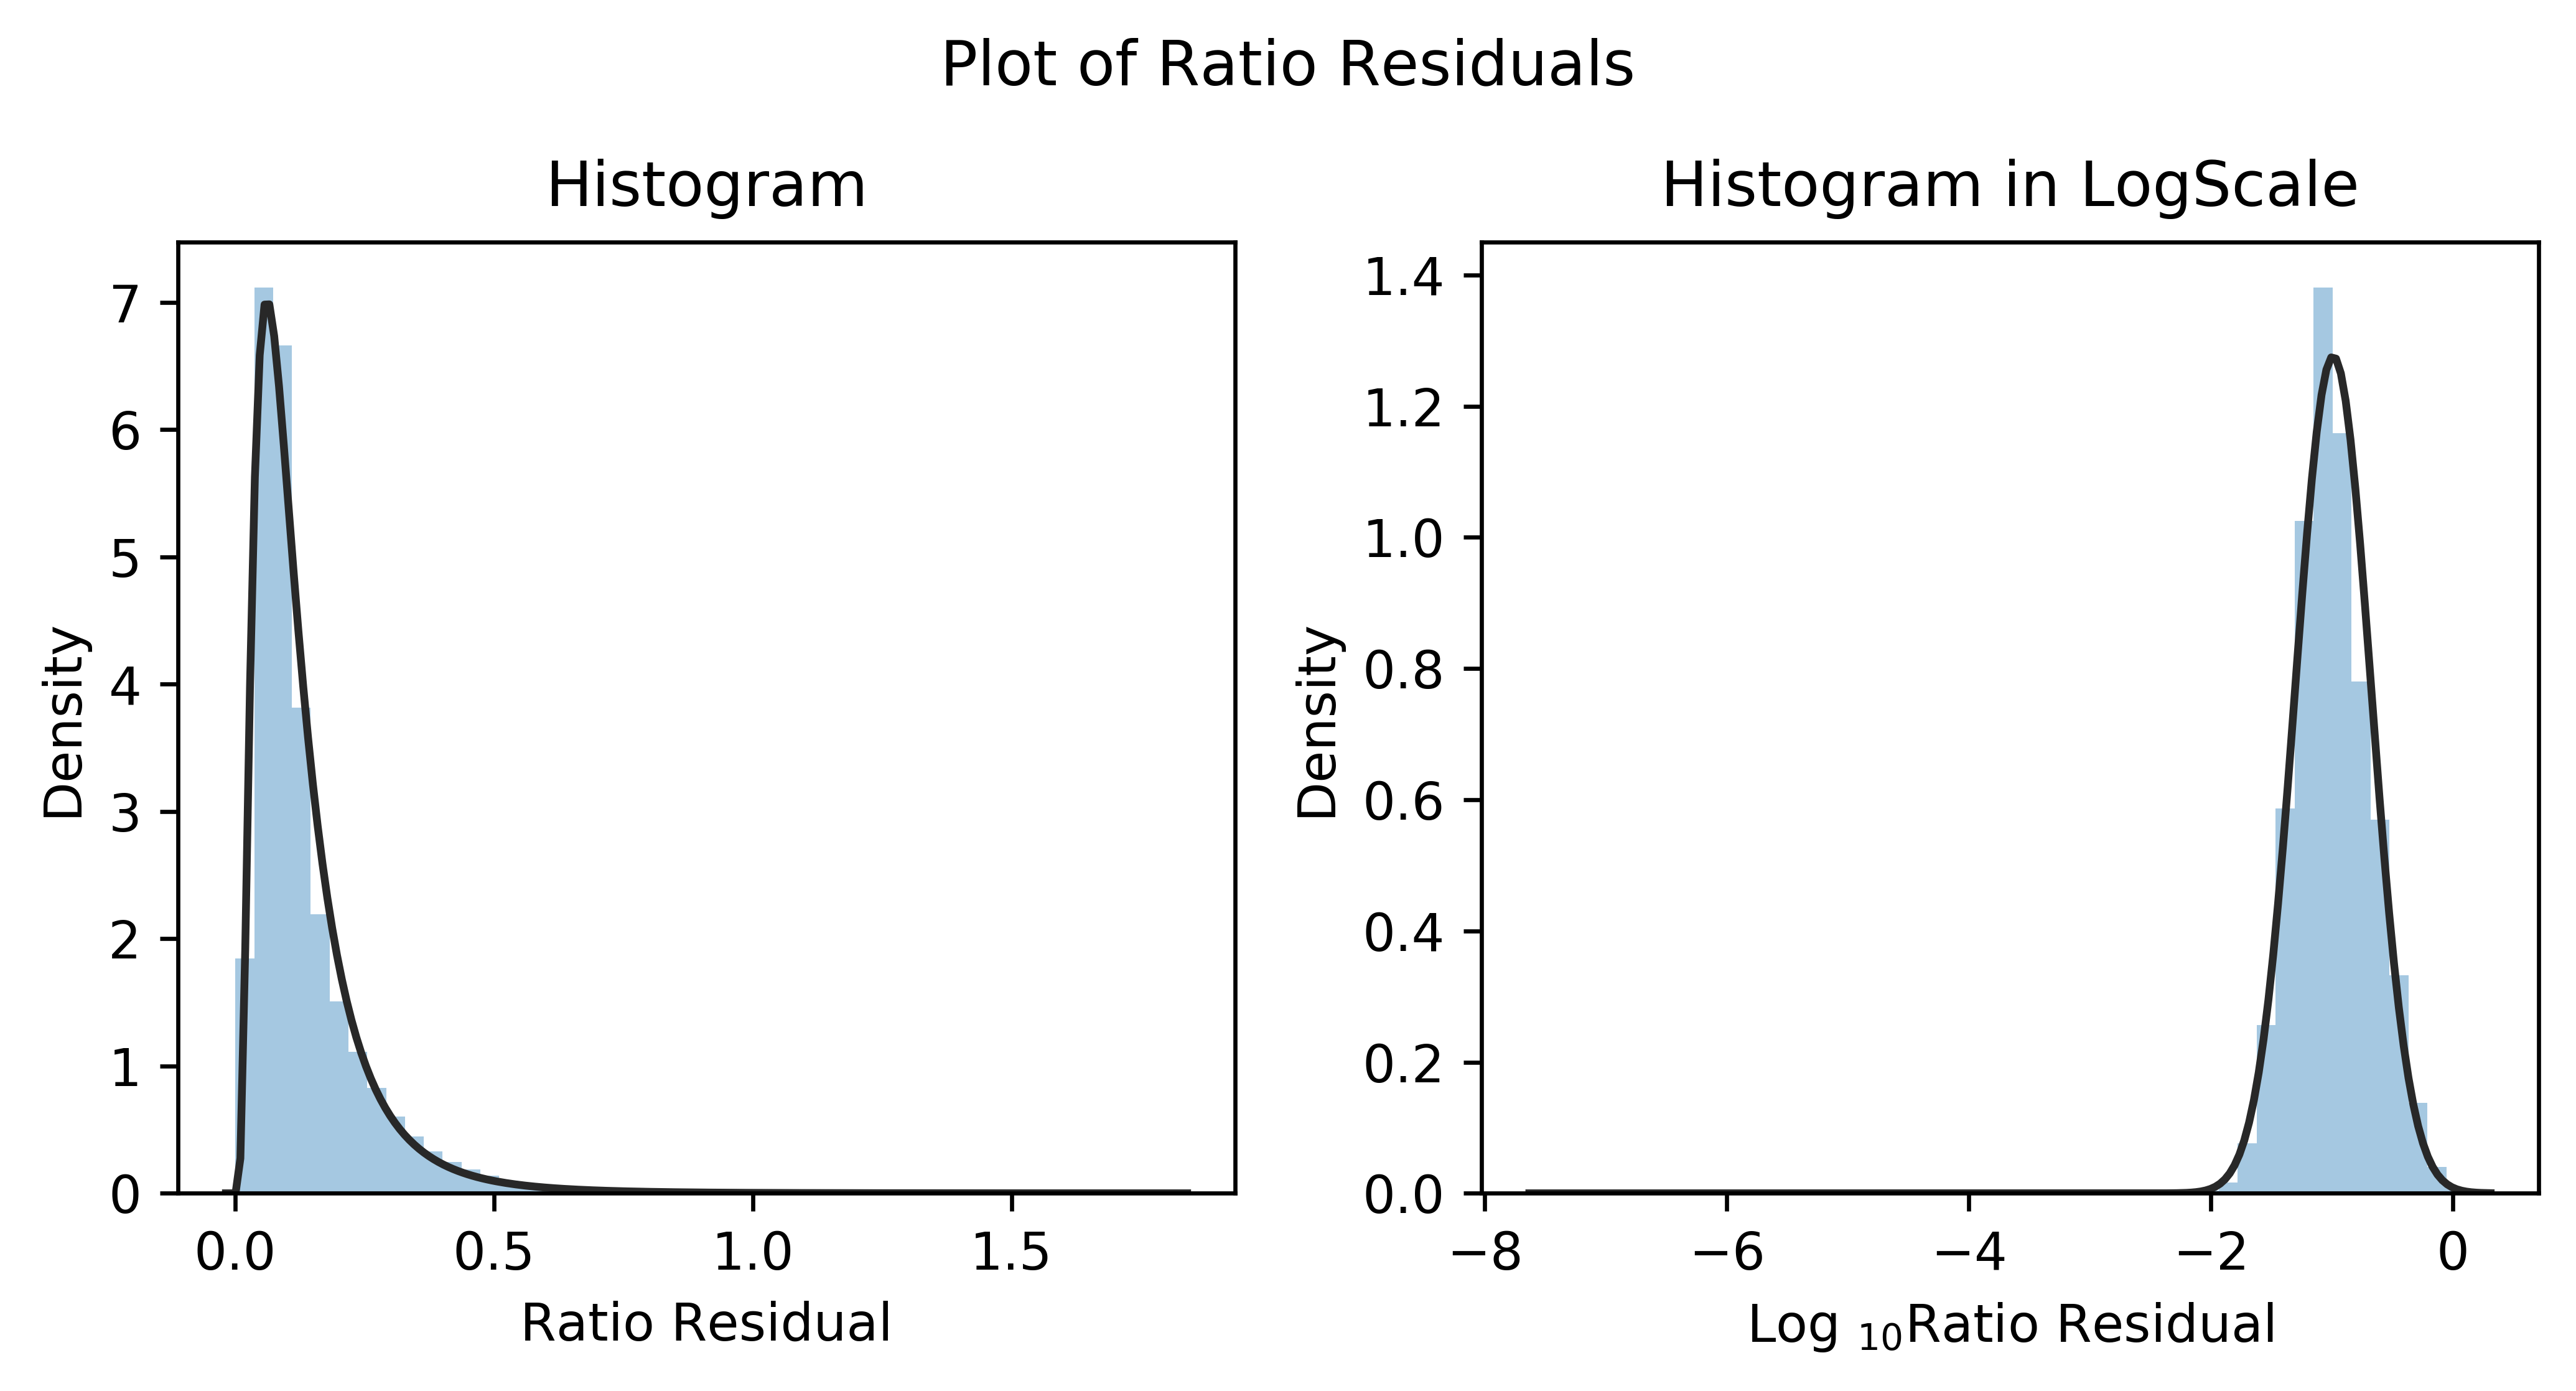

In [68]:
## Fitting the Ratio Residuals plot with a lognormal function and that of the log with a normal function.
fig_RatioResidualfit = fairplot(data.ratio_residual, main = "Plot of Ratio Residuals", xlab = "Ratio Residual", ylab = "Density", 
                     kde= [False,False], fit1 =lognorm, fit2=norm, dpi=dpi_set)
plt.savefig('RatioResidual_Fit_Lognorm_norm.png')

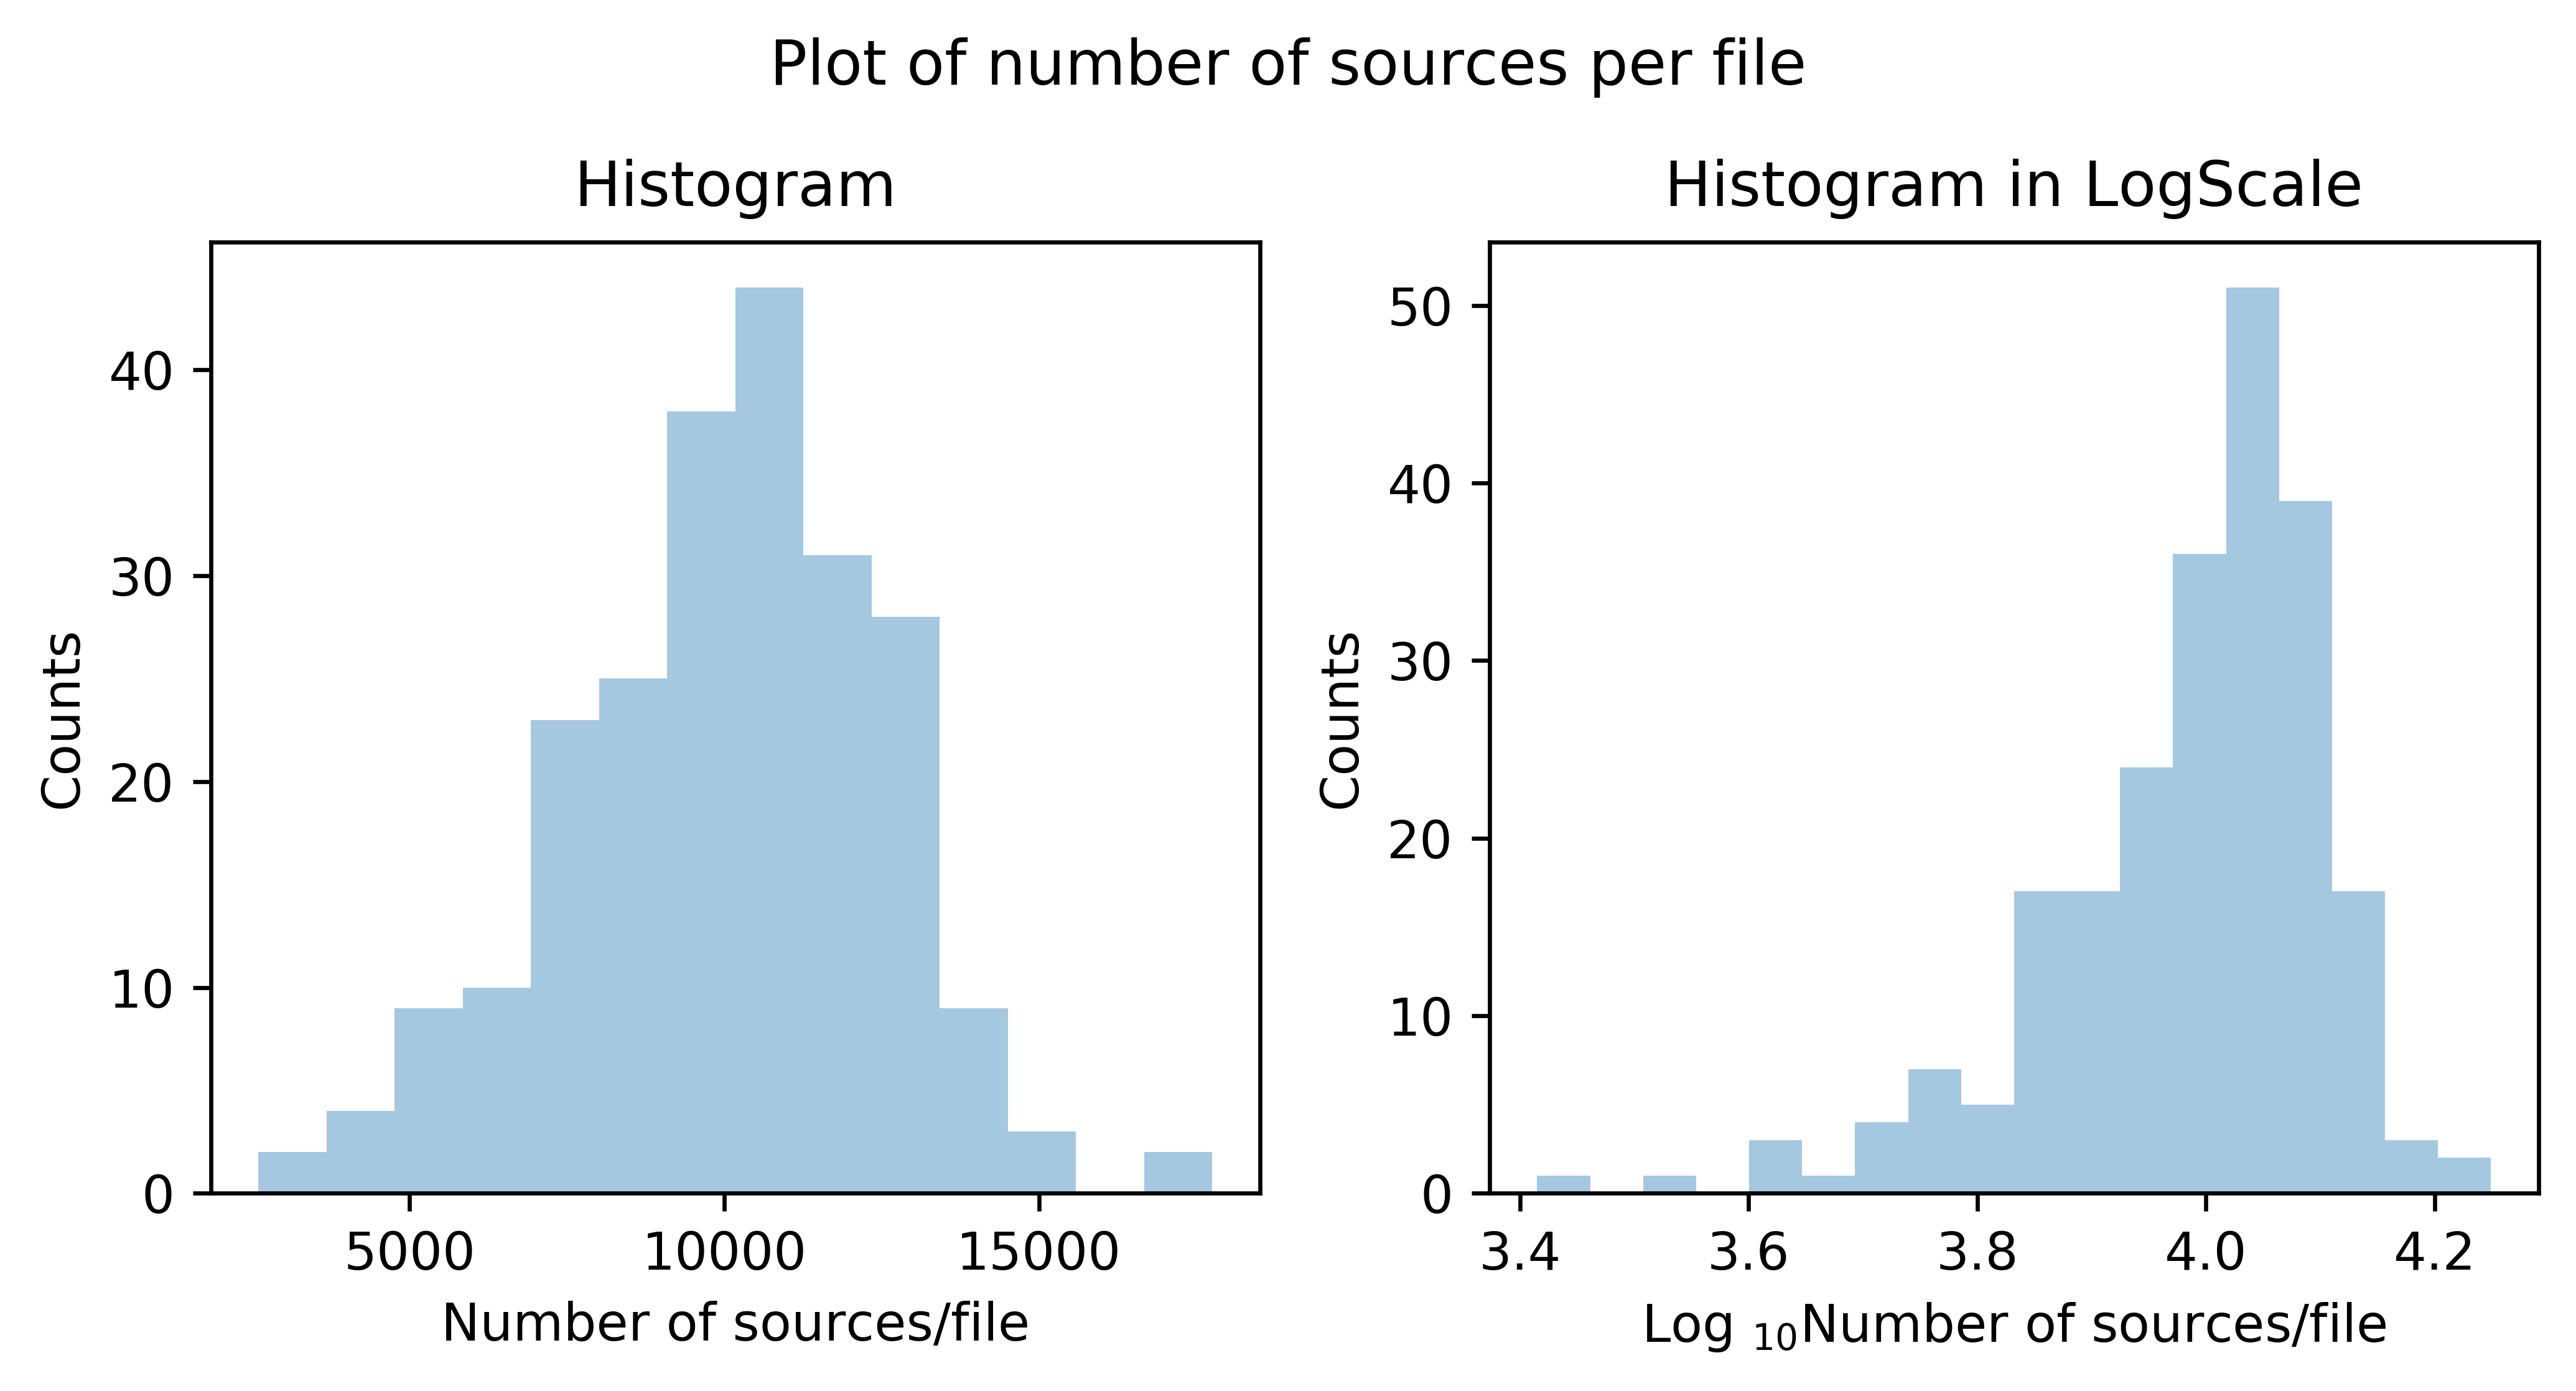

In [69]:
fig_Files = fairplot(data.groupby(['filename']).size(), main = "Plot of number of sources per file", 
                     xlab = "Number of sources/file", ylab = "Counts", kde=[False,False], dpi=dpi_set)
plt.savefig('Sourcesperfile.png')

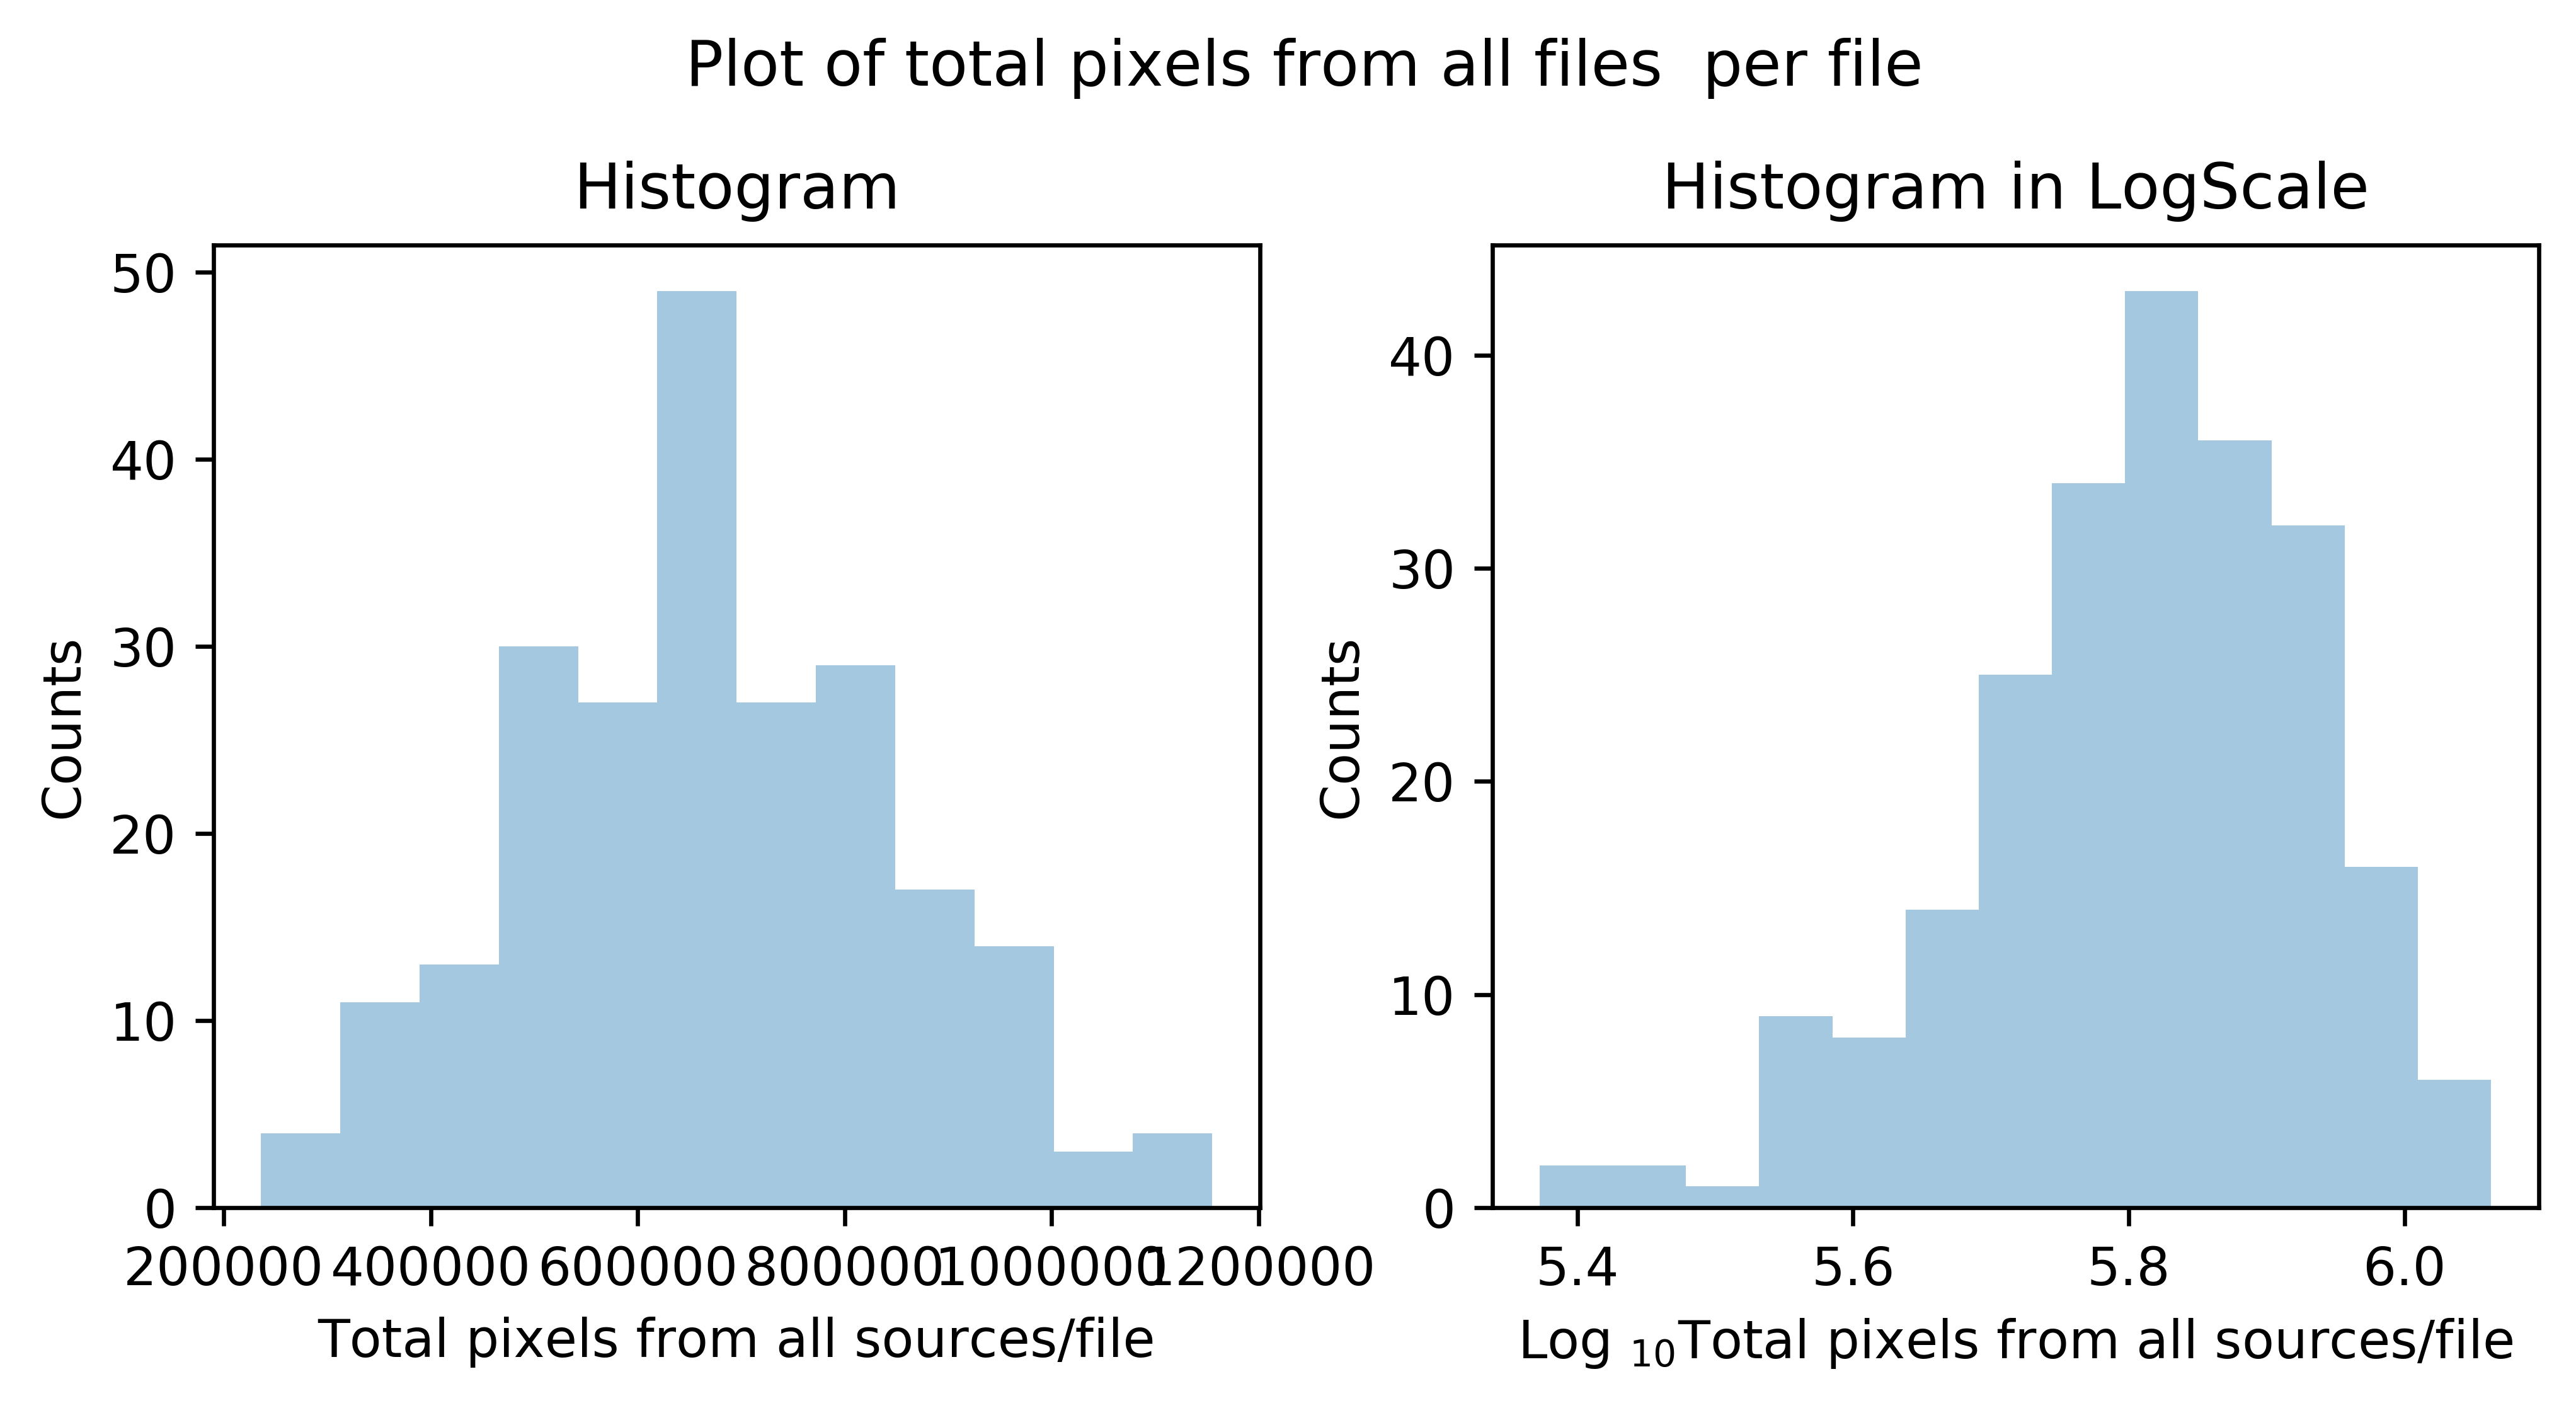

In [70]:
fig_Files = fairplot(data.groupby(['filename'])[['total_pixels']].sum(), main = "Plot of total pixels from all files  per file", 
                     xlab = "Total pixels from all sources/file", ylab = "Counts", kde=[False,False], dpi=dpi_set)
plt.savefig('TotalPixelsperfile.png')


In [ ]:
sns_plot = sns.pairplot(data[['total_pixels','integrated_intensity','integrated_intensity_fit', 'ratio_residual']], size = 3.5)
sns_plot.savefig("Pairplot.png")

In [ ]:
sns_plot = sns.pairplot(data)
sns_plot.savefig("Pairplot_all.png")

In [ ]:
sns_plot = sns.pairplot(data, hue = "filename")
sns_plot.savefig("Pairplot_all_filecolored.png")